In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from functools import reduce
import scipy
from copy import deepcopy
from scipy.linalg import logm
import numpy as np
import dill


In [3]:
import dill 
filename = 'pickled_controls4.pkl'
pca = dill.load(open(filename, 'rb'))
num_keep = len(pca.controlset)
pca.controlset = pca.controlset[:num_keep]

In [4]:
def hist_and_support(weights, num=10):
    plt.hist(weights)
    np.argmax(weights)
    top_idx = np.argsort(np.array(weights).T)[0][-num:]
    top_values = [weights[i] for i in top_idx]
    print(f"SUPPORT:{np.sum(top_values)}")
    print(f"NUM CONTROLS: {num}")
    return top_idx, np.sum(top_values)

In [5]:
num_weights = 10
scale = 100
num_points = 11
num_processors = 4

In [6]:
from convex import all_derivs, optimal_weights
from pauli_channel_approximation import PCA
# If the tolerance is too high (i.e. not zero) and the number of controls is too high (e.g. >100) this was failing with ECOS.
pca.derivs = all_derivs(pca.controlset, pca.target_operator, pca.control_hamiltonians, pca.ambient_hamiltonian, pca.dt, 1)

Control 0 derivative.
Control 1 derivative.
Control 2 derivative.
Control 3 derivative.
Control 4 derivative.
Control 5 derivative.
Control 6 derivative.
Control 7 derivative.
Control 8 derivative.
Control 9 derivative.
Control 10 derivative.
Control 11 derivative.
Control 12 derivative.
Control 13 derivative.
Control 14 derivative.
Control 15 derivative.
Control 16 derivative.
Control 17 derivative.
Control 18 derivative.
Control 19 derivative.
Control 20 derivative.
Control 21 derivative.
Control 22 derivative.
Control 23 derivative.
Control 24 derivative.
Control 25 derivative.
Control 26 derivative.
Control 27 derivative.
Control 28 derivative.
Control 29 derivative.
Control 30 derivative.
Control 31 derivative.
Control 32 derivative.
Control 33 derivative.
Control 34 derivative.
Control 35 derivative.
Control 36 derivative.
Control 37 derivative.
Control 38 derivative.
Control 39 derivative.
Control 40 derivative.
Control 41 derivative.
Control 42 derivative.
Control 43 derivative

Control 361 derivative.
Control 362 derivative.
Control 363 derivative.
Control 364 derivative.
Control 365 derivative.
Control 366 derivative.
Control 367 derivative.
Control 368 derivative.
Control 369 derivative.
Control 370 derivative.
Control 371 derivative.
Control 372 derivative.
Control 373 derivative.
Control 374 derivative.
Control 375 derivative.
Control 376 derivative.
Control 377 derivative.
Control 378 derivative.
Control 379 derivative.
Control 380 derivative.
Control 381 derivative.
Control 382 derivative.
Control 383 derivative.
Control 384 derivative.
Control 385 derivative.
Control 386 derivative.
Control 387 derivative.
Control 388 derivative.
Control 389 derivative.
Control 390 derivative.
Control 391 derivative.
Control 392 derivative.
Control 393 derivative.
Control 394 derivative.
Control 395 derivative.
Control 396 derivative.
Control 397 derivative.
Control 398 derivative.
Control 399 derivative.
Control 400 derivative.
Control 401 derivative.
Control 402 deri

Control 716 derivative.
Control 717 derivative.
Control 718 derivative.
Control 719 derivative.
Control 720 derivative.
Control 721 derivative.
Control 722 derivative.
Control 723 derivative.
Control 724 derivative.
Control 725 derivative.
Control 726 derivative.
Control 727 derivative.
Control 728 derivative.
Control 729 derivative.
Control 730 derivative.
Control 731 derivative.
Control 732 derivative.
Control 733 derivative.
Control 734 derivative.
Control 735 derivative.
Control 736 derivative.
Control 737 derivative.
Control 738 derivative.
Control 739 derivative.
Control 740 derivative.
Control 741 derivative.
Control 742 derivative.
Control 743 derivative.
Control 744 derivative.
Control 745 derivative.
Control 746 derivative.
Control 747 derivative.
Control 748 derivative.
Control 749 derivative.
Control 0 derivative.
Control 1 derivative.
Control 2 derivative.
Control 3 derivative.
Control 4 derivative.
Control 5 derivative.
Control 6 derivative.
Control 7 derivative.
Control 

Control 313 derivative.
Control 314 derivative.
Control 315 derivative.
Control 316 derivative.
Control 317 derivative.
Control 318 derivative.
Control 319 derivative.
Control 320 derivative.
Control 321 derivative.
Control 322 derivative.
Control 323 derivative.
Control 324 derivative.
Control 325 derivative.
Control 326 derivative.
Control 327 derivative.
Control 328 derivative.
Control 329 derivative.
Control 330 derivative.
Control 331 derivative.
Control 332 derivative.
Control 333 derivative.
Control 334 derivative.
Control 335 derivative.
Control 336 derivative.
Control 337 derivative.
Control 338 derivative.
Control 339 derivative.
Control 340 derivative.
Control 341 derivative.
Control 342 derivative.
Control 343 derivative.
Control 344 derivative.
Control 345 derivative.
Control 346 derivative.
Control 347 derivative.
Control 348 derivative.
Control 349 derivative.
Control 350 derivative.
Control 351 derivative.
Control 352 derivative.
Control 353 derivative.
Control 354 deri

Control 656 derivative.
Control 657 derivative.
Control 658 derivative.
Control 659 derivative.
Control 660 derivative.
Control 661 derivative.
Control 662 derivative.
Control 663 derivative.
Control 664 derivative.
Control 665 derivative.
Control 666 derivative.
Control 667 derivative.
Control 668 derivative.
Control 669 derivative.
Control 670 derivative.
Control 671 derivative.
Control 672 derivative.
Control 673 derivative.
Control 674 derivative.
Control 675 derivative.
Control 676 derivative.
Control 677 derivative.
Control 678 derivative.
Control 679 derivative.
Control 680 derivative.
Control 681 derivative.
Control 682 derivative.
Control 683 derivative.
Control 684 derivative.
Control 685 derivative.
Control 686 derivative.
Control 687 derivative.
Control 688 derivative.
Control 689 derivative.
Control 690 derivative.
Control 691 derivative.
Control 692 derivative.
Control 693 derivative.
Control 694 derivative.
Control 695 derivative.
Control 696 derivative.
Control 697 deri

# Making the regularizer too small can prevent it from working - i.e. the solver will fail. Anything above around 1E-3 or 1E-4 seems to work well. These cells assign the 0RBC weights, and 1RBC weights, with sparsity constraints. (This could be because the constraint makes the optimization work over numbers small in magnitude, so that numerical inaccuracy takes over.)

# Support for 0th order controls

In [7]:
l2 = 200
#500 is decent

In [8]:
pca.weights_0 = optimal_weights(pca.derivs[:1], sparsity=True, sparsity_param=1E-2, l2_constraint=True, l2_param=l2)

Done with convex problem 0 out of 750
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.01            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.02    
Problem
  Name                   :                 
  Objective sense        : min             
  Type     

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   


Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -

Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.96e-01  -2.007002290e+01  -7.963857857e+00  2.0e-01  0.04  
2   9.5e-03  4.3e-02  4.3e-03  -8.21e-01  -1.221488060e+02  -4.659243931e+01  9.5e-03  0.04  
3   2.2e-03  1.0e-02  4.0e-03  1.70e+00   -3.425179556e+01  -2.952692210e+01  2.2e-03  0.04  
4   1.4e-03  6.1e-03  6.2e-03  4.53e+00   -6.316569598e+00  -5.582020050e+00  1.4e-03  0.04  
5   9.5e-04  4.3e-03  6.3e-03  3.17e+00   -1.494893524e+00  -1.157162754e+00  9.5e-04  0.04  
6   6.9e-04  3.1e-03  6.0e-03  1.99e+00   -4.089823286e-01  -2.114293337e-01  6.9e-04  0.06  
7   3.8e-04  1.7e-03  4.8e-03  1.70e+00   4.23447725

1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -2.003128886e+01  -7.947022519e+00  2.0e-01  0.03  
2   9.6e-03  4.3e-02  4.4e-03  -8.15e-01  -1.196989200e+02  -4.581365530e+01  9.6e-03  0.03  
3   2.2e-03  1.0e-02  4.0e-03  1.70e+00   -3.363596019e+01  -2.903802710e+01  2.2e-03  0.03  
4   1.4e-03  6.3e-03  6.2e-03  4.52e+00   -6.402789185e+00  -5.645057950e+00  1.4e-03  0.04  
5   9.3e-04  4.2e-03  6.4e-03  3.17e+00   -1.208469940e+00  -8.880354520e-01  9.3e-04  0.04  
6   5.9e-04  2.6e-03  5.8e-03  1.96e+00   9.653611033e-02   2.489367631e-01   5.9e-04  0.04  
7   3.5e-04  1.6e-03  4.7e-03  1.50e+00   5.366081969e-01   6.179762748e-01   3.5e-04  0.04  
8   2.8e-04  1.3e-03  4.2e-03  1.07e+00   4.560726618e-01   5.227016580e-01   2.8e-04  0.04  
9   1.2e-04  5.3e-04  2.9e-03  1.12e+00   6.033044024e-01   6.281153237e-01   1.2e-04  0.04  
10  8.5e-05  3.8e-04  2.6e-03  1.03e+00   5.982612997e-01   6.145803595e-01   8.5e-05  0.04  
11  1.0e-05  4.5e-05  8.9e-04  1.03e+00   6.707503982e-01   

4   1.4e-03  6.1e-03  6.2e-03  4.53e+00   -6.279473226e+00  -5.557618069e+00  1.4e-03  0.04  
5   9.6e-04  4.3e-03  6.3e-03  3.18e+00   -1.655589085e+00  -1.309430135e+00  9.6e-04  0.04  
6   7.4e-04  3.3e-03  6.0e-03  2.00e+00   -7.279739335e-01  -5.033159900e-01  7.4e-04  0.04  
7   3.9e-04  1.7e-03  4.9e-03  1.81e+00   3.615205147e-01   4.561994943e-01   3.9e-04  0.04  
8   2.8e-04  1.2e-03  4.0e-03  1.15e+00   2.129042840e-01   2.838995268e-01   2.8e-04  0.04  
9   7.4e-05  3.3e-04  2.1e-03  1.16e+00   4.759612928e-01   4.939475952e-01   7.4e-05  0.04  
10  2.2e-05  9.8e-05  1.3e-03  1.02e+00   5.302640578e-01   5.347629499e-01   2.2e-05  0.04  
11  1.6e-05  7.1e-05  1.1e-03  1.00e+00   5.407914862e-01   5.437793912e-01   1.6e-05  0.04  
12  1.3e-05  5.9e-05  1.0e-03  1.00e+00   5.391131665e-01   5.414149020e-01   1.3e-05  0.04  
13  3.8e-06  1.7e-05  6.3e-04  1.00e+00   5.505173783e-01   5.510516905e-01   3.8e-06  0.04  
14  3.9e-07  1.7e-06  2.3e-04  1.00e+00   5.527630978e-01   

8   9.7e-05  4.4e-04  2.5e-03  1.18e+00   6.979926428e-01   7.215054597e-01   9.7e-05  0.06  
9   6.0e-05  2.7e-04  2.1e-03  1.04e+00   7.300355154e-01   7.425332381e-01   6.0e-05  0.06  
10  2.0e-05  8.8e-05  1.6e-03  1.03e+00   7.743358636e-01   7.765659646e-01   2.0e-05  0.06  
11  2.1e-06  9.5e-06  5.2e-04  1.01e+00   7.980770583e-01   7.983140926e-01   2.1e-06  0.06  
12  5.6e-08  2.5e-07  8.5e-05  1.00e+00   8.010775493e-01   8.010836055e-01   5.6e-08  0.06  
13  2.7e-09  1.2e-08  1.9e-05  1.00e+00   8.011519623e-01   8.011522539e-01   2.7e-09  0.07  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 8.0115196229e-01    nrm: 6e+00    Viol.  con: 1e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 8.0115225394e-01    nrm: 7e+01    Viol.  con: 4e-16    var: 5e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min          

Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 8.3370866310e-01    nrm: 5e+00    Viol.  con: 4e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 8.3370877920e-01    nrm: 7e+01    Viol.  con: 9e-16    var: 2e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00   

  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526        

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix vari

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   PO

Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -2.003441209e+01  -7.948029301e+00  2.0e-01  0.04  
2   9.5e-03  4.3e-02  4.4e-03  -8.16e-01  -1.201174072e+02  -4.595387127e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  4.0e-03  1.70e+00   -3.374438069e+01  -2.912373350e+01  2.2e-03  0.04  
4   1.4e-03  6.2e-03  6.2e-03  4.54e+00   -6.386201412e+00  -5.628274390e+00  1.4e-03  0.04  
5   9.2e-04  4.1e-03  6.3e-03  3.16e+00   -1.209400777e+00  -8.874784591e-01  9.2e-04  0.04  
6   5.9e-04  2.6e-03  5.8e-03  1.94e+00   6.9674

ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -2.002371875e+01  -7.943292514e+00  2.0e-01  0.03  
2   9.5e-03  4.3e-02  4.4e-03  -8.14e-01  -1.194693259e+02  -4.574683365e+01  9.5e-03  0.04  
3   2.2e-03  1.0e-02  4.0e-03  1.70e+00   -3.358135527e+01  -2.899463951e+01  2.2e-03  0.04  
4   1.4e-03  6.3e-03  6.2e-03  4.53e+00   -6.414366948e+00  -5.649876362e+00  1.4e-03  0.04  
5   9.2e-04  4.1e-03  6.3e-03  3.16e+00   -1.161272238e+00  -8.417065643e-01  9.2e-04  0.04  
6   5.0e-04  2.3e-03  5.5e-03  1.95e+00   3.714471912e-01   4.951918253e-01   5.0e-04  0.04  
7   1.8e-04  8.1e-04  3.5e-03  1.34e+00   6.901217067e-01   7.301751408e-01   1.8e-04  0.04  
8   7.7e-05  3.4e-04  2.6e-03  1.02e+00   7.574312449e-01   7.700287231e-01   7.7e-05  0.04  
9   4.5e-05  2.0e-04  2.2e-03  1.01e+00   7.628456560e-01   

5   9.5e-04  4.3e-03  6.4e-03  3.15e+00   -1.247005479e+00  -9.168099030e-01  9.5e-04  0.04  
6   4.7e-04  2.1e-03  5.4e-03  2.03e+00   5.659648296e-01   6.786570875e-01   4.7e-04  0.04  
7   2.6e-04  1.2e-03  3.9e-03  1.22e+00   4.273954402e-01   4.940922359e-01   2.6e-04  0.04  
8   9.4e-05  4.2e-04  2.4e-03  1.17e+00   7.416378771e-01   7.643395586e-01   9.4e-05  0.04  
9   5.5e-05  2.4e-04  2.0e-03  1.03e+00   7.719117631e-01   7.831057979e-01   5.5e-05  0.04  
10  1.2e-05  5.3e-05  1.2e-03  1.03e+00   8.206962500e-01   8.219688270e-01   1.2e-05  0.05  
11  1.5e-06  6.9e-06  4.5e-04  1.01e+00   8.313306903e-01   8.314942502e-01   1.5e-06  0.05  
12  4.6e-08  2.0e-07  7.8e-05  1.00e+00   8.328387872e-01   8.328435656e-01   4.6e-08  0.05  
13  4.0e-09  1.8e-08  2.3e-05  1.00e+00   8.328797825e-01   8.328802030e-01   4.0e-09  0.05  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal. 

12  3.3e-06  1.5e-05  6.2e-04  1.01e+00   7.472475481e-01   7.476427503e-01   3.3e-06  0.06  
13  2.0e-08  9.0e-08  4.9e-05  1.00e+00   7.496209016e-01   7.496232667e-01   2.0e-08  0.06  
14  1.0e-09  4.7e-09  1.1e-05  1.00e+00   7.496346125e-01   7.496347340e-01   1.0e-09  0.06  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 7.4963461251e-01    nrm: 7e+00    Viol.  con: 4e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.4963473405e-01    nrm: 9e+01    Viol.  con: 0e+00    var: 2e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0            



Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.1153960495e-01    nrm: 4e+00    Viol.  con: 3e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.1153967563e-01    nrm: 9e+01    Viol.  con: 0e+00    var: 2e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries         

  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3           


Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints          

Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -2.004266477e+01  -7.951811898e+00  2.0e-01  0.03  
2   9.5e-03  4.3e-02  4.4e-03  -8.17e-01  -1.2057

Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.01  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.993306772e+01  -7.903751833e+00  2.0e-01  0.02  
2   9.6e-03  4.3e-02  4.5e-03  -8.02e-01  -1.144686179e+02  -4.416552804e+01  9.6e-03  0.03  
3   2.2e-03  1.0e-02  4.2e-03  1.69e+00   -3.233915107e+01  -2.801594789e+01  2.2e-03  0.03  
4   1.5e-03  6.5e-03  6.2e-03  4.51e+00   -6.647043270e+00  -5.830582067e+00  1.5e-03  0.03  
5   9.9e-04  4.4e-03  6.5e-03  3.14e+00   -1

0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.996888563e+01  -7.919593650e+00  2.0e-01  0.04  
2   9.5e-03  4.3e-02  4.4e-03  -8.07e-01  -1.164835814e+02  -4.481380265e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  4.1e-03  1.69e+00   -3.284371337e+01  -2.841280007e+01  2.2e-03  0.04  
4   1.4e-03  6.4e-03  6.2e-03  4.53e+00   -6.536849304e+00  -5.739137409e+00  1.4e-03  0.04  
5   9.6e-04  4.3e-03  6.4e-03  3.15e+00   -1.256378800e+00  -9.199766458e-01  9.6e-04  0.04  
6   4.8e-04  2.1e-03  5.4e-03  2.06e+00   6.107028308e-01   7.272279463e-01   4.8e-04  0.04  
7   3.1e-04  1.4e-03  4.1e-03  1.21e+00   3.882445518e-01   4.718151358e-01   3.1e-04  0.04  
8   5.9e-05  2.7e-04  1.8e-03  1.19e+00   7.538428344e-01   7.697068801e-01   5.9e-05  0.04  
9   6.4e-06  2.9e-05  6.4e-04  1.02e+00   7.986726267e-01   8.001557269e-01   6.4e-06  0.05  
10  2.9e-06  1.3e-05  4.5e-04  9.94e-01   8.039814118e-01   

4   1.5e-03  6.6e-03  6.2e-03  4.50e+00   -6.732840634e+00  -5.895849672e+00  1.5e-03  0.04  
5   1.0e-03  4.6e-03  6.5e-03  3.14e+00   -1.504050627e+00  -1.137156652e+00  1.0e-03  0.05  
6   4.8e-04  2.2e-03  5.4e-03  2.16e+00   7.083371684e-01   8.268345452e-01   4.8e-04  0.05  
7   2.7e-04  1.2e-03  3.9e-03  1.23e+00   5.749649225e-01   6.449715180e-01   2.7e-04  0.05  
8   1.0e-04  4.5e-04  2.5e-03  1.17e+00   8.614464251e-01   8.861620321e-01   1.0e-04  0.05  
9   5.1e-05  2.3e-04  2.0e-03  1.03e+00   8.934483154e-01   9.034283984e-01   5.1e-05  0.05  
10  9.5e-06  4.2e-05  8.6e-04  1.03e+00   9.395937153e-01   9.414001536e-01   9.5e-06  0.05  
11  4.0e-06  1.8e-05  6.3e-04  1.00e+00   9.479513111e-01   9.485370339e-01   4.0e-06  0.05  
12  2.0e-06  8.8e-06  5.0e-04  1.00e+00   9.496922135e-01   9.499042336e-01   2.0e-06  0.05  
13  6.8e-07  3.0e-06  3.6e-04  1.00e+00   9.509886618e-01   9.510353819e-01   6.8e-07  0.05  
14  6.3e-08  2.8e-07  2.5e-04  1.00e+00   9.513894890e-01   

9   9.1e-05  4.1e-04  2.4e-03  1.15e+00   5.993421958e-01   6.212682994e-01   9.1e-05  0.05  
10  6.2e-05  2.8e-04  2.1e-03  1.02e+00   6.099613090e-01   6.233809309e-01   6.2e-05  0.05  
11  4.0e-05  1.8e-04  1.7e-03  1.02e+00   6.406836214e-01   6.486450496e-01   4.0e-05  0.05  
12  2.6e-05  1.1e-04  1.5e-03  1.01e+00   6.511432401e-01   6.554759239e-01   2.6e-05  0.05  
13  3.2e-06  1.4e-05  5.4e-04  1.01e+00   6.734755600e-01   6.739795428e-01   3.2e-06  0.05  
14  3.3e-08  1.5e-07  5.5e-05  1.00e+00   6.763432125e-01   6.763485419e-01   3.3e-08  0.05  
15  2.0e-09  8.8e-09  1.4e-05  1.00e+00   6.763704654e-01   6.763707660e-01   2.0e-09  0.06  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.7637046537e-01    nrm: 8e+00    Viol.  con: 8e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.7637076597e-01    nrm: 9e+01    Viol.  con: 2e-16    var: 4e-08    cones: 0e+00 

13  5.7e-06  2.5e-05  7.6e-04  1.00e+00   5.629717651e-01   5.637809372e-01   5.7e-06  0.06  
14  1.3e-06  5.9e-06  3.9e-04  9.98e-01   5.667698148e-01   5.669333648e-01   1.3e-06  0.06  
15  1.6e-07  7.1e-07  1.4e-04  1.00e+00   5.674217192e-01   5.674382674e-01   1.6e-07  0.06  
16  8.5e-10  3.8e-09  1.2e-05  1.00e+00   5.674918691e-01   5.674919407e-01   8.5e-10  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 5.6749186913e-01    nrm: 1e+01    Viol.  con: 4e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 5.6749194070e-01    nrm: 9e+01    Viol.  con: 1e-16    var: 2e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768    

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat

Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.992777875e+01  -7.900949130e+00  2.0e-01  0.04  
2   9.5e-03  4.2e-02  4.5e-03  -8.02e-01  -1.1459

Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  8.7e-01  1.8e-01  -9.93e-01  -1.984634138e+01  -7.865019231e+00  1.9e-01  0.03  
2   9.5e-03  4.2e-02  4.6e-03  -7.92e-01  -1.109063998e+02  -4.306483475e+01  9.5e-03  0.03  
3   2.2e-03  9.9e-03  4.2e-03  1.68e+00   -3.146950687e+01  -2.733434550e+01  2.2e-03  0.04  
4   1.5e-03  6.6e-03  6.1e-03  4.51e+00   -6.832155623e+00  -5.968980672e+00  1.5e-03  0.04  
5   1.1e-03  4.8e-03  6.5e-03  3.13e+00   -1.740576922e+00  -1.343842313e+00  1.1e-03  0.04  
6   4.8e-04  2.1e-03  5.4e-03  2.21e+00   7.5088

2   9.6e-03  4.3e-02  4.4e-03  -8.20e-01  -1.217956868e+02  -4.647702429e+01  9.6e-03  0.04  
3   2.2e-03  1.0e-02  4.0e-03  1.70e+00   -3.416119926e+01  -2.945497652e+01  2.2e-03  0.04  
4   1.4e-03  6.2e-03  6.2e-03  4.53e+00   -6.329031412e+00  -5.592591087e+00  1.4e-03  0.04  
5   9.5e-04  4.3e-03  6.4e-03  3.17e+00   -1.470819456e+00  -1.134872998e+00  9.5e-04  0.04  
6   6.8e-04  3.1e-03  6.0e-03  1.99e+00   -3.700812381e-01  -1.758410123e-01  6.8e-04  0.04  
7   3.9e-04  1.7e-03  4.9e-03  1.70e+00   4.290988138e-01   5.234056578e-01   3.9e-04  0.04  
8   3.0e-04  1.4e-03  4.2e-03  1.14e+00   2.740146998e-01   3.521634015e-01   3.0e-04  0.05  
9   1.1e-04  5.0e-04  2.6e-03  1.17e+00   5.157011274e-01   5.423391068e-01   1.1e-04  0.05  
10  6.7e-05  3.0e-04  2.2e-03  1.03e+00   5.247402713e-01   5.384059818e-01   6.7e-05  0.05  
11  6.5e-06  2.9e-05  6.9e-04  1.03e+00   5.976987873e-01   5.990099045e-01   6.5e-06  0.05  
12  3.5e-06  1.6e-05  5.5e-04  1.00e+00   6.028541541e-01   

4   1.4e-03  6.2e-03  6.2e-03  4.52e+00   -6.377202475e+00  -5.627619379e+00  1.4e-03  0.04  
5   9.4e-04  4.2e-03  6.4e-03  3.17e+00   -1.309181927e+00  -9.827901718e-01  9.4e-04  0.04  
6   6.3e-04  2.8e-03  5.9e-03  1.98e+00   -9.553953446e-02  7.488584733e-02   6.3e-04  0.04  
7   3.7e-04  1.6e-03  4.8e-03  1.59e+00   5.006019390e-01   5.878472207e-01   3.7e-04  0.04  
8   3.0e-04  1.3e-03  4.3e-03  1.10e+00   3.962311823e-01   4.696740558e-01   3.0e-04  0.05  
9   1.1e-04  5.1e-04  2.8e-03  1.14e+00   5.869609315e-01   6.121448672e-01   1.1e-04  0.05  
10  7.8e-05  3.5e-04  2.4e-03  1.03e+00   5.932220478e-01   6.085570648e-01   7.8e-05  0.05  
11  4.8e-05  2.1e-04  2.0e-03  1.04e+00   6.321904206e-01   6.404849043e-01   4.8e-05  0.05  
12  8.2e-06  3.6e-05  1.8e-03  1.02e+00   6.708152823e-01   6.710002759e-01   8.2e-06  0.05  
13  1.8e-07  8.1e-07  2.7e-04  1.00e+00   6.733665942e-01   6.733706685e-01   1.8e-07  0.05  
14  2.7e-08  1.2e-07  1.1e-04  1.00e+00   6.734108958e-01   

9   1.1e-04  4.8e-04  2.7e-03  1.12e+00   5.982209576e-01   6.218093603e-01   1.1e-04  0.05  
10  6.7e-05  3.0e-04  2.3e-03  1.03e+00   6.401524938e-01   6.529396822e-01   6.7e-05  0.05  
11  3.6e-05  1.6e-04  1.9e-03  1.02e+00   6.511491156e-01   6.564904487e-01   3.6e-05  0.05  
12  4.3e-06  1.9e-05  6.7e-04  1.01e+00   6.799353351e-01   6.805230628e-01   4.3e-06  0.05  
13  1.9e-07  8.5e-07  1.4e-04  1.00e+00   6.829608202e-01   6.829866224e-01   1.9e-07  0.05  
14  1.4e-08  6.3e-08  3.9e-05  1.00e+00   6.830875829e-01   6.830894732e-01   1.4e-08  0.05  
15  4.4e-10  2.0e-09  6.9e-06  1.00e+00   6.830972005e-01   6.830972599e-01   4.4e-10  0.06  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.8309720048e-01    nrm: 8e+00    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.8309725992e-01    nrm: 7e+01    Viol.  con: 2e-16    var: 8e-09    cones: 0e+00 

14  1.9e-07  8.3e-07  1.3e-04  1.00e+00   6.249363777e-01   6.249649281e-01   1.9e-07  0.06  
15  2.5e-08  1.1e-07  4.9e-05  1.00e+00   6.250886060e-01   6.250922731e-01   2.5e-08  0.06  
16  1.6e-09  7.1e-09  1.3e-05  1.00e+00   6.251093735e-01   6.251095971e-01   1.6e-09  0.07  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.2510937352e-01    nrm: 1e+01    Viol.  con: 6e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.2510959711e-01    nrm: 7e+01    Viol.  con: 1e-16    var: 3e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0            

Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 8.5180427598e-01    nrm: 5e+00    Viol.  con: 1e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 8.5180473632e-01    nrm: 7e+01    Viol.  con: 9e-16    var: 7e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00   

  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526        

Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variab

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        


Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   1.9e-01  8.7e-01  1.8e-01  -9.93e-01  -1.985559306e+01  -7.870189245e+00  1.9e-01  0.04  
2   9.6e-03  4.3e-02  4.6e-03  -7.93e-01  -1.110882887e+02  -4.312275377e+01  9.6e-03  0.04  
3   2.2e-03  9.9e-03  4.2e-03  1.68e+00   -3.151490642e+01  -2.736997290e+01  2.2e-03  0.04  
4   1.5e-03  6.6e-03  6.2e-03  4.50e+00   -6.813762738e+00  -5.956642713e+00  1.5e-03  0.05  
5   1.1e-03  4.7e-03  6.6e-03  3.14e+00   -1

ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   2.0e-01  8.7e-01  1.8e-01  -9.93e-01  -1.988328755e+01  -7.881654307e+00  2.0e-01  0.04  
2   9.5e-03  4.3e-02  4.5e-03  -7.96e-01  -1.124040254e+02  -4.353135470e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  4.2e-03  1.69e+00   -3.183692267e+01  -2.762239842e+01  2.2e-03  0.04  
4   1.5e-03  6.6e-03  6.2e-03  4.51e+00   -6.752917249e+00  -5.908019859e+00  1.5e-03  0.04  
5   1.0e-03  4.6e-03  6.5e-03  3.14e+00   -1.563312954e+00  -1.187710899e+00  1.0e-03  0.04  
6   4.7e-04  2.1e-03  5.3e-03  2.17e+00   7.463407336e-01   8.633420655e-01   4.7e-04  0.04  
7   2.7e-04  1.2e-03  3.9e-03  1.21e+00   5.972670376e-01   6.686136924e-01   2.7e-04  0.04  
8   8.6e-05  3.9e-04  2.2e-03  1.17e+00   9.163432800e-01   9.383853851e-01   8.6e-05  0.04  
9   5.7e-05  2.5e-04  1.9e-03  1.03e+00   9.530922839e-01   

7   2.6e-04  1.1e-03  3.8e-03  1.26e+00   6.165056346e-01   6.866592738e-01   2.6e-04  0.05  
8   7.9e-05  3.5e-04  2.1e-03  1.16e+00   9.588835961e-01   9.799987009e-01   7.9e-05  0.05  
9   5.9e-05  2.6e-04  1.9e-03  1.03e+00   9.403058407e-01   9.546224857e-01   5.9e-05  0.05  
10  2.0e-05  8.8e-05  1.1e-03  1.04e+00   1.006897878e+00   1.011496699e+00   2.0e-05  0.05  
11  1.3e-05  5.9e-05  9.8e-04  1.01e+00   1.022091086e+00   1.024738416e+00   1.3e-05  0.05  
12  9.4e-06  4.2e-05  8.7e-04  1.01e+00   1.026380305e+00   1.028071040e+00   9.4e-06  0.05  
13  1.3e-06  5.9e-06  3.5e-04  1.01e+00   1.037744887e+00   1.037950640e+00   1.3e-06  0.05  
14  1.6e-09  6.9e-09  1.3e-05  1.00e+00   1.039239098e+00   1.039239313e+00   1.6e-09  0.05  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.0392390979e+00    nrm: 4e+00    Viol.  con: 6e-09    var: 0e+00    cones: 0e+00  
  Du

13  1.0e-07  4.5e-07  1.3e-04  1.00e+00   8.585549710e-01   8.585625557e-01   1.0e-07  0.07  
14  1.1e-08  4.9e-08  4.8e-05  1.00e+00   8.586134557e-01   8.586141110e-01   1.1e-08  0.07  
15  4.2e-10  1.9e-09  9.5e-06  1.00e+00   8.586189626e-01   8.586189868e-01   4.2e-10  0.07  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 8.5861896261e-01    nrm: 5e+00    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 8.5861898678e-01    nrm: 8e+01    Viol.  con: 9e-16    var: 8e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0            

  Dual.    obj: 7.5093890922e-01    nrm: 9e+01    Viol.  con: 4e-16    var: 6e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :           

Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic   

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   PO

Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   2.0e-01  8.7e-01  1.8e-01  -9.96e-01  -2.006761589e+01  -7.962634672e+00  2.0e-01  0.04  
2   9.6e-03  4.3e-02  4.3e-03  -8.20e-01  -1.219826573e+02  -4.653582048e+01  9.6e-03  0.05  
3   2.2e-03  1.0e-02  4.0e-03  1.70e+00   -3.420773263e+01  -2.949188588e+01  2.2e-03  0.05  
4   1.4e-03  6.2e-03  6.2e-03  4.53e+00 

Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.993920901e+01  -7.906432283e+00  2.0e-01  0.04  
2   9.6e-03  4.3e-02  4.5e-03  -8.03e-01  -1.147416578e+02  -4.424916912e+01  9.6e-03  0.04  
3   2.2e-03  1.0e-02  4.2e-03  1.69e+00   -3.240544602e+01  -2.806796615e+01  2.2e-03  0.04  
4   1.5e-03  6.5e-03  6.2e-03  4.50e+00   -6.633743159e+00  -5.820992792e+00  1.5e-03  0.04  
5   9.9e-04  4.4e-03  6.5e-03  3.14e+00   -1.320748849e+00  -9.766595379e-01  9.9e-04  0.04  
6   4.8e-04  2.2e-03  5.5e-03  2.09e+00   6.4175

0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   2.0e-01  8.7e-01  1.8e-01  -9.96e-01  -2.009957866e+01  -7.976727098e+00  2.0e-01  0.04  
2   9.5e-03  4.3e-02  4.3e-03  -8.25e-01  -1.240187466e+02  -4.718186020e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  3.9e-03  1.70e+00   -3.472177207e+01  -2.990211276e+01  2.2e-03  0.05  
4   1.4e-03  6.1e-03  6.2e-03  4.53e+00   -6.266056910e+00  -5.550318542e+00  1.4e-03  0.05  
5   9.7e-04  4.3e-03  6.3e-03  3.17e+00   -1.736063326e+00  -1.385900396e+00  9.7e-04  0.05  
6   7.6e-04  3.4e-03  6.0e-03  2.00e+00   -8.989288777e-01  -6.601201949e-01  7.6e-04  0.05  
7   3.8e-04  1.7e-03  4.8e-03  1.84e+00   3.254243254e-01   4.185161464e-01   3.8e-04  0.05  
8   2.8e-04  1.3e-03  4.1e-03  1.16e+00   2.515969567e-01   3.217763242e-01   2.8e-04  0.05  
9   7.1e-05  3.2e-04  2.1e-03  1.14e+00   5.052996661e-01   5.220713038e-01   7.1e-05  0.05  
10  6.2e-05  2.8e-04  2.0e-03  1.02e+00   4.897404177e-01   

5   9.7e-04  4.3e-03  6.3e-03  3.17e+00   -1.756010039e+00  -1.405244330e+00  9.7e-04  0.04  
6   7.7e-04  3.4e-03  6.0e-03  2.00e+00   -9.315034780e-01  -6.905186578e-01  7.7e-04  0.04  
7   3.9e-04  1.7e-03  4.9e-03  1.85e+00   3.101760278e-01   4.039638975e-01   3.9e-04  0.05  
8   2.8e-04  1.3e-03  4.1e-03  1.17e+00   2.273521758e-01   2.973871207e-01   2.8e-04  0.05  
9   8.6e-05  3.8e-04  2.3e-03  1.14e+00   4.459564703e-01   4.662208528e-01   8.6e-05  0.05  
10  6.0e-05  2.7e-04  2.0e-03  1.02e+00   4.491353315e-01   4.618403980e-01   6.0e-05  0.06  
11  2.3e-05  1.0e-04  1.3e-03  1.02e+00   4.933051142e-01   4.978384203e-01   2.3e-05  0.06  
12  1.4e-05  6.4e-05  1.1e-03  1.01e+00   4.986843791e-01   5.009906105e-01   1.4e-05  0.06  
13  3.5e-06  1.6e-05  5.9e-04  1.00e+00   5.100253919e-01   5.105427393e-01   3.5e-06  0.06  
14  7.4e-07  3.3e-06  3.1e-04  1.00e+00   5.126211205e-01   5.127021387e-01   7.4e-07  0.06  
15  4.3e-09  1.9e-08  2.4e-05  1.00e+00   5.131259700e-01   

10  1.6e-05  7.2e-05  1.0e-03  1.03e+00   7.858617744e-01   7.894259068e-01   1.6e-05  0.06  
11  1.3e-05  5.9e-05  9.8e-04  1.01e+00   7.875088018e-01   7.902330415e-01   1.3e-05  0.06  
12  2.8e-06  1.2e-05  4.6e-04  1.01e+00   8.030873101e-01   8.036173576e-01   2.8e-06  0.06  
13  2.2e-07  9.9e-07  1.3e-04  1.00e+00   8.062300460e-01   8.062720605e-01   2.2e-07  0.06  
14  2.9e-09  1.3e-08  1.5e-05  1.00e+00   8.064965877e-01   8.064971304e-01   2.9e-09  0.06  
15  2.1e-10  9.4e-10  4.1e-06  1.00e+00   8.064997393e-01   8.064997784e-01   2.1e-10  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 8.0649973933e-01    nrm: 6e+00    Viol.  con: 9e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 8.0649977844e-01    nrm: 7e+01    Viol.  con: 9e-16    var: 4e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min          

Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.6119575479e-01    nrm: 4e+00    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.6119579990e-01    nrm: 9e+01    Viol.  con: 2e-15    var: 8e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00   

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat

Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic   

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        


Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.995429623e+01  -7.913412501e+00  2.0e-01  0.03  
2   9.6e-03  4.3e-02  4.5e-03  -8.05e-01  -1.154633893e+02  -4.447937485e+01  9.6e-03  0.04  
3   2.2e-03  1.0e-02  4.2e-03  1.69e+00   -3.258519627e+01  -2.820931298e+01  2.2e-03  0.04  
4   1.4e-03  6.5e-03  6.2e-03  4.51e+00   -6.585215212e+00  -5.782313842e+00  1.4e-03  0.04  
5   9.8e-04  4.4e-03  6.5e-03  3.15e+00   -1.291598909e+00  -9.527970909e-01  9.8e-04  0.04  
6   4.9e-04  2.2e-03  5.5e-03  2.08e+00   5.8832

1   2.0e-01  8.7e-01  1.8e-01  -9.93e-01  -1.990757359e+01  -7.892542582e+00  2.0e-01  0.04  
2   9.5e-03  4.3e-02  4.5e-03  -7.99e-01  -1.135176214e+02  -4.388447052e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  4.2e-03  1.69e+00   -3.211278061e+01  -2.783888474e+01  2.2e-03  0.04  
4   1.5e-03  6.5e-03  6.2e-03  4.52e+00   -6.687715666e+00  -5.855209960e+00  1.5e-03  0.04  
5   1.0e-03  4.5e-03  6.5e-03  3.14e+00   -1.435472004e+00  -1.074320820e+00  1.0e-03  0.04  
6   4.9e-04  2.2e-03  5.4e-03  2.13e+00   6.710288481e-01   7.923053245e-01   4.9e-04  0.04  
7   2.8e-04  1.2e-03  3.9e-03  1.24e+00   5.085209206e-01   5.845183945e-01   2.8e-04  0.04  
8   6.5e-05  2.9e-04  1.9e-03  1.18e+00   8.891608274e-01   9.066119807e-01   6.5e-05  0.04  
9   4.5e-05  2.0e-04  1.7e-03  1.01e+00   8.723594675e-01   8.829054931e-01   4.5e-05  0.04  
10  9.6e-06  4.3e-05  8.9e-04  1.02e+00   9.312513676e-01   9.329472471e-01   9.6e-06  0.05  
11  1.3e-06  5.7e-06  3.3e-04  1.01e+00   9.420680355e-01   

1   1.9e-01  8.7e-01  1.8e-01  -9.93e-01  -1.985424931e+01  -7.869297785e+00  1.9e-01  0.04  
2   9.5e-03  4.3e-02  4.6e-03  -7.92e-01  -1.110782978e+02  -4.311894049e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  4.2e-03  1.68e+00   -3.151212820e+01  -2.736776683e+01  2.2e-03  0.04  
4   1.5e-03  6.6e-03  6.2e-03  4.51e+00   -6.822844454e+00  -5.963633134e+00  1.5e-03  0.04  
5   1.1e-03  4.7e-03  6.6e-03  3.14e+00   -1.708584709e+00  -1.316785605e+00  1.1e-03  0.04  
6   5.0e-04  2.2e-03  5.5e-03  2.21e+00   7.090441557e-01   8.333789985e-01   5.0e-04  0.04  
7   2.6e-04  1.2e-03  3.8e-03  1.27e+00   5.531361083e-01   6.264516984e-01   2.6e-04  0.04  
8   4.8e-05  2.2e-04  1.6e-03  1.17e+00   9.444265187e-01   9.577887140e-01   4.8e-05  0.05  
9   3.8e-05  1.7e-04  1.5e-03  1.02e+00   9.223911753e-01   9.321347010e-01   3.8e-05  0.05  
10  1.1e-05  5.0e-05  8.2e-04  1.01e+00   9.802991788e-01   9.830583608e-01   1.1e-05  0.05  
11  5.0e-06  2.2e-05  6.3e-04  1.01e+00   9.896213965e-01   

5   1.0e-03  4.4e-03  6.5e-03  3.14e+00   -1.383574950e+00  -1.028470815e+00  1.0e-03  0.05  
6   4.8e-04  2.1e-03  5.4e-03  2.10e+00   6.738987973e-01   7.917405716e-01   4.8e-04  0.05  
7   2.6e-04  1.2e-03  3.9e-03  1.23e+00   5.736578112e-01   6.415161091e-01   2.6e-04  0.05  
8   9.8e-05  4.4e-04  2.4e-03  1.16e+00   8.834437003e-01   9.082423114e-01   9.8e-05  0.05  
9   7.6e-05  3.4e-04  2.2e-03  1.04e+00   8.684709167e-01   8.861986637e-01   7.6e-05  0.05  
10  4.5e-05  2.0e-04  1.8e-03  1.04e+00   9.292474746e-01   9.388245442e-01   4.5e-05  0.05  
11  2.2e-05  9.7e-05  1.4e-03  1.02e+00   9.583183737e-01   9.617954484e-01   2.2e-05  0.05  
12  6.4e-07  2.9e-06  2.7e-04  1.01e+00   9.834741026e-01   9.835561644e-01   6.4e-07  0.05  
13  1.6e-08  7.4e-08  4.7e-05  1.00e+00   9.841925489e-01   9.841942553e-01   1.6e-08  0.05  
14  1.7e-09  7.5e-09  1.5e-05  1.00e+00   9.842065851e-01   9.842067589e-01   1.7e-09  0.05  
Optimizer terminated. Time: 0.06    


Interior-point soluti

11  1.8e-06  8.1e-06  4.5e-04  1.01e+00   1.004068504e+00   1.004295735e+00   1.8e-06  0.04  
12  1.0e-08  4.7e-08  3.4e-05  1.00e+00   1.005616285e+00   1.005617592e+00   1.0e-08  0.04  
13  7.0e-10  3.1e-09  9.1e-06  1.00e+00   1.005624166e+00   1.005624249e+00   7.0e-10  0.04  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.0056241660e+00    nrm: 4e+00    Viol.  con: 3e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.0056242494e+00    nrm: 7e+01    Viol.  con: 0e+00    var: 1e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0            

  Dual.    obj: 8.0048941643e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 3e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :           

Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0      

  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68       

Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.93e-01  -1.988681340e+01  -7.883031403e+00  2.0e-01  0

ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.993419387e+01  -7.903963601e+00  2.0e-01  0.04  
2   9.6e-03  4.3e-02  4.5e-03  -8.03e-01  -1.145898668e+02  -4.420345081e+01  9.6e-03  0.04  
3   2.2e-03  1.0e-02  4.2e-03  1.69e+00   -3.236890928e+01  -2.803924777e+01  2.2e-03  0.04  
4   1.5e-03  6.5e-03  6.2e-03  4.51e+00   -6.648462548e+00  -5.831296929e+00  1.5e-03  0.05  
5   9.9e-04  4.4e-03  6.5e-03  3.14e+00   -1.326467817e+00  -9.800842735e-01  9.9e-04  0.05  
6   4.8e-04  2.1e-03  5.4e-03  2.08e+00   6.611302717e-01   7.775491084e-01   4.8e-04  0.05  
7   2.5e-04  1.1e-03  3.8e-03  1.22e+00   5.469698638e-01   6.126301775e-01   2.5e-04  0.05  
8   9.2e-05  4.1e-04  2.4e-03  1.16e+00   8.548740694e-01   8.776229202e-01   9.2e-05  0.05  
9   6.1e-05  2.7e-04  2.1e-03  1.03e+00   8.465663642e-01   

6   4.8e-04  2.1e-03  5.4e-03  2.12e+00   6.798928511e-01   7.993508904e-01   4.8e-04  0.04  
7   2.8e-04  1.3e-03  4.0e-03  1.23e+00   5.195574967e-01   5.959934473e-01   2.8e-04  0.04  
8   6.5e-05  2.9e-04  1.9e-03  1.17e+00   8.887001486e-01   9.058902520e-01   6.5e-05  0.04  
9   2.7e-05  1.2e-04  1.5e-03  1.02e+00   9.354722989e-01   9.402722177e-01   2.7e-05  0.05  
10  1.1e-05  4.9e-05  1.2e-03  1.01e+00   9.461030547e-01   9.473064139e-01   1.1e-05  0.05  
11  2.4e-06  1.1e-05  5.7e-04  1.01e+00   9.563086455e-01   9.565489160e-01   2.4e-06  0.05  
12  1.7e-07  7.6e-07  1.7e-04  1.00e+00   9.586858722e-01   9.586985320e-01   1.7e-07  0.05  
13  8.0e-10  3.6e-09  1.2e-05  1.00e+00   9.588209220e-01   9.588209818e-01   8.0e-10  0.05  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.5882092202e-01    nrm: 4e+00    Viol.  con: 3e-09    var: 0e+00    cones: 0e+00  
  Du

10  3.9e-05  1.7e-04  1.6e-03  1.02e+00   5.716681710e-01   5.805013946e-01   3.9e-05  0.06  
11  2.7e-05  1.2e-04  1.4e-03  1.01e+00   5.735005499e-01   5.788849685e-01   2.7e-05  0.06  
12  1.9e-05  8.4e-05  1.2e-03  1.00e+00   5.862278904e-01   5.897332027e-01   1.9e-05  0.06  
13  1.1e-05  4.9e-05  1.0e-03  1.01e+00   5.932447494e-01   5.948752474e-01   1.1e-05  0.06  
14  1.7e-06  7.5e-06  4.0e-04  1.00e+00   6.029706402e-01   6.032211193e-01   1.7e-06  0.06  
15  4.0e-09  1.8e-08  2.0e-05  1.00e+00   6.044902837e-01   6.044908548e-01   4.0e-09  0.06  
16  6.0e-10  2.7e-09  8.0e-06  1.00e+00   6.044930224e-01   6.044931030e-01   6.0e-10  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.0449302236e-01    nrm: 1e+01    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.0449310298e-01    nrm: 9e+01    Viol.  con: 0e+00    var: 1e-08    cones: 0e+00 

14  6.3e-10  2.8e-09  7.9e-06  1.00e+00   9.526925730e-01   9.526926649e-01   6.3e-10  0.06  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.5269257304e-01    nrm: 4e+00    Viol.  con: 3e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.5269266489e-01    nrm: 9e+01    Viol.  con: 0e+00    var: 1e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator termin

  Dual.    obj: 9.1584148162e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 2e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :           

Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic   

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        


Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.994278137e+01  -7.908235304e+00  2.0e-01  0.03  
2   9.6e-03  4.3e-02  4.5e-03  -8.04e-01  -1.148685618e+02  -4.428961331e+01  9.6e-03  0.03  
3   2.2e-03  1.0e-02  4.2e-03  1.69e+00   -3.243709261e+01  -2.809289084e+01  2.2e-03  0.03  
4   1.4e-03  6.5e-03  6.2e-03  4.50e+00   -6.618932022e+00  -5.809421593e+00  1.4e-03  0.03  
5   9.8e-04  4.4e-03  6.5e-03  3.15e+00   -1

2   9.6e-03  4.3e-02  4.4e-03  -8.14e-01  -1.193116106e+02  -4.568932112e+01  9.6e-03  0.05  
3   2.2e-03  1.0e-02  4.1e-03  1.70e+00   -3.353826508e+01  -2.896068846e+01  2.2e-03  0.05  
4   1.4e-03  6.3e-03  6.2e-03  4.52e+00   -6.419649121e+00  -5.658179805e+00  1.4e-03  0.05  
5   9.3e-04  4.1e-03  6.4e-03  3.16e+00   -1.169950818e+00  -8.518882330e-01  9.3e-04  0.05  
6   5.7e-04  2.6e-03  5.8e-03  1.95e+00   1.684292392e-01   3.138936926e-01   5.7e-04  0.05  
7   3.4e-04  1.5e-03  4.7e-03  1.47e+00   5.432672829e-01   6.231433503e-01   3.4e-04  0.06  
8   2.8e-04  1.2e-03  4.2e-03  1.06e+00   4.620409934e-01   5.261244344e-01   2.8e-04  0.06  
9   4.8e-05  2.2e-04  1.9e-03  1.11e+00   6.436400494e-01   6.530244432e-01   4.8e-05  0.06  
10  3.9e-05  1.7e-04  1.8e-03  1.03e+00   6.360512554e-01   6.431502375e-01   3.9e-05  0.06  
11  1.6e-05  7.4e-05  1.2e-03  1.02e+00   6.800513900e-01   6.829154543e-01   1.6e-05  0.06  
12  1.3e-05  5.8e-05  1.1e-03  1.01e+00   6.801456309e-01   

6   5.1e-04  2.3e-03  5.6e-03  2.26e+00   7.337135257e-01   8.588195633e-01   5.1e-04  0.04  
7   2.5e-04  1.1e-03  3.7e-03  1.28e+00   5.844732263e-01   6.536038738e-01   2.5e-04  0.04  
8   4.0e-05  1.8e-04  1.5e-03  1.17e+00   9.580764636e-01   9.689016389e-01   4.0e-05  0.05  
9   2.0e-05  8.9e-05  1.2e-03  1.02e+00   9.972243332e-01   1.001660314e+00   2.0e-05  0.05  
10  7.9e-06  3.5e-05  8.3e-04  1.00e+00   1.007575972e+00   1.008914503e+00   7.9e-06  0.05  
11  1.7e-06  7.5e-06  3.8e-04  1.00e+00   1.012757769e+00   1.013037176e+00   1.7e-06  0.05  
12  3.7e-07  1.7e-06  1.9e-04  9.99e-01   1.013901551e+00   1.013958755e+00   3.7e-07  0.06  
13  8.6e-08  3.9e-07  1.0e-04  9.99e-01   1.014145553e+00   1.014155573e+00   8.6e-08  0.06  
14  1.4e-09  6.3e-09  1.4e-05  1.00e+00   1.014195044e+00   1.014195186e+00   1.4e-09  0.06  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal. 

11  3.3e-05  1.5e-04  1.5e-03  1.01e+00   5.535944799e-01   5.602228847e-01   3.3e-05  0.06  
12  1.4e-05  6.4e-05  1.2e-03  1.01e+00   5.723261337e-01   5.743427539e-01   1.4e-05  0.06  
13  2.4e-07  1.1e-06  1.8e-04  1.00e+00   5.855553907e-01   5.855799291e-01   2.4e-07  0.06  
14  3.4e-09  1.5e-08  2.2e-05  1.00e+00   5.857630337e-01   5.857633792e-01   3.4e-09  0.06  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 5.8576303372e-01    nrm: 1e+01    Viol.  con: 1e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 5.8576337923e-01    nrm: 9e+01    Viol.  con: 1e-16    var: 6e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768    

15  2.1e-10  9.4e-10  4.8e-06  1.00e+00   7.334674202e-01   7.334674473e-01   2.1e-10  0.07  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 7.3346742021e-01    nrm: 7e+00    Viol.  con: 9e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.3346744726e-01    nrm: 7e+01    Viol.  con: 0e+00    var: 4e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator termin

  Dual.    obj: 6.7788079891e-01    nrm: 7e+01    Viol.  con: 2e-16    var: 4e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :           

  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
O

Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -2.000523772e+01  -7.935281966e+00  2.0e-01  0

Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -2.001507087e+01  -7.939484245e+00  2.0e-01  0.06  
2   9.5e-03  4.3e-02  4.4e-03  -8.13e-01  -1.190973042e+02  -4.563658355e+01  9.5e-03  0.06  
3   2.2e-03  9.9e-03  4.0e-03  1.70e+00   -3.349226729e+01  -2.892428256e+01  2.2e-03  0.06  
4   1.4e-03  6.3e-03  6.2e-03  4.54e+00   -6.421396038e+00  -5.651245114e+00  1.4e-03  0.06  
5   9.2e-04  4.1e-03  6.3e-03  3.16e+00   -1.162587465e+00  -8.407919781e-01  9.2e-04  0.06  
6   4.6e-04  2.1e-03  5.4e-03  1.96e+00   5.0249

1   1.9e-01  8.7e-01  1.8e-01  -9.92e-01  -1.982249673e+01  -7.854629983e+00  1.9e-01  0.03  
2   9.5e-03  4.2e-02  4.6e-03  -7.89e-01  -1.099620624e+02  -4.277407794e+01  9.5e-03  0.03  
3   2.2e-03  9.9e-03  4.2e-03  1.68e+00   -3.123892512e+01  -2.715354161e+01  2.2e-03  0.03  
4   1.5e-03  6.6e-03  6.1e-03  4.51e+00   -6.870464456e+00  -5.997530102e+00  1.5e-03  0.04  
5   1.1e-03  4.8e-03  6.5e-03  3.13e+00   -1.816355000e+00  -1.410150228e+00  1.1e-03  0.04  
6   4.8e-04  2.2e-03  5.4e-03  2.24e+00   7.744118035e-01   8.948298993e-01   4.8e-04  0.04  
7   2.5e-04  1.1e-03  3.8e-03  1.24e+00   6.980546744e-01   7.641086013e-01   2.5e-04  0.04  
8   7.0e-05  3.1e-04  2.0e-03  1.15e+00   1.046899078e+00   1.064749194e+00   7.0e-05  0.04  
9   4.5e-05  2.0e-04  1.7e-03  1.02e+00   1.040080804e+00   1.050075824e+00   4.5e-05  0.04  
10  1.1e-05  5.0e-05  1.2e-03  1.02e+00   1.090688799e+00   1.091942108e+00   1.1e-05  0.04  
11  2.5e-06  1.1e-05  5.6e-04  1.01e+00   1.100363473e+00   

8   2.7e-04  1.2e-03  4.0e-03  1.17e+00   1.793608850e-01   2.495990152e-01   2.7e-04  0.05  
9   8.7e-05  3.9e-04  2.3e-03  1.17e+00   4.402804876e-01   4.613634248e-01   8.7e-05  0.05  
10  2.5e-05  1.1e-04  1.6e-03  1.03e+00   4.953525150e-01   4.988978956e-01   2.5e-05  0.05  
11  1.2e-05  5.3e-05  1.2e-03  1.02e+00   5.102409406e-01   5.114941198e-01   1.2e-05  0.05  
12  2.5e-07  1.1e-06  3.2e-04  1.00e+00   5.190083239e-01   5.190142493e-01   2.5e-07  0.06  
13  3.0e-11  1.3e-10  6.0e-11  1.00e+00   5.190563796e-01   5.190563802e-01   3.0e-11  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 5.1905637961e-01    nrm: 2e+01    Viol.  con: 1e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 5.1905638017e-01    nrm: 5e+01    Viol.  con: 6e-17    var: 6e-10    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min          

Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 7.2663996462e-01    nrm: 7e+00    Viol.  con: 5e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.2663996470e-01    nrm: 7e+01    Viol.  con: 4e-16    var: 2e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00   

  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526        

Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic   

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        


Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.01  
1   2.0e-01  8.7e-01  1.8e-01  -9.96e-01  -2.009366285e+01  -7.974135433e+00  2.0e-01  0.02  
2   9.5e-03  4.3e-02  4.3e-03  -8.24e-01  -1.236871600e+02  -4.707990330e+01  9.5e-03  0.02  
3   2.2e-03  9.9e-03  3.9e-03  1.70e+00   -3.463968622e+01  -2.983637877e+01  2.2e-03  0.03  
4   1.4e-03  6.1e-03  6.2e-03  4.54e+00 

ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.96e-01  -2.008182916e+01  -7.969085830e+00  2.0e-01  0.03  
2   9.6e-03  4.3e-02  4.3e-03  -8.22e-01  -1.227833500e+02  -4.678770030e+01  9.6e-03  0.03  
3   2.2e-03  1.0e-02  4.0e-03  1.70e+00   -3.440859163e+01  -2.965215865e+01  2.2e-03  0.03  
4   1.4e-03  6.1e-03  6.2e-03  4.53e+00   -6.300250452e+00  -5.574181557e+00  1.4e-03  0.04  
5   9.6e-04  4.3e-03  6.4e-03  3.17e+00   -1.602423723e+00  -1.259482212e+00  9.6e-04  0.04  
6   7.3e-04  3.2e-03  6.0e-03  2.00e+00   -6.272930524e-01  -4.110961326e-01  7.3e-04  0.04  
7   4.0e-04  1.8e-03  4.9e-03  1.78e+00   3.686270106e-01   4.649970513e-01   4.0e-04  0.04  
8   3.0e-04  1.3e-03  4.1e-03  1.16e+00   1.994399421e-01   2.762749344e-01   3.0e-04  0.04  
9   8.7e-05  3.9e-04  2.3e-03  1.18e+00   4.835664133e-01   

2   9.5e-03  4.3e-02  4.4e-03  -8.15e-01  -1.198475306e+02  -4.586740942e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  4.0e-03  1.70e+00   -3.367635027e+01  -2.906987252e+01  2.2e-03  0.04  
4   1.4e-03  6.2e-03  6.2e-03  4.53e+00   -6.397844432e+00  -5.637235226e+00  1.4e-03  0.05  
5   9.2e-04  4.1e-03  6.3e-03  3.16e+00   -1.169027289e+00  -8.497767551e-01  9.2e-04  0.05  
6   5.7e-04  2.5e-03  5.7e-03  1.94e+00   1.583196864e-01   3.051551430e-01   5.7e-04  0.05  
7   3.0e-04  1.4e-03  4.4e-03  1.46e+00   6.194240366e-01   6.901133386e-01   3.0e-04  0.05  
8   2.1e-04  9.6e-04  3.8e-03  1.05e+00   5.980771610e-01   6.457085815e-01   2.1e-04  0.05  
9   9.9e-05  4.4e-04  2.7e-03  1.08e+00   7.173147351e-01   7.373163495e-01   9.9e-05  0.05  
10  6.9e-05  3.1e-04  2.4e-03  1.02e+00   7.188126023e-01   7.311142551e-01   6.9e-05  0.06  
11  5.6e-06  2.5e-05  2.0e-03  1.02e+00   7.748754370e-01   7.749096634e-01   5.6e-06  0.06  
12  6.5e-08  2.9e-07  2.2e-04  1.00e+00   7.768749501e-01   

7   2.7e-04  1.2e-03  3.9e-03  1.25e+00   5.062698412e-01   5.765264281e-01   2.7e-04  0.05  
8   7.4e-05  3.3e-04  2.1e-03  1.18e+00   8.582791396e-01   8.770753978e-01   7.4e-05  0.06  
9   4.7e-05  2.1e-04  1.8e-03  1.03e+00   8.758994580e-01   8.864664739e-01   4.7e-05  0.06  
10  1.1e-05  5.0e-05  1.2e-03  1.02e+00   9.250378516e-01   9.263597887e-01   1.1e-05  0.06  
11  1.8e-06  8.0e-06  4.7e-04  1.00e+00   9.368789650e-01   9.370812751e-01   1.8e-06  0.06  
12  2.0e-07  8.8e-07  1.6e-04  1.00e+00   9.389076492e-01   9.389288135e-01   2.0e-07  0.06  
13  8.9e-10  4.0e-09  1.1e-05  1.00e+00   9.391518271e-01   9.391519214e-01   8.9e-10  0.06  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.3915182710e-01    nrm: 4e+00    Viol.  con: 4e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.3915192145e-01    nrm: 1e+02    Viol.  con: 9e-16    var: 2e-08    cones: 0e+00 

12  1.1e-05  5.0e-05  1.1e-03  9.99e-01   6.858696529e-01   6.874817800e-01   1.1e-05  0.06  
13  9.2e-06  4.1e-05  9.9e-04  1.00e+00   6.862162132e-01   6.874376779e-01   9.2e-06  0.06  
14  1.8e-06  8.0e-06  4.7e-04  1.00e+00   6.936276518e-01   6.938335377e-01   1.8e-06  0.07  
15  5.9e-09  2.6e-08  2.8e-05  1.00e+00   6.949438119e-01   6.949444381e-01   5.9e-09  0.07  
16  4.9e-10  2.2e-09  8.1e-06  1.00e+00   6.949474823e-01   6.949475325e-01   4.9e-10  0.08  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.9494748225e-01    nrm: 8e+00    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.9494753255e-01    nrm: 9e+01    Viol.  con: 4e-16    var: 9e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1

  Solution status : OPTIMAL
  Primal.  obj: 7.4647626045e-01    nrm: 5e+00    Viol.  con: 9e-11    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.4647626045e-01    nrm: 1e+02    Viol.  con: 9e-16    var: 4e-10    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep

  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  -

Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variab

Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Fa

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        


Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -2.003471372e+01  -7.948412753e+00  2.0e-01  0.04  
2   9.6e-03  4.3e-02  4.4e-03  -8.16e-01  -1.198483889e+02  -4.585567599e+01  9.6e-03  0.04  
3   2.2e-03  1.0e-02  4.1e-03  1.70e+00   -3.367051224e+01  -2.906549415e+01  2.2e-03  0.04  
4   1.4e-03  6.3e-03  6.2e-03  4.52e+00   -6.401398699e+00  -5.646215953e+00  1.4e-03  0.05  
5   9.4e-04  4.2e-03  6.4e-03  3.17e+00   -1

Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.995875174e+01  -7.915141879e+00  2.0e-01  0.03  
2   9.5e-03  4.3e-02  4.5e-03  -8.06e-01  -1.159609009e+02  -4.464937874e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  4.1e-03  1.69e+00   -3.271441956e+01  -2.831112301e+01  2.2e-03  0.04  
4   1.4e-03  6.4e-03  6.2e-03  4.53e+00   -6.561942333e+00  -5.758400754e+00  1.4e-03  0.05  
5   9.7e-04  4.3e-03  6.4e-03  3.15e+00   -1.270605885e+00  -9.315132761e-01  9.7e-04  0.05  
6   4.8e-04  2.1e-03  5.4e-03  2.07e+00   6.269466514e-01   7.440691722e-01   4.8e-04  0.05  
7   3.0e-04  1.4e-03  4.1e-03  1.21e+00   4.04105016

4   1.4e-03  6.4e-03  6.2e-03  4.51e+00   -6.531227598e+00  -5.743336733e+00  1.4e-03  0.03  
5   9.6e-04  4.3e-03  6.5e-03  3.15e+00   -1.268143448e+00  -9.351559971e-01  9.6e-04  0.03  
6   4.9e-04  2.2e-03  5.5e-03  2.04e+00   5.508491614e-01   6.675133360e-01   4.9e-04  0.03  
7   2.8e-04  1.2e-03  3.9e-03  1.24e+00   3.410511554e-01   4.155514188e-01   2.8e-04  0.04  
8   4.4e-05  2.0e-04  1.6e-03  1.20e+00   7.600689770e-01   7.716583227e-01   4.4e-05  0.04  
9   2.0e-05  8.8e-05  1.3e-03  1.03e+00   7.728134144e-01   7.764040814e-01   2.0e-05  0.04  
10  3.4e-06  1.5e-05  5.3e-04  1.01e+00   8.060372527e-01   8.066462236e-01   3.4e-06  0.05  
11  1.1e-06  4.9e-06  3.1e-04  1.00e+00   8.104387040e-01   8.106140637e-01   1.1e-06  0.05  
12  3.5e-07  1.6e-06  2.1e-04  9.99e-01   8.119275617e-01   8.119663994e-01   3.5e-07  0.05  
13  1.0e-07  4.5e-07  1.3e-04  1.00e+00   8.122502414e-01   8.122586914e-01   1.0e-07  0.05  
14  1.7e-09  7.7e-09  1.7e-05  1.00e+00   8.123460122e-01   

10  3.1e-05  1.4e-04  1.5e-03  1.02e+00   4.699005431e-01   4.759595219e-01   3.1e-05  0.04  
11  1.0e-05  4.6e-05  1.1e-03  1.01e+00   4.786270641e-01   4.798528433e-01   1.0e-05  0.04  
12  8.4e-07  3.7e-06  3.3e-04  1.00e+00   4.853384309e-01   4.854253567e-01   8.4e-07  0.05  
13  3.9e-08  1.7e-07  7.2e-05  1.00e+00   4.857399898e-01   4.857440004e-01   3.9e-08  0.05  
14  5.5e-10  2.5e-09  8.6e-06  1.00e+00   4.857598615e-01   4.857599184e-01   5.5e-10  0.05  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 4.8575986150e-01    nrm: 3e+01    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 4.8575991843e-01    nrm: 6e+01    Viol.  con: 0e+00    var: 1e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1

  Solution status : OPTIMAL
  Primal.  obj: 9.5246240766e-01    nrm: 4e+00    Viol.  con: 2e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.5246241451e-01    nrm: 9e+01    Viol.  con: 0e+00    var: 1e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep

  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  -

  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68       

Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -2.001425165e+01  -7.939218829e+00  2.0e-01  0.03  
2   9.5e-03  4.2e-02  4.4e-03  -8.13e-01  -1.1904

Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.992141035e+01  -7.898122632e+00  2.0e-01  0.04  
2   9.5e-03  4.3e-02  4.5e-03  -8.01e-01  -1.142716539e+02  -4.411952269e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  4.1e-03  1.69e+00   -3.229771541e+01  -2.798388834e+01  2.2e-03  0.04  
4   1.4e-03  6.5e-03  6.1e-03  4.53e+00   -6.647832316e+00  -5.822892607e+00  1.4e-03  0.04  
5   9.9e-04  4.4e-03  6.4e-03  3.14e+00   -1.360033962e+00  -1.006936927e+00  9.9e-04  0.04  
6   4.7e-04  2.1e-03  5.3e-03  2.09e+00   6.835859799e-01   7.997938848e-01   4.7e-04  0.05  
7   2.7e-04  1.2e-03  3.9e-03  1.21e+00   5.65795539

2   9.5e-03  4.3e-02  4.4e-03  -8.14e-01  -1.195607231e+02  -4.577907563e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  4.0e-03  1.70e+00   -3.360591508e+01  -2.901405706e+01  2.2e-03  0.04  
4   1.4e-03  6.2e-03  6.2e-03  4.53e+00   -6.407093662e+00  -5.643403936e+00  1.4e-03  0.04  
5   9.2e-04  4.1e-03  6.3e-03  3.16e+00   -1.151337485e+00  -8.328332858e-01  9.2e-04  0.04  
6   5.3e-04  2.3e-03  5.6e-03  1.95e+00   3.064794774e-01   4.372554155e-01   5.3e-04  0.04  
7   2.7e-04  1.2e-03  4.2e-03  1.38e+00   6.114927033e-01   6.731796195e-01   2.7e-04  0.04  
8   1.5e-04  6.9e-04  3.4e-03  1.03e+00   6.435936838e-01   6.738821349e-01   1.5e-04  0.04  
9   7.6e-05  3.4e-04  2.6e-03  1.04e+00   7.153889444e-01   7.281409215e-01   7.6e-05  0.04  
10  3.8e-05  1.7e-04  2.1e-03  1.02e+00   7.362877456e-01   7.410930558e-01   3.8e-05  0.04  
11  2.4e-05  1.1e-04  1.7e-03  1.01e+00   7.523107860e-01   7.551695459e-01   2.4e-05  0.04  
12  1.3e-05  5.8e-05  1.4e-03  1.00e+00   7.588114718e-01   

8   3.1e-04  1.4e-03  4.2e-03  1.14e+00   3.037090565e-01   3.845110439e-01   3.1e-04  0.04  
9   5.3e-05  2.4e-04  1.8e-03  1.16e+00   6.181918563e-01   6.312228692e-01   5.3e-05  0.04  
10  3.3e-05  1.5e-04  1.5e-03  1.03e+00   6.415070289e-01   6.482243423e-01   3.3e-05  0.04  
11  2.2e-05  9.8e-05  1.3e-03  1.01e+00   6.489897288e-01   6.528969351e-01   2.2e-05  0.04  
12  4.5e-06  2.0e-05  6.4e-04  1.01e+00   6.757252023e-01   6.764588430e-01   4.5e-06  0.04  
13  4.2e-08  1.9e-07  6.3e-05  1.00e+00   6.812026637e-01   6.812089114e-01   4.2e-08  0.04  
14  5.2e-10  2.3e-09  7.2e-06  1.00e+00   6.812531757e-01   6.812532491e-01   5.2e-10  0.04  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.8125317574e-01    nrm: 8e+00    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.8125324915e-01    nrm: 9e+01    Viol.  con: 2e-16    var: 9e-09    cones: 0e+00 

13  2.3e-09  1.0e-08  1.9e-05  1.00e+00   1.006591575e+00   1.006591770e+00   2.3e-09  0.05  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.0065915752e+00    nrm: 4e+00    Viol.  con: 1e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.0065917704e+00    nrm: 7e+01    Viol.  con: 0e+00    var: 4e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator termin

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat


Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints          

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   PO

Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.96e-01  -2.005934485e+01  -7.959077073e+00  2.0e-01  0.04  
2   9.5e-03  4.3e-02  4.3e-03  -8.19e-01  -1.216097891e+02  -4.642717359e+01  9.5e-03  0.05  
3   2.2e-03  9.9e-03  4.0e-03  1.70e+00   -3.411913524e+01  -2.942131462e+01  2.2e-03  0.05  
4   1.4e-03  6.2e-03  6.2e-03  4.54e+00   -6.329471227e+00  -5.587574949e+00  1.4e-03  0.06  
5   9.4e-04  4.2e-03  6.3e-03  3.17e+00   -1.404182692e+00  -1.070859419e+00  9.4e-04  0.06  
6   6.6e-04  3.0e-03  5.9e-03  1.98e+00   -2.742

Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.995035290e+01  -7.910962861e+00  2.0e-01  0.05  
2   9.6e-03  4.3e-02  4.5e-03  -8.05e-01  -1.154794956e+02  -4.448697112e+01  9.6e-03  0.05  
3   2.2e-03  1.0e-02  4.1e-03  1.69e+00   -3.259016890e+01  -2.821306942e+01  2.2e-03  0.05  
4   1.4e-03  6.4e-03  6.2e-03  4.52e+00   -6.601576661e+00  -5.792755739e+00  1.4e-03  0.05  
5   9.7e-04  4.4e-03  6.4e-03  3.14e+00   -1.300037562e+00  -9.574418053e-01  9.7e-04  0.05  
6   4.8e-04  2.1e-03  5.4e-03  2.06e+00   6.210615423e-01   7.386967418e-01   4.8e-04  0.05  
7   2.7e-04  1.2e-03  3.9e-03  1.23e+00   4.79535029

3   2.2e-03  1.0e-02  4.2e-03  1.69e+00   -3.202837925e+01  -2.777213390e+01  2.2e-03  0.04  
4   1.5e-03  6.6e-03  6.2e-03  4.50e+00   -6.707958156e+00  -5.878782525e+00  1.5e-03  0.04  
5   1.0e-03  4.5e-03  6.6e-03  3.14e+00   -1.448530741e+00  -1.089443707e+00  1.0e-03  0.05  
6   5.0e-04  2.2e-03  5.5e-03  2.13e+00   6.504853482e-01   7.711679840e-01   5.0e-04  0.05  
7   2.7e-04  1.2e-03  3.9e-03  1.25e+00   4.734499384e-01   5.453843034e-01   2.7e-04  0.05  
8   5.5e-05  2.5e-04  1.8e-03  1.19e+00   8.578817941e-01   8.720809789e-01   5.5e-05  0.05  
9   3.7e-05  1.7e-04  1.5e-03  1.02e+00   8.653549384e-01   8.739277701e-01   3.7e-05  0.05  
10  8.8e-06  3.9e-05  1.1e-03  1.02e+00   9.104566007e-01   9.113577359e-01   8.8e-06  0.05  
11  6.4e-07  2.9e-06  2.9e-04  1.00e+00   9.211371699e-01   9.212022761e-01   6.4e-07  0.05  
12  4.3e-08  1.9e-07  7.7e-05  1.00e+00   9.218896400e-01   9.218938175e-01   4.3e-08  0.05  
13  8.4e-11  3.7e-10  3.4e-06  1.00e+00   9.219426219e-01   

7   1.7e-04  7.4e-04  3.3e-03  1.28e+00   5.675195148e-01   6.057592970e-01   1.7e-04  0.04  
8   5.3e-05  2.4e-04  1.9e-03  1.09e+00   7.229376402e-01   7.341514379e-01   5.3e-05  0.04  
9   3.1e-05  1.4e-04  1.5e-03  1.02e+00   7.507359531e-01   7.568395377e-01   3.1e-05  0.04  
10  7.7e-06  3.5e-05  1.1e-03  1.01e+00   7.698840279e-01   7.705442885e-01   7.7e-06  0.04  
11  1.0e-07  4.6e-07  1.3e-04  1.00e+00   7.739176621e-01   7.739260352e-01   1.0e-07  0.04  
12  8.4e-09  3.7e-08  3.7e-05  1.00e+00   7.739584869e-01   7.739591585e-01   8.4e-09  0.04  
13  3.6e-10  1.6e-09  7.7e-06  1.00e+00   7.739617963e-01   7.739618248e-01   3.6e-10  0.04  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 7.7396179630e-01    nrm: 6e+00    Viol.  con: 1e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.7396182476e-01    nrm: 7e+01    Viol.  con: 4e-16    var: 7e-09    cones: 0e+00 

14  1.7e-11  7.8e-11  2.2e-06  1.00e+00   9.379737614e-01   9.379737621e-01   1.7e-11  0.06  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.3797376137e-01    nrm: 4e+00    Viol.  con: 7e-11    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.3797376209e-01    nrm: 1e+02    Viol.  con: 3e-15    var: 3e-10    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator termin

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer var

Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.01  
1   2.0e-01  8.7e-01  1.8e-01  -9.96e-01  -2.007736912e+01  -7.967011381e+00  2.0e-01  0.03  
2   9.5e-03  4.3e-02  4.3e-03  -8.22e-01  -1.2267

Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  8.7e-01  1.8e-01  -9.93e-01  -1.984839895e+01  -7.866653034e+00  1.9e-01  0.04  
2   9.5e-03  4.3e-02  4.6e-03  -7.92e-01  -1.109038005e+02  -4.306780501e+01  9.5e-03  0.0

Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.96e-01  -2.008839092e+01  -7.971912453e+00  2.0e-01  0.03  
2   9.6e-03  4.3e-02  4.3e-03  -8.23e-01  -1.232106144e+02  -4.692258686e+01  9.6e-03  0.03  
3   2.2e-03  1.0e-02  4.0e-03  1.70e+00   -3.451601395e+01  -2.973788705e+01  2.2e-03  0.03  
4   1.4e-03  6.1e-03  6.2e-03  4.53e+00   -6.289219457e+00  -5.567145052e+00  1.4e-03  0.03  
5   9.7e-04  4.3e-03  6.4e-03  3.17e+00   -1.651572834e+00  -1.306094282e+00  9.7e-04  0.03  
6   7.4e-04  3.3e-03  6.0e-03  2.00e+00   -7.186660865e-01  -4.950441493e-01  7.4e-04  0.03  
7   3.9e-04  1.7e-03  4.9e-03  1.80e+00   3.616416163e-01   4.562443681e-01   3.9e-04  0.03  
8   2.7e-04  1.2e-03  4.0e-03  1.16e+00   2.210908091e-0

0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.96e-01  -2.010387366e+01  -7.978622103e+00  2.0e-01  0.04  
2   9.5e-03  4.3e-02  4.3e-03  -8.25e-01  -1.243045806e+02  -4.727290438e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  3.9e-03  1.70e+00   -3.479435064e+01  -2.996017650e+01  2.2e-03  0.04  
4   1.3e-03  6.0e-03  6.2e-03  4.53e+00   -6.258454982e+00  -5.545406221e+00  1.3e-03  0.04  
5   9.7e-04  4.3e-03  6.3e-03  3.17e+00   -1.771293946e+00  -1.419416174e+00  9.7e-04  0.04  
6   7.7e-04  3.4e-03  6.0e-03  2.00e+00   -9.731021095e-01  -7.282893707e-01  7.7e-04  0.05  
7   3.8e-04  1.7e-03  4.8e-03  1.86e+00   3.070749969e-01   3.996253468e-01   3.8e-04  0.06  
8   2.7e-04  1.2e-03  4.1e-03  1.16e+00   2.523399131e-01   3.194375866e-01   2.7e-04  0.06  
9   7.1e-05  3.2e-04  2.2e-03  1.12e+00   4.737698921e-01   4.899635059e-01   7.1e-05  0.06  
10  5.1e-05  2.3e-04  1.9e-03  1.02e+00   4.756159839e-01   

5   9.4e-04  4.2e-03  6.3e-03  3.17e+00   -1.393106322e+00  -1.060458661e+00  9.4e-04  0.03  
6   6.6e-04  2.9e-03  5.9e-03  1.97e+00   -2.632872145e-01  -7.705048741e-02  6.6e-04  0.04  
7   3.5e-04  1.6e-03  4.6e-03  1.65e+00   5.100466081e-01   5.967824454e-01   3.5e-04  0.05  
8   2.8e-04  1.2e-03  4.1e-03  1.10e+00   4.404068457e-01   5.099529547e-01   2.8e-04  0.05  
9   7.7e-05  3.4e-04  2.3e-03  1.12e+00   6.531920711e-01   6.704292030e-01   7.7e-05  0.06  
10  6.6e-05  3.0e-04  2.1e-03  1.02e+00   6.336962560e-01   6.478461041e-01   6.6e-05  0.06  
11  1.3e-05  5.8e-05  1.0e-03  1.02e+00   6.969205107e-01   6.994046168e-01   1.3e-05  0.06  
12  5.7e-06  2.5e-05  7.4e-04  1.00e+00   7.065630745e-01   7.074142777e-01   5.7e-06  0.06  
13  4.7e-06  2.1e-05  6.9e-04  9.99e-01   7.063965966e-01   7.070640325e-01   4.7e-06  0.06  
14  1.4e-06  6.3e-06  3.9e-04  9.98e-01   7.096140148e-01   7.097966760e-01   1.4e-06  0.06  
15  6.0e-09  2.7e-08  3.7e-05  1.00e+00   7.105126806e-01   

8   7.7e-05  3.5e-04  2.1e-03  1.18e+00   7.718554719e-01   7.915503751e-01   7.7e-05  0.04  
9   6.0e-05  2.7e-04  1.9e-03  1.03e+00   7.610641678e-01   7.752464223e-01   6.0e-05  0.04  
10  2.8e-05  1.2e-04  1.5e-03  1.03e+00   8.218458492e-01   8.269899095e-01   2.8e-05  0.04  
11  4.4e-06  2.0e-05  6.9e-04  1.02e+00   8.520739881e-01   8.526482492e-01   4.4e-06  0.05  
12  9.0e-07  4.0e-06  3.1e-04  1.00e+00   8.552380267e-01   8.553546771e-01   9.0e-07  0.05  
13  1.2e-07  5.3e-07  1.2e-04  1.00e+00   8.560060754e-01   8.560202970e-01   1.2e-07  0.05  
14  1.6e-09  7.1e-09  1.4e-05  1.00e+00   8.561150793e-01   8.561152659e-01   1.6e-09  0.05  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 8.5611507925e-01    nrm: 5e+00    Viol.  con: 7e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 8.5611526585e-01    nrm: 9e+01    Viol.  con: 0e+00    var: 3e-08    cones: 0e+00 

12  1.6e-06  7.0e-06  1.3e-03  1.00e+00   9.214629146e-01   9.214605186e-01   1.6e-06  0.04  
13  9.5e-07  4.3e-06  1.0e-03  9.98e-01   9.218619378e-01   9.218607514e-01   9.5e-07  0.04  
14  9.5e-08  4.2e-07  3.0e-04  1.00e+00   9.222021474e-01   9.222022028e-01   9.5e-08  0.05  
15  4.3e-09  1.9e-08  6.3e-05  1.00e+00   9.222140866e-01   9.222140891e-01   4.3e-09  0.06  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.2221408659e-01    nrm: 4e+00    Viol.  con: 2e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.2221408911e-01    nrm: 1e+02    Viol.  con: 2e-15    var: 8e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768    

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat

Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variab

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   PO

Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.991830775e+01  -7.897335411e+00  2.0e-01  0.04  
2   9.6e-03  4.3e-02  4.5e-03  -8.00e-01  -1.138381845e+02  -4.397383683e+01  9.6e-03  0.04  
3   2.2e-03  1.0e-02  4.2e-03  1.69e+00   -3.218673976e+01  -2.789649528e+01  2.2e-03  0.04  
4   1.5e-03  6.5e-03  6.2e-03  4.51e+00   -6.676606480e+00  -5.851395843e+00  1.5e-03  0.04  
5   1.0e-03  4.5e-03  6.5e-03  3.14e+00   -1.374607043e+00  -1.021939219e+00  1.0e-03  0.04  
6   4.8e-04  2.1e-03  5.4e-03  2.11e+00   6.9143

0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.93e-01  -1.989716035e+01  -7.888494474e+00  2.0e-01  0.03  
2   9.6e-03  4.3e-02  4.6e-03  -7.98e-01  -1.127548908e+02  -4.363538193e+01  9.6e-03  0.03  
3   2.2e-03  1.0e-02  4.2e-03  1.69e+00   -3.192094970e+01  -2.768814123e+01  2.2e-03  0.03  
4   1.5e-03  6.6e-03  6.2e-03  4.50e+00   -6.719922300e+00  -5.885645465e+00  1.5e-03  0.03  
5   1.0e-03  4.6e-03  6.6e-03  3.14e+00   -1.501094733e+00  -1.135859443e+00  1.0e-03  0.03  
6   5.0e-04  2.3e-03  5.6e-03  2.16e+00   6.532421897e-01   7.758888588e-01   5.0e-04  0.03  
7   2.7e-04  1.2e-03  3.9e-03  1.26e+00   4.391355908e-01   5.140154196e-01   2.7e-04  0.04  
8   4.1e-05  1.8e-04  1.5e-03  1.20e+00   8.426388531e-01   8.535749565e-01   4.1e-05  0.04  
9   1.6e-05  7.0e-05  1.1e-03  1.02e+00   8.765422786e-01   8.795715564e-01   1.6e-05  0.04  
10  8.1e-06  3.6e-05  8.6e-04  1.01e+00   8.909919012e-01   

8   5.4e-05  2.4e-04  1.8e-03  1.18e+00   8.188361252e-01   8.332627560e-01   5.4e-05  0.04  
9   4.2e-05  1.9e-04  1.6e-03  1.02e+00   8.533331725e-01   8.636161708e-01   4.2e-05  0.06  
10  2.8e-05  1.3e-04  1.4e-03  1.00e+00   8.606244755e-01   8.668174292e-01   2.8e-05  0.06  
11  6.1e-06  2.7e-05  1.1e-03  1.01e+00   8.803783836e-01   8.807947873e-01   6.1e-06  0.06  
12  1.6e-07  7.3e-07  1.8e-04  1.00e+00   8.854049500e-01   8.854147551e-01   1.6e-07  0.06  
13  1.4e-08  6.3e-08  5.4e-05  1.00e+00   8.855118235e-01   8.855126624e-01   1.4e-08  0.06  
14  1.9e-09  8.3e-09  2.0e-05  1.00e+00   8.855203581e-01   8.855204650e-01   1.9e-09  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 8.8552035810e-01    nrm: 5e+00    Viol.  con: 8e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 8.8552046496e-01    nrm: 9e+01    Viol.  con: 0e+00    var: 3e-08    cones: 0e+00 

13  5.3e-08  2.4e-07  6.5e-05  1.00e+00   9.606985887e-01   9.607085984e-01   5.3e-08  0.05  
14  1.6e-09  7.3e-09  1.1e-05  1.00e+00   9.607600224e-01   9.607603267e-01   1.6e-09  0.05  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.6076002243e-01    nrm: 4e+00    Viol.  con: 7e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.6076032667e-01    nrm: 9e+01    Viol.  con: 9e-16    var: 3e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency

  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526        


Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints          

  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             

Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -2.001429819e+01  -7.939067499e+00  2.0e-01  0.03  
2   9.5e-03  4.3e-02  4.4e-03  -8.13e-01  -1.189960596e+02  -4.559989698e+01  9.5e-03  0.03  
3   2.2e-03  9.9e-03  4.0e-03  1.69e+00   -3.346460048e+01  -2.890228869e+01  2.2e-03  0.03  
4   1.4e-03  6.3e-03  6.2e-03  4.53e+00   -6.431532428e+00  -5.660916936e+00  1.4e-03  0.03  
5   9.3e-04  4.1e-03  6.3e-03  3.16e+00   -1

0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.991418047e+01  -7.895394513e+00  2.0e-01  0.03  
2   9.6e-03  4.3e-02  4.6e-03  -8.00e-01  -1.135533980e+02  -4.387718353e+01  9.6e-03  0.03  
3   2.2e-03  1.0e-02  4.2e-03  1.69e+00   -3.211338648e+01  -2.783876724e+01  2.2e-03  0.03  
4   1.5e-03  6.5e-03  6.2e-03  4.50e+00   -6.696673832e+00  -5.869851547e+00  1.5e-03  0.03  
5   1.0e-03  4.5e-03  6.5e-03  3.14e+00   -1.412434172e+00  -1.056755875e+00  1.0e-03  0.03  
6   4.9e-04  2.2e-03  5.5e-03  2.12e+00   6.507364569e-01   7.707748611e-01   4.9e-04  0.03  
7   2.6e-04  1.2e-03  3.9e-03  1.25e+00   4.828535218e-01   5.538939878e-01   2.6e-04  0.04  
8   5.8e-05  2.6e-04  1.8e-03  1.18e+00   8.669759758e-01   8.820829265e-01   5.8e-05  0.04  
9   4.2e-05  1.9e-04  1.6e-03  1.03e+00   8.507935148e-01   8.607478029e-01   4.2e-05  0.04  
10  1.3e-05  6.0e-05  9.3e-04  1.03e+00   9.101350054e-01   

6   4.6e-04  2.1e-03  5.4e-03  1.98e+00   5.437068704e-01   6.537197591e-01   4.6e-04  0.04  
7   2.7e-04  1.2e-03  4.0e-03  1.22e+00   4.206087125e-01   4.891829356e-01   2.7e-04  0.04  
8   9.3e-05  4.1e-04  2.4e-03  1.17e+00   7.481495506e-01   7.710696813e-01   9.3e-05  0.04  
9   7.3e-05  3.3e-04  2.2e-03  1.03e+00   7.326861079e-01   7.496353158e-01   7.3e-05  0.04  
10  4.1e-05  1.8e-04  1.7e-03  1.03e+00   7.896803801e-01   7.985305482e-01   4.1e-05  0.05  
11  2.1e-05  9.2e-05  1.4e-03  1.02e+00   8.144800046e-01   8.178820017e-01   2.1e-05  0.05  
12  1.3e-06  5.7e-06  3.5e-04  1.01e+00   8.387498276e-01   8.389471385e-01   1.3e-06  0.05  
13  2.9e-09  1.3e-08  1.6e-05  1.00e+00   8.402732895e-01   8.402737316e-01   2.9e-09  0.05  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 8.4027328954e-01    nrm: 5e+00    Viol.  con: 1e-08    var: 0e+00    cones: 0e+00  
  Du

13  9.6e-06  4.3e-05  9.6e-04  1.01e+00   6.956598767e-01   6.970991200e-01   9.6e-06  0.05  
14  1.1e-06  4.8e-06  3.6e-04  1.00e+00   7.055797827e-01   7.057075504e-01   1.1e-06  0.05  
15  7.7e-08  3.5e-07  9.6e-05  1.00e+00   7.065244689e-01   7.065335813e-01   7.7e-08  0.05  
16  4.1e-09  1.8e-08  2.2e-05  1.00e+00   7.065925395e-01   7.065930229e-01   4.1e-09  0.06  
17  8.2e-11  3.7e-10  3.1e-06  1.00e+00   7.065962598e-01   7.065962694e-01   8.2e-11  0.06  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 7.0659625982e-01    nrm: 7e+00    Viol.  con: 3e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.0659626938e-01    nrm: 7e+01    Viol.  con: 2e-16    var: 2e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1



Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.5304511557e-01    nrm: 4e+00    Viol.  con: 1e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.5304525610e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 5e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries         

  Dual.    obj: 6.2327958405e-01    nrm: 8e+01    Viol.  con: 0e+00    var: 2e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :           

Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic   

Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Fa

Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -1.998725322e+01  -7.927602971e+00  2.0e-01  0.03  
2   9.5e-03  4.3e-02  4.4e-03  -8.09e-01  -1.174457199e+02  -4.511513498e+01  9.5e-03  0.0

ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -2.002697469e+01  -7.944841043e+00  2.0e-01  0.03  
2   9.5e-03  4.3e-02  4.4e-03  -8.15e-01  -1.196910497e+02  -4.582109161e+01  9.5e-03  0.03  
3   2.2e-03  9.9e-03  4.0e-03  1.70e+00   -3.363887505e+01  -2.904016702e+01  2.2e-03  0.03  
4   1.4e-03  6.2e-03  6.2e-03  4.54e+00   -6.401068893e+00  -5.638404552e+00  1.4e-03  0.03  
5   9.2e-04  4.1e-03  6.3e-03  3.16e+00   -1.147362301e+00  -8.293272034e-01  9.2e-04  0.04  
6   5.5e-04  2.5e-03  5.7e-03  1.94e+00   2.060361858e-01   3.480423266e-01   5.5e-04  0.04  
7   3.1e-04  1.4e-03  4.5e-03  1.44e+00   5.918232362e-01   6.648732973e-01   3.1e-04  0.04  
8   2.3e-04  1.0e-03  3.9e-03  1.05e+00   5.627512582e-01   6.146678928e-01   2.3e-04  0.05  
9   1.0e-04  4.5e-04  2.8e-03  1.08e+00   6.987628195e-01   

3   2.2e-03  1.0e-02  4.2e-03  1.69e+00   -3.224894450e+01  -2.794525795e+01  2.2e-03  0.06  
4   1.5e-03  6.5e-03  6.2e-03  4.50e+00   -6.653928192e+00  -5.835705811e+00  1.5e-03  0.06  
5   9.9e-04  4.4e-03  6.5e-03  3.14e+00   -1.340682313e+00  -9.939437236e-01  9.9e-04  0.06  
6   5.0e-04  2.2e-03  5.5e-03  2.10e+00   6.156504152e-01   7.368889803e-01   5.0e-04  0.06  
7   2.7e-04  1.2e-03  3.9e-03  1.25e+00   3.701069654e-01   4.458717788e-01   2.7e-04  0.06  
8   3.1e-05  1.4e-04  1.3e-03  1.20e+00   7.996749968e-01   8.081980164e-01   3.1e-05  0.06  
9   1.5e-05  6.8e-05  9.8e-04  1.03e+00   8.236298961e-01   8.272333142e-01   1.5e-05  0.06  
10  8.1e-06  3.6e-05  8.0e-04  1.01e+00   8.290590555e-01   8.305931488e-01   8.1e-06  0.06  
11  9.7e-07  4.3e-06  2.8e-04  1.01e+00   8.364325175e-01   8.366133755e-01   9.7e-07  0.06  
12  5.2e-09  2.3e-08  2.0e-05  1.00e+00   8.372683627e-01   8.372693286e-01   5.2e-09  0.06  
13  1.2e-11  5.1e-11  9.5e-07  1.00e+00   8.372726682e-01   

8   4.9e-05  2.2e-04  1.7e-03  1.18e+00   8.298562296e-01   8.428620139e-01   4.9e-05  0.05  
9   3.1e-05  1.4e-04  1.4e-03  1.02e+00   8.411708347e-01   8.483282118e-01   3.1e-05  0.05  
10  1.9e-05  8.3e-05  1.1e-03  1.01e+00   8.616938371e-01   8.658328575e-01   1.9e-05  0.05  
11  1.2e-05  5.3e-05  9.6e-04  1.01e+00   8.670696555e-01   8.693434234e-01   1.2e-05  0.05  
12  2.0e-06  8.8e-06  3.9e-04  1.00e+00   8.796871976e-01   8.800532684e-01   2.0e-06  0.06  
13  2.3e-08  1.0e-07  4.3e-05  1.00e+00   8.817969973e-01   8.818012071e-01   2.3e-08  0.06  
14  6.4e-10  2.9e-09  7.2e-06  1.00e+00   8.818195507e-01   8.818196683e-01   6.4e-10  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 8.8181955066e-01    nrm: 5e+00    Viol.  con: 3e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 8.8181966829e-01    nrm: 9e+01    Viol.  con: 0e+00    var: 1e-08    cones: 0e+00 

12  1.4e-06  6.5e-06  3.3e-04  1.00e+00   8.626781893e-01   8.629660695e-01   1.4e-06  0.07  
13  7.3e-07  3.2e-06  2.4e-04  1.00e+00   8.636529463e-01   8.637916891e-01   7.3e-07  0.07  
14  3.6e-07  1.6e-06  1.9e-04  1.00e+00   8.641879364e-01   8.642402288e-01   3.6e-07  0.07  
15  9.3e-08  4.1e-07  1.0e-04  1.00e+00   8.644687405e-01   8.644798953e-01   9.3e-08  0.07  
16  5.3e-09  2.4e-08  2.5e-05  1.00e+00   8.645431725e-01   8.645438016e-01   5.3e-09  0.07  
17  5.9e-10  2.7e-09  8.4e-06  1.00e+00   8.645470753e-01   8.645471447e-01   5.9e-10  0.07  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 8.6454707528e-01    nrm: 4e+00    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 8.6454714470e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 1e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min          

  Solution status : OPTIMAL
  Primal.  obj: 9.9972870980e-01    nrm: 4e+00    Viol.  con: 1e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.9972871551e-01    nrm: 7e+01    Viol.  con: 5e-15    var: 7e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix vari

Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-defi

Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.996936415e+01  -7.919338109e+00  2.0e-01  0.04  
2   9.5e-03  4.3e-02  4.4e-03  -8.07e-01  -1.1657

ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  8.7e-01  1.8e-01  -9.92e-01  -1.983776083e+01  -7.862574526e+00  1.9e-01  0.03  
2   9.6e-03  4.3e-02  4.6e-03  -7.90e-01  -1.102499167e+02  -4.286018361e+01  9.6e-03  0.03  
3   2.2e-03  9.9e-03  4.3e-03  1.68e+00   -3.130871675e+01  -2.720807995e+01  2.2e-03  0.03  
4   1.5e-03  6.6e-03  6.2e-03  4.50e+00   -6.849271202e+00  -5.985326370e+00  1.5e-03  0.03  
5   1.1e-03  4.8e-03  6.6e-03  3.14e+00   -1.775837084e+00  -1.378015479e+00  1.1e-03  0.03  
6   5.1e-04  2.3e-03  5.6e-03  2.24e+00   7.077277939e-01   8.325976991e-01   5.1e-04  0.04  
7   2.5e-04  1.1e-03  3.7e-03  1.28e+00   5.178794600e-01   5.876280477e-01   2.5e-04  0.04  
8   3.4e-05  1.5e-04  1.4e-03  1.19e+00   9.134845030e-01   9.226764792e-01   3.4e-05  0.04  
9   2.0e-05  8.7e-05  1.1e-03  1.03e+00   9.455270461e-01   

7   2.7e-04  1.2e-03  3.9e-03  1.23e+00   4.914679715e-01   5.612882532e-01   2.7e-04  0.05  
8   1.0e-04  4.6e-04  2.5e-03  1.18e+00   7.859928879e-01   8.111066831e-01   1.0e-04  0.05  
9   6.0e-05  2.7e-04  2.1e-03  1.03e+00   8.133308867e-01   8.255859739e-01   6.0e-05  0.05  
10  3.1e-05  1.4e-04  1.5e-03  1.03e+00   8.530365839e-01   8.592541856e-01   3.1e-05  0.06  
11  1.9e-05  8.5e-05  1.3e-03  1.02e+00   8.662347257e-01   8.693706216e-01   1.9e-05  0.06  
12  2.4e-06  1.1e-05  4.7e-04  1.01e+00   8.849864662e-01   8.853655543e-01   2.4e-06  0.06  
13  6.6e-08  2.9e-07  7.9e-05  1.00e+00   8.873382861e-01   8.873484278e-01   6.6e-08  0.06  
14  3.4e-09  1.5e-08  1.8e-05  1.00e+00   8.873996577e-01   8.874001787e-01   3.4e-09  0.06  
15  7.0e-11  3.1e-10  2.6e-06  1.00e+00   8.874028925e-01   8.874029031e-01   7.0e-11  0.07  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal. 

12  5.7e-07  2.5e-06  2.2e-04  1.00e+00   9.403427937e-01   9.404354151e-01   5.7e-07  0.06  
13  1.1e-07  5.0e-07  1.0e-04  1.00e+00   9.407016187e-01   9.407189123e-01   1.1e-07  0.06  
14  1.7e-08  7.8e-08  4.4e-05  1.00e+00   9.407690141e-01   9.407712566e-01   1.7e-08  0.06  
15  9.1e-11  4.0e-10  3.2e-06  1.00e+00   9.407787111e-01   9.407787225e-01   9.0e-11  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.4077871113e-01    nrm: 4e+00    Viol.  con: 4e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.4077872253e-01    nrm: 9e+01    Viol.  con: 9e-16    var: 2e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768    

  Solution status : OPTIMAL
  Primal.  obj: 8.2593368809e-01    nrm: 5e+00    Viol.  con: 5e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 8.2593370597e-01    nrm: 7e+01    Viol.  con: 4e-16    var: 2e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep

  Primal.  obj: 7.3231125039e-01    nrm: 7e+00    Viol.  con: 4e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.3231126574e-01    nrm: 9e+01    Viol.  con: 4e-16    var: 2e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 

Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic   

Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -1.999671829e+01  -7.931832787e+00  2.0e-01  0

0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.997463344e+01  -7.921760012e+00  2.0e-01  0.05  
2   9.6e-03  4.3e-02  4.5e-03  -8.08e-01  -1.166919108e+02  -4.486754455e+01  9.6e-03  0.05  
3   2.2e-03  1.0e-02  4.1e-03  1.69e+00   -3.288945551e+01  -2.844848141e+01  2.2e-03  0.05  
4   1.4e-03  6.4e-03  6.2e-03  4.52e+00   -6.540741459e+00  -5.746577095e+00  1.4e-03  0.05  
5   9.6e-04  4.3e-03  6.4e-03  3.15e+00   -1.270213540e+00  -9.340385804e-01  9.6e-04  0.06  
6   4.7e-04  2.1e-03  5.4e-03  2.05e+00   6.184615910e-01   7.317639369e-01   4.7e-04  0.06  
7   2.6e-04  1.2e-03  3.9e-03  1.21e+00   4.944763926e-01   5.608456609e-01   2.6e-04  0.06  
8   9.1e-05  4.1e-04  2.4e-03  1.16e+00   7.926594369e-01   8.147450438e-01   9.1e-05  0.06  
9   5.4e-05  2.4e-04  2.0e-03  1.03e+00   8.323799991e-01   8.433998286e-01   5.4e-05  0.06  
10  1.1e-05  5.1e-05  1.4e-03  1.02e+00   8.718874213e-01   

7   2.9e-04  1.3e-03  4.0e-03  1.25e+00   4.111059136e-01   4.907539762e-01   2.9e-04  0.06  
8   4.1e-05  1.8e-04  1.5e-03  1.19e+00   8.350442218e-01   8.464039095e-01   4.1e-05  0.06  
9   2.2e-05  9.8e-05  1.2e-03  1.02e+00   8.435821902e-01   8.483621418e-01   2.2e-05  0.06  
10  9.7e-06  4.4e-05  9.3e-04  1.02e+00   8.742830849e-01   8.758775446e-01   9.7e-06  0.07  
11  3.3e-06  1.5e-05  6.4e-04  1.01e+00   8.879367676e-01   8.883044954e-01   3.3e-06  0.07  
12  1.6e-06  7.1e-06  4.9e-04  9.99e-01   8.904720860e-01   8.906151706e-01   1.6e-06  0.07  
13  5.0e-08  2.2e-07  9.9e-05  9.99e-01   8.921903879e-01   8.921935837e-01   5.0e-08  0.07  
14  1.1e-10  5.0e-10  4.7e-06  1.00e+00   8.922273905e-01   8.922273977e-01   1.1e-10  0.07  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 8.9222739048e-01    nrm: 5e+00    Viol.  con: 5e-10    var: 0e+00    cones: 0e+00  
  Du

13  4.6e-09  2.1e-08  1.8e-05  1.00e+00   9.308320367e-01   9.308329808e-01   4.6e-09  0.07  
14  2.4e-10  1.1e-09  4.2e-06  1.00e+00   9.308369383e-01   9.308369859e-01   2.4e-10  0.07  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.3083693831e-01    nrm: 4e+00    Viol.  con: 1e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.3083698593e-01    nrm: 7e+01    Viol.  con: 0e+00    var: 4e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency

  Dual.    obj: 9.2450167979e-01    nrm: 8e+01    Viol.  con: 0e+00    var: 5e-09    cones: 0e+00  
Done with convex problem 350 out of 750
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Probl

Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-defi

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 

Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.993208149e+01  -7.902766407e+00  2.0e-01  0.04  
2   9.5e-03  4.3e-02  4.5e-03  -8.02e-01  -1.147301311e+02  -4.425892741e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  4.1e-03  1.69e

Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.93e-01  -1.988382646e+01  -7.881802707e+00  2.0e-01  0.03  
2   9.5e-03  4.2e-02  4.5e-03  -7.96e-01  -1.125593477e+02  -4.358813653e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  4.2e-03  1.69e+00   -3.187855324e+01  -2.765545277e+01  2.2e-03  0.04  
4   1.5e-03  6.5e-03  6.1e-03  4.52e+00   -6.729833130e+00  -5.885590740e+00  1.5e-03  0.05  
5   1.0e-03  4.6e-03  6.5e-03  3.14e+00   -1.559808694e+00  -1.183888006e+00  1.0e-03  0.05  
6   4.8e-04  2.1e-03  5.4e-03  2.16e+00   7.150338964e-01   8.344032914e-01   4.8e-04  0.05  
7   2.8e-04  1.3e-03  4.0e-03  1.23e+00   5.584604851e-01   6.352369822e-01   2.8e-04  0.05  
8   5.9e-05  2.6e-04  1.8e-03  1.17e+00   9.357106801e-0

4   1.4e-03  6.3e-03  6.2e-03  4.53e+00   -6.448490110e+00  -5.673735632e+00  1.4e-03  0.04  
5   9.3e-04  4.2e-03  6.3e-03  3.16e+00   -1.192890907e+00  -8.676286064e-01  9.3e-04  0.04  
6   4.5e-04  2.0e-03  5.3e-03  1.99e+00   5.603349124e-01   6.687455409e-01   4.5e-04  0.04  
7   2.7e-04  1.2e-03  4.0e-03  1.20e+00   4.421666275e-01   5.106673231e-01   2.7e-04  0.05  
8   9.4e-05  4.2e-04  2.4e-03  1.16e+00   7.460907809e-01   7.690305634e-01   9.4e-05  0.05  
9   7.1e-05  3.2e-04  2.2e-03  1.03e+00   7.246161678e-01   7.405160139e-01   7.1e-05  0.05  
10  1.1e-05  4.8e-05  8.9e-04  1.04e+00   8.103620224e-01   8.124835702e-01   1.1e-05  0.06  
11  1.1e-06  4.8e-06  2.8e-04  1.01e+00   8.227763572e-01   8.229872550e-01   1.1e-06  0.06  
12  2.7e-09  1.2e-08  1.4e-05  1.00e+00   8.240794585e-01   8.240799916e-01   2.7e-09  0.06  
13  2.7e-10  1.2e-09  4.6e-06  1.00e+00   8.240821129e-01   8.240821647e-01   2.7e-10  0.06  
Optimizer terminated. Time: 0.06    


Interior-point soluti

9   2.8e-05  1.3e-04  1.3e-03  1.02e+00   9.067706031e-01   9.136884406e-01   2.8e-05  0.04  
10  1.2e-05  5.5e-05  1.0e-03  1.01e+00   9.297236060e-01   9.318646228e-01   1.2e-05  0.04  
11  6.2e-06  2.8e-05  7.9e-04  1.00e+00   9.364892408e-01   9.373750487e-01   6.2e-06  0.05  
12  3.5e-07  1.6e-06  1.9e-04  1.00e+00   9.426380089e-01   9.426849978e-01   3.5e-07  0.05  
13  2.2e-10  9.9e-10  4.9e-06  1.00e+00   9.429992133e-01   9.429992427e-01   2.2e-10  0.05  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.4299921335e-01    nrm: 4e+00    Viol.  con: 9e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.4299924271e-01    nrm: 9e+01    Viol.  con: 0e+00    var: 4e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1



Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 8.5608302942e-01    nrm: 4e+00    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 8.5608306162e-01    nrm: 1e+02    Viol.  con: 9e-16    var: 1e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries         

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer var

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             

  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+0

Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -2.001135229e+01  -7.938097019e+00  2.0e-01  0.04  
2   9.6e-03  4.3e-02  4.4e-03  -8.13e-01  -1.185256315e+02  -4.543845738e+01  9.6e-03  0.04  
3   2.2e-03  1.0e-02  4.1e-03  1.69e+00   -3.334101113e+01  -2.880466222e+01  2.2e-03  0.04  
4   1.4e-03  6.3e-03  6.2e-03  4.52e+00 

ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.93e-01  -1.988081202e+01  -7.881076284e+00  2.0e-01  0.03  
2   9.6e-03  4.3e-02  4.6e-03  -7.96e-01  -1.120096947e+02  -4.339834007e+01  9.6e-03  0.04  
3   2.2e-03  1.0e-02  4.2e-03  1.68e+00   -3.173615583e+01  -2.754307790e+01  2.2e-03  0.04  
4   1.5e-03  6.6e-03  6.2e-03  4.50e+00   -6.766665467e+00  -5.923731671e+00  1.5e-03  0.04  
5   1.0e-03  4.7e-03  6.6e-03  3.14e+00   -1.591426894e+00  -1.216060642e+00  1.0e-03  0.04  
6   5.0e-04  2.2e-03  5.5e-03  2.18e+00   6.739708404e-01   7.962247589e-01   5.0e-04  0.04  
7   2.6e-04  1.2e-03  3.8e-03  1.26e+00   5.025928816e-01   5.737213746e-01   2.6e-04  0.04  
8   5.2e-05  2.3e-04  1.7e-03  1.18e+00   8.800863738e-01   8.936587854e-01   5.2e-05  0.04  
9   3.5e-05  1.6e-04  1.5e-03  1.02e+00   8.822611203e-01   

6   4.8e-04  2.1e-03  5.4e-03  2.08e+00   6.433532956e-01   7.599135821e-01   4.8e-04  0.05  
7   2.9e-04  1.3e-03  4.0e-03  1.21e+00   4.570836311e-01   5.332552567e-01   2.9e-04  0.05  
8   7.7e-05  3.4e-04  2.1e-03  1.18e+00   7.987378083e-01   8.184626268e-01   7.7e-05  0.05  
9   4.4e-05  1.9e-04  1.7e-03  1.03e+00   8.157711674e-01   8.249765195e-01   4.4e-05  0.05  
10  7.1e-06  3.2e-05  7.2e-04  1.02e+00   8.639584299e-01   8.654218991e-01   7.1e-06  0.06  
11  3.6e-06  1.6e-05  5.7e-04  1.01e+00   8.713441479e-01   8.719254515e-01   3.6e-06  0.06  
12  1.4e-06  6.3e-06  4.0e-04  1.00e+00   8.737476095e-01   8.739228654e-01   1.4e-06  0.06  
13  5.3e-08  2.4e-07  2.3e-04  1.00e+00   8.748515554e-01   8.748515731e-01   5.3e-08  0.06  
14  9.5e-10  4.3e-09  3.0e-05  1.00e+00   8.748609766e-01   8.748609769e-01   9.5e-10  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal. 

13  1.3e-07  5.9e-07  1.8e-04  1.00e+00   8.766431390e-01   8.766493574e-01   1.3e-07  0.06  
14  3.6e-09  1.6e-08  3.7e-05  1.00e+00   8.767049854e-01   8.767050790e-01   3.6e-09  0.06  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 8.7670498540e-01    nrm: 4e+00    Viol.  con: 1e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 8.7670507897e-01    nrm: 1e+02    Viol.  con: 9e-16    var: 7e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer var

Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+0

Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -1.998542536e+01  -7.926549969e+00  2.0e-01  0.03  
2   9.5e-03  4.2e-02  4.4e-03  -8.09e-01  -1.174885797e+02  -4.513297567e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  4.1e-03  1.69e+00   -3.309400301e+01  -2.860997907e+01  2.2e-03  0.04  
4   1.4e-03  6.3e-03  6.1e-03  4.54e+00   -6.488115425e+00  -5.699702145e+00  1.4e-03  0.04  
5   9.4e-04  4.2e-03  6.4e-03  3.15e+00   -1

0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -2.001281089e+01  -7.938588746e+00  2.0e-01  0.04  
2   9.5e-03  4.3e-02  4.4e-03  -8.13e-01  -1.189127919e+02  -4.557667497e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  4.0e-03  1.69e+00   -3.344547945e+01  -2.888726055e+01  2.2e-03  0.04  
4   1.4e-03  6.3e-03  6.2e-03  4.54e+00   -6.431152024e+00  -5.659735008e+00  1.4e-03  0.05  
5   9.3e-04  4.2e-03  6.3e-03  3.16e+00   -1.175414665e+00  -8.524603310e-01  9.3e-04  0.06  
6   4.6e-04  2.1e-03  5.4e-03  1.98e+00   5.433730010e-01   6.523408961e-01   4.6e-04  0.06  
7   2.9e-04  1.3e-03  4.1e-03  1.20e+00   3.622747359e-01   4.377511716e-01   2.9e-04  0.06  
8   5.3e-05  2.4e-04  1.8e-03  1.18e+00   7.377459875e-01   7.512174983e-01   5.3e-05  0.06  
9   3.5e-05  1.6e-04  1.5e-03  1.02e+00   7.608255686e-01   7.687028829e-01   3.5e-05  0.06  
10  6.8e-06  3.1e-05  1.6e-03  1.01e+00   7.857614860e-01   

8   1.0e-04  4.5e-04  2.4e-03  1.15e+00   1.001879394e+00   1.026940710e+00   1.0e-04  0.05  
9   7.5e-05  3.3e-04  2.2e-03  1.03e+00   9.829552171e-01   1.000105796e+00   7.5e-05  0.06  
10  1.1e-05  4.8e-05  8.7e-04  1.04e+00   1.069575620e+00   1.071871451e+00   1.1e-05  0.06  
11  3.0e-06  1.4e-05  4.8e-04  1.01e+00   1.080354447e+00   1.080931337e+00   3.0e-06  0.06  
12  1.9e-06  8.6e-06  4.0e-04  9.97e-01   1.082288569e+00   1.082625752e+00   1.9e-06  0.06  
13  5.6e-07  2.5e-06  2.9e-04  1.00e+00   1.083874759e+00   1.083926384e+00   5.6e-07  0.06  
14  1.1e-08  4.9e-08  4.1e-05  1.00e+00   1.084290905e+00   1.084291873e+00   1.1e-08  0.06  
15  4.9e-10  2.2e-09  8.7e-06  1.00e+00   1.084297594e+00   1.084297637e+00   4.9e-10  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.0842975943e+00    nrm: 3e+00    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Du

9   2.4e-05  1.1e-04  1.2e-03  1.01e+00   9.222834665e-01   9.284753328e-01   2.4e-05  0.06  
10  1.1e-05  5.0e-05  9.2e-04  1.00e+00   9.305000666e-01   9.326858845e-01   1.1e-05  0.06  
11  1.5e-06  6.8e-06  1.0e-03  1.00e+00   9.422923784e-01   9.423042934e-01   1.5e-06  0.06  
12  5.1e-07  2.3e-06  6.0e-04  1.00e+00   9.429307761e-01   9.429337046e-01   5.1e-07  0.06  
13  5.0e-09  2.2e-08  6.0e-05  1.00e+00   9.431384668e-01   9.431384952e-01   5.0e-09  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.4313846680e-01    nrm: 4e+00    Viol.  con: 2e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.4313849515e-01    nrm: 9e+01    Viol.  con: 9e-16    var: 9e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1

Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 7.4459659873e-01    nrm: 6e+00    Viol.  con: 4e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.4459670776e-01    nrm: 8e+01    Viol.  con: 0e+00    var: 2e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00   

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat


Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints          

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       T

Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.997336885e+01  -7.921349420e+00  2.0e-01  0.04  
2   9.6e-03  4.3e-02  4.5e-03  -8.08e-01  -1.164809413e+02  -4.479454801e+01  9.6e-03  0.0

ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   2.0e-01  8.7e-01  1.8e-01  -9.96e-01  -2.010308342e+01  -7.978318787e+00  2.0e-01  0.04  
2   9.5e-03  4.3e-02  4.3e-03  -8.25e-01  -1.242346842e+02  -4.725054962e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  3.9e-03  1.70e+00   -3.477658740e+01  -2.994597328e+01  2.2e-03  0.05  
4   1.4e-03  6.0e-03  6.2e-03  4.53e+00   -6.260211144e+00  -5.546781185e+00  1.4e-03  0.05  
5   9.7e-04  4.3e-03  6.3e-03  3.17e+00   -1.766463253e+00  -1.414906864e+00  9.7e-04  0.05  
6   7.7e-04  3.4e-03  6.0e-03  2.00e+00   -9.579115217e-01  -7.145466360e-01  7.7e-04  0.05  
7   3.9e-04  1.7e-03  4.9e-03  1.86e+00   2.939514161e-01   3.886830685e-01   3.9e-04  0.05  
8   2.8e-04  1.3e-03  4.1e-03  1.17e+00   1.973032845e-01   2.691413676e-01   2.8e-04  0.05  
9   5.8e-05  2.6e-04  1.9e-03  1.14e+00   4.445195042e-01   

3   2.2e-03  1.0e-02  4.1e-03  1.69e+00   -3.351734780e+01  -2.894416724e+01  2.2e-03  0.04  
4   1.4e-03  6.3e-03  6.2e-03  4.52e+00   -6.426591275e+00  -5.664436752e+00  1.4e-03  0.05  
5   9.3e-04  4.2e-03  6.4e-03  3.16e+00   -1.179877927e+00  -8.608159493e-01  9.3e-04  0.05  
6   5.4e-04  2.4e-03  5.7e-03  1.96e+00   2.838591901e-01   4.165059977e-01   5.4e-04  0.05  
7   2.7e-04  1.2e-03  4.2e-03  1.39e+00   6.134504428e-01   6.746269246e-01   2.7e-04  0.05  
8   1.7e-04  7.4e-04  3.5e-03  1.04e+00   6.314565466e-01   6.646759635e-01   1.7e-04  0.05  
9   4.8e-05  2.1e-04  2.4e-03  1.05e+00   7.053770146e-01   7.109010031e-01   4.8e-05  0.05  
10  2.7e-05  1.2e-04  1.8e-03  1.02e+00   7.320637629e-01   7.351678241e-01   2.7e-05  0.05  
11  1.7e-05  7.5e-05  1.6e-03  1.01e+00   7.373032110e-01   7.388775933e-01   1.7e-05  0.06  
12  2.4e-06  1.1e-05  6.0e-04  1.00e+00   7.517258633e-01   7.519539094e-01   2.4e-06  0.06  
13  5.2e-08  2.3e-07  8.7e-05  1.00e+00   7.536750111e-01   

8   3.7e-05  1.6e-04  1.4e-03  1.19e+00   9.400034331e-01   9.497391141e-01   3.7e-05  0.03  
9   1.7e-05  7.6e-05  1.1e-03  1.03e+00   9.771116308e-01   9.806880352e-01   1.7e-05  0.03  
10  9.2e-06  4.1e-05  8.8e-04  1.01e+00   9.919448258e-01   9.935425015e-01   9.2e-06  0.04  
11  3.7e-06  1.7e-05  6.5e-04  1.00e+00   9.962825601e-01   9.967484262e-01   3.7e-06  0.04  
12  1.7e-07  7.5e-07  1.4e-04  1.00e+00   9.992658383e-01   9.992855359e-01   1.7e-07  0.04  
13  7.4e-10  3.3e-09  9.4e-06  1.00e+00   9.994205011e-01   9.994205884e-01   7.4e-10  0.05  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.9942050114e-01    nrm: 3e+00    Viol.  con: 3e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.9942058843e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 1e-08    cones: 0e+00  
Done with convex problem 420 out of 750
Problem
  Name                   :                 


12  1.7e-08  7.7e-08  5.2e-05  1.00e+00   9.926106699e-01   9.926121347e-01   1.7e-08  0.06  
13  3.8e-10  1.7e-09  7.8e-06  1.00e+00   9.926233373e-01   9.926233697e-01   3.8e-10  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.9262333726e-01    nrm: 4e+00    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.9262336972e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 7e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency

  Dual.    obj: 9.7390937262e-01    nrm: 9e+01    Viol.  con: 0e+00    var: 3e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :           

  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
O

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        


Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   1.9e-01  8.7e-01  1.8e-01  -9.93e-01  -1.985226380e+01  -7.868057895e+00  1.9e-01  0.04  
2   9.5e-03  4.3e-02  4.6e-03  -7.92e-01  -1.110057083e+02  -4.309172738e+01  9.5e-03  0.05  
3   2.2e-03  9.9e-03  4.2e-03  1.68e+00   -3.149233755e+01  -2.735201270e+01  2.2e-03  0.05  
4   1.5e-03  6.6e-03  6.2e-03  4.50e+00   -6.836067082e+00  -5.975285632e+00  1.5e-03  0.05  
5   1.1e-03  4.8e-03  6.6e-03  3.14e+00   -1.722964213e+00  -1.329427727e+00  1.1e-03  0.05  
6   4.9e-04  2.2e-03  5.4e-03  2.21e+00   7.2083

2   9.6e-03  4.3e-02  4.5e-03  -8.09e-01  -1.170150026e+02  -4.496207447e+01  9.6e-03  0.04  
3   2.2e-03  1.0e-02  4.1e-03  1.69e+00   -3.296603467e+01  -2.850885365e+01  2.2e-03  0.05  
4   1.4e-03  6.4e-03  6.2e-03  4.51e+00   -6.521371700e+00  -5.735278132e+00  1.4e-03  0.05  
5   9.6e-04  4.3e-03  6.5e-03  3.15e+00   -1.260192987e+00  -9.282633952e-01  9.6e-04  0.05  
6   4.9e-04  2.2e-03  5.5e-03  2.04e+00   5.389753248e-01   6.562237167e-01   4.9e-04  0.05  
7   2.9e-04  1.3e-03  4.0e-03  1.25e+00   3.106529676e-01   3.886269661e-01   2.9e-04  0.05  
8   3.8e-05  1.7e-04  1.4e-03  1.20e+00   7.349225923e-01   7.452658230e-01   3.8e-05  0.05  
9   2.7e-05  1.2e-04  1.3e-03  1.02e+00   7.664504289e-01   7.732205871e-01   2.7e-05  0.05  
10  2.2e-05  9.9e-05  1.2e-03  1.01e+00   7.628692136e-01   7.681220762e-01   2.2e-05  0.05  
11  9.1e-06  4.1e-05  8.0e-04  1.01e+00   7.824064246e-01   7.843486239e-01   9.1e-06  0.05  
12  6.5e-06  2.9e-05  7.1e-04  1.00e+00   7.847453008e-01   

7   2.7e-04  1.2e-03  4.0e-03  1.23e+00   5.233640776e-01   5.942710272e-01   2.7e-04  0.04  
8   1.0e-04  4.6e-04  2.5e-03  1.18e+00   8.173581600e-01   8.425706926e-01   1.0e-04  0.04  
9   6.0e-05  2.7e-04  2.1e-03  1.04e+00   8.397364708e-01   8.520311704e-01   6.0e-05  0.04  
10  9.3e-06  4.2e-05  8.4e-04  1.03e+00   8.991076135e-01   9.009330486e-01   9.3e-06  0.06  
11  4.1e-06  1.8e-05  6.3e-04  1.00e+00   9.077296429e-01   9.083462576e-01   4.1e-06  0.06  
12  2.2e-06  9.7e-06  5.1e-04  1.00e+00   9.093851845e-01   9.096367279e-01   2.2e-06  0.06  
13  5.8e-07  2.6e-06  3.6e-04  1.00e+00   9.111839156e-01   9.112155795e-01   5.8e-07  0.06  
14  1.1e-08  4.9e-08  5.2e-05  1.00e+00   9.114715946e-01   9.114721368e-01   1.1e-08  0.06  
15  4.1e-10  1.8e-09  1.0e-05  1.00e+00   9.114765028e-01   9.114765230e-01   4.1e-10  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal. 

Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.0522946637e-01    nrm: 4e+00    Viol.  con: 8e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.0522977298e-01    nrm: 7e+01    Viol.  con: 9e-16    var: 3e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00   

  Dual.    obj: 8.8637043980e-01    nrm: 7e+01    Viol.  con: 9e-16    var: 3e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :           

Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0      

  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+0

Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   2.0e-01  8.7e-01  1.8e-01  -9.96e-01  -2.009206027e+01  -7.973537218e+00  2.0e-01  0.04  
2   9.6e-03  4.3e-02  4.3e-03  -8.24e-01  -1.234492643e+02  -4.699862678e+01  9.6e-03  0.04  
3   2.2e-03  1.0e-02  4.0e-03  1.70e+00   -3.457649761e+01  -2.978618454e+01  2.2e-03  0.04  
4   1.4e-03  6.1e-03  6.2e-03  4.53e+00   -6.282159639e+00  -5.562402417e+00  1.4e-03  0.04  
5   9.7e-04  4.3e-03  6.4e-03  3.17e+00   -1

Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.96e-01  -2.009807410e+01  -7.976102123e+00  2.0e-01  0.04  
2   9.5e-03  4.3e-02  4.3e-03  -8.24e-01  -1.239576274e+02  -4.716526815e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  3.9e-03  1.70e+00   -3.470789716e+01  -2.989093674e+01  2.2e-03  0.04  
4   1.4e-03  6.0e-03  6.2e-03  4.54e+00   -6.264590026e+00  -5.547775041e+00  1.4e-03  0.04  
5   9.7e-04  4.3e-03  6.3e-03  3.17e+00   -1.722317179e+00  -1.372663983e+00  9.7e-04  0.04  
6   7.6e-04  3.4e-03  6.0e-03  2.00e+00   -8.747328700e-01  -6.376416296e-01  7.6e-04  0.05  
7   3.8e-04  1.7e-03  4.9e-03  1.84e+00   3.358312044e-01   4.290898734e-01   3.8e-04  0.05  
8   2.8e-04  1.2e-03  4.0e-03  1.16e+00   2.300875702e-0

0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.93e-01  -1.989938122e+01  -7.889039512e+00  2.0e-01  0.03  
2   9.5e-03  4.3e-02  4.5e-03  -7.98e-01  -1.130976491e+02  -4.375160716e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  4.2e-03  1.69e+00   -3.200892615e+01  -2.775740067e+01  2.2e-03  0.04  
4   1.5e-03  6.5e-03  6.2e-03  4.52e+00   -6.711184568e+00  -5.874529709e+00  1.5e-03  0.04  
5   1.0e-03  4.5e-03  6.5e-03  3.14e+00   -1.481693882e+00  -1.115659097e+00  1.0e-03  0.04  
6   4.9e-04  2.2e-03  5.4e-03  2.14e+00   6.747781552e-01   7.969270627e-01   4.9e-04  0.04  
7   2.8e-04  1.2e-03  3.9e-03  1.25e+00   5.095005327e-01   5.860942683e-01   2.8e-04  0.04  
8   6.1e-05  2.7e-04  1.8e-03  1.18e+00   8.951705551e-01   9.119080040e-01   6.1e-05  0.05  
9   4.3e-05  1.9e-04  1.6e-03  1.02e+00   8.772158604e-01   8.874247256e-01   4.3e-05  0.05  
10  1.1e-05  4.9e-05  9.3e-04  1.02e+00   9.342694827e-01   

4   1.5e-03  6.6e-03  6.2e-03  4.50e+00   -6.814516717e+00  -5.959539857e+00  1.5e-03  0.05  
5   1.1e-03  4.7e-03  6.6e-03  3.14e+00   -1.690304431e+00  -1.302318481e+00  1.1e-03  0.05  
6   4.9e-04  2.2e-03  5.5e-03  2.21e+00   7.279882059e-01   8.489570010e-01   4.9e-04  0.05  
7   2.7e-04  1.2e-03  3.9e-03  1.25e+00   6.020717006e-01   6.718228271e-01   2.7e-04  0.06  
8   9.9e-05  4.4e-04  2.4e-03  1.17e+00   8.931371710e-01   9.177573508e-01   9.9e-05  0.06  
9   5.7e-05  2.5e-04  2.0e-03  1.04e+00   9.161107518e-01   9.279535416e-01   5.7e-05  0.06  
10  6.6e-06  3.0e-05  7.1e-04  1.03e+00   9.739955585e-01   9.752894930e-01   6.6e-06  0.06  
11  2.4e-06  1.1e-05  4.4e-04  1.01e+00   9.795072036e-01   9.799554888e-01   2.4e-06  0.06  
12  1.3e-06  5.7e-06  3.5e-04  1.00e+00   9.813441558e-01   9.815387477e-01   1.3e-06  0.07  
13  4.5e-07  2.0e-06  2.4e-04  1.00e+00   9.822441077e-01   9.822922756e-01   4.5e-07  0.07  
14  2.0e-07  8.8e-07  1.8e-04  1.00e+00   9.824798976e-01   

9   2.2e-05  9.8e-05  1.2e-03  1.03e+00   8.288489123e-01   8.341358647e-01   2.2e-05  0.04  
10  8.7e-06  3.9e-05  8.8e-04  1.01e+00   8.436407302e-01   8.450567804e-01   8.7e-06  0.05  
11  3.8e-06  1.7e-05  6.5e-04  1.01e+00   8.502930921e-01   8.507685559e-01   3.8e-06  0.05  
12  1.3e-06  6.0e-06  4.6e-04  1.00e+00   8.527455326e-01   8.528573901e-01   1.3e-06  0.05  
13  1.4e-07  6.1e-07  2.3e-04  1.00e+00   8.534587277e-01   8.534620036e-01   1.4e-07  0.05  
14  3.2e-09  1.4e-08  3.6e-05  1.00e+00   8.534997828e-01   8.534998569e-01   3.2e-09  0.05  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 8.5349978275e-01    nrm: 4e+00    Viol.  con: 1e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 8.5349985690e-01    nrm: 1e+02    Viol.  con: 2e-15    var: 6e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min          

Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.9984746509e-01    nrm: 3e+00    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.9984750825e-01    nrm: 1e+02    Viol.  con: 2e-15    var: 1e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00   

  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3           

Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic   

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   PO

Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.997826144e+01  -7.923353795e+00  2.0e-01  0.04  
2   9.5e-03  4.3e-02  4.4e-03  -8.08e-01  -1.169877442e+02  -4.496709292e+01  9.5e-03  0.04  
3   2.2e-03  1.0e-02  4.1e-03  1.69e+00   -3.296585035e+01  -2.850877405e+01  2.2e-03  0.05  
4   1.4e-03  6.4e-03  6.2e-03  4.53e+00   -6.520694005e+00  -5.728281322e+00  1.4e-03  0.05  
5   9.6e-04  4.3e-03  6.4e-03  3.15e+00   -1.250093880e+00  -9.154864272e-01  9.6e-04  0.05  
6   4.6e-04  2.1e-03  5.4e-03  2.04e+00   6.1874

3   2.2e-03  1.0e-02  4.1e-03  1.69e+00   -3.325537740e+01  -2.873698235e+01  2.2e-03  0.03  
4   1.4e-03  6.3e-03  6.2e-03  4.53e+00   -6.470246759e+00  -5.692160041e+00  1.4e-03  0.04  
5   9.4e-04  4.2e-03  6.4e-03  3.16e+00   -1.216947952e+00  -8.892923545e-01  9.4e-04  0.04  
6   4.6e-04  2.1e-03  5.4e-03  2.01e+00   5.779950023e-01   6.882066455e-01   4.6e-04  0.04  
7   2.8e-04  1.2e-03  4.0e-03  1.20e+00   4.319749729e-01   5.026467098e-01   2.8e-04  0.04  
8   9.0e-05  4.0e-04  2.4e-03  1.17e+00   7.375366100e-01   7.593500696e-01   9.0e-05  0.04  
9   5.8e-05  2.6e-04  2.0e-03  1.03e+00   7.762021631e-01   7.887946667e-01   5.8e-05  0.04  
10  2.6e-05  1.2e-04  1.6e-03  1.02e+00   7.962259985e-01   8.001010569e-01   2.6e-05  0.04  
11  2.6e-06  1.2e-05  5.2e-04  1.01e+00   8.230222863e-01   8.233893200e-01   2.6e-06  0.05  
12  1.2e-08  5.4e-08  3.5e-05  1.00e+00   8.255326861e-01   8.255343620e-01   1.2e-08  0.05  
13  9.6e-10  4.3e-09  1.0e-05  1.00e+00   8.255427925e-01   

10  3.7e-05  1.6e-04  1.6e-03  1.02e+00   9.529436539e-01   9.612261177e-01   3.7e-05  0.04  
11  1.2e-05  5.4e-05  1.2e-03  1.01e+00   9.815593403e-01   9.829963025e-01   1.2e-05  0.04  
12  1.5e-06  6.6e-06  4.2e-04  1.01e+00   9.933784008e-01   9.935520106e-01   1.5e-06  0.04  
13  3.0e-08  1.3e-07  6.1e-05  1.00e+00   9.949948497e-01   9.949982172e-01   3.0e-08  0.04  
14  1.8e-09  8.2e-09  1.5e-05  1.00e+00   9.950229195e-01   9.950231265e-01   1.8e-09  0.04  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.9502291948e-01    nrm: 4e+00    Viol.  con: 8e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.9502312647e-01    nrm: 9e+01    Viol.  con: 2e-15    var: 3e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1

  Solution status : OPTIMAL
  Primal.  obj: 9.3692145014e-01    nrm: 4e+00    Viol.  con: 1e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.3692165369e-01    nrm: 9e+01    Viol.  con: 9e-16    var: 5e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix vari


Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints          

Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0      

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        


Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.996479583e+01  -7.917945111e+00  2.0e-01  0.03  
2   9.6e-03  4.3e-02  4.5e-03  -8.06e-01  -1.160115101e+02  -4.465119826e+01  9.6e-03  0.04  
3   2.2e-03  1.0e-02  4.1e-03  1.69e+00   -3.272028537e+01  -2.831547842e+01  2.2e-03  0.05  
4   1.4e-03  6.4e-03  6.2e-03  4.51e+00   -6.561544960e+00  -5.764219566e+00  1.4e-03  0.05  
5   9.7e-04  4.3e-03  6.5e-03  3.15e+00   -1

1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -2.004436014e+01  -7.952394059e+00  2.0e-01  0.03  
2   9.5e-03  4.3e-02  4.4e-03  -8.17e-01  -1.206503762e+02  -4.611877924e+01  9.5e-03  0.03  
3   2.2e-03  1.0e-02  4.0e-03  1.70e+00   -3.387588908e+01  -2.922807509e+01  2.2e-03  0.03  
4   1.4e-03  6.2e-03  6.2e-03  4.53e+00   -6.369274818e+00  -5.617967719e+00  1.4e-03  0.04  
5   9.3e-04  4.2e-03  6.3e-03  3.17e+00   -1.283116434e+00  -9.571832035e-01  9.3e-04  0.04  
6   6.1e-04  2.7e-03  5.8e-03  1.96e+00   -3.348101090e-02  1.310721083e-01   6.1e-04  0.04  
7   3.3e-04  1.5e-03  4.6e-03  1.55e+00   5.724192457e-01   6.504779502e-01   3.3e-04  0.04  
8   2.5e-04  1.1e-03  4.0e-03  1.07e+00   5.346925219e-01   5.930158727e-01   2.5e-04  0.04  
9   9.0e-05  4.0e-04  2.6e-03  1.09e+00   6.908738403e-01   7.090584632e-01   9.0e-05  0.04  
10  6.3e-05  2.8e-04  2.3e-03  1.02e+00   6.855930762e-01   6.968091729e-01   6.3e-05  0.04  
11  2.3e-05  1.0e-04  1.7e-03  1.02e+00   7.250223593e-01   

5   9.8e-04  4.4e-03  6.5e-03  3.15e+00   -1.306212941e+00  -9.598854282e-01  9.8e-04  0.04  
6   4.8e-04  2.2e-03  5.4e-03  2.09e+00   6.664157863e-01   7.849552061e-01   4.8e-04  0.04  
7   3.1e-04  1.4e-03  4.1e-03  1.21e+00   4.424369000e-01   5.261578205e-01   3.1e-04  0.04  
8   5.7e-05  2.5e-04  1.8e-03  1.19e+00   8.126815389e-01   8.280146236e-01   5.7e-05  0.04  
9   3.4e-06  1.5e-05  4.8e-04  1.02e+00   8.572578546e-01   8.579861153e-01   3.4e-06  0.04  
10  7.7e-07  3.5e-06  2.5e-04  1.01e+00   8.606745719e-01   8.608202581e-01   7.7e-07  0.05  
11  5.4e-07  2.4e-06  2.2e-04  1.01e+00   8.607039332e-01   8.607958691e-01   5.4e-07  0.05  
12  3.2e-07  1.4e-06  1.8e-04  1.01e+00   8.611757217e-01   8.612220273e-01   3.2e-07  0.05  
13  1.0e-07  4.5e-07  1.2e-04  1.00e+00   8.614844009e-01   8.614942771e-01   1.0e-07  0.05  
14  3.6e-08  1.6e-07  8.2e-05  1.00e+00   8.615483065e-01   8.615508438e-01   3.6e-08  0.05  
15  2.5e-10  1.1e-09  7.3e-06  1.00e+00   8.615707681e-01   

9   8.9e-05  4.0e-04  2.3e-03  1.18e+00   4.525016281e-01   4.744846131e-01   8.9e-05  0.05  
10  3.5e-05  1.6e-04  1.7e-03  1.03e+00   4.924689889e-01   4.984701319e-01   3.5e-05  0.05  
11  2.2e-05  9.8e-05  1.4e-03  1.02e+00   5.120926085e-01   5.155719669e-01   2.2e-05  0.05  
12  9.9e-06  4.4e-05  1.1e-03  1.01e+00   5.251205451e-01   5.262412127e-01   9.9e-06  0.05  
13  9.3e-07  4.2e-06  3.6e-04  1.01e+00   5.339547572e-01   5.340471320e-01   9.3e-07  0.05  
14  1.6e-08  7.2e-08  4.7e-05  1.00e+00   5.346693121e-01   5.346709129e-01   1.6e-08  0.05  
15  1.5e-09  6.7e-09  1.5e-05  1.00e+00   5.346812134e-01   5.346813595e-01   1.5e-09  0.06  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 5.3468121345e-01    nrm: 2e+01    Viol.  con: 6e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 5.3468135953e-01    nrm: 5e+01    Viol.  con: 0e+00    var: 3e-08    cones: 0e+00 

12  3.8e-08  1.7e-07  7.1e-05  1.00e+00   9.267386144e-01   9.267426374e-01   3.8e-08  0.05  
13  2.2e-09  9.7e-09  1.7e-05  1.00e+00   9.267737294e-01   9.267739582e-01   2.2e-09  0.05  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.2677372940e-01    nrm: 4e+00    Viol.  con: 9e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.2677395824e-01    nrm: 9e+01    Viol.  con: 0e+00    var: 4e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency

  Dual.    obj: 1.0499844891e+00    nrm: 1e+02    Viol.  con: 4e-15    var: 7e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :           


Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints          

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 

  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       T

Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  8.7e-01  1.8e-01  -9.92e-01  -1.984389311e+01  -7.865057319e+00  1.9e-01  0.03  
2   9.5e-03  4.3e-02  4.6e-03  -7.91e-01  -1.105989737e+02  -4.297090031e+01  9.5e-03  0.0

Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -1.999583071e+01  -7.931310107e+00  2.0e-01  0.04  
2   9.6e-03  4.3e-02  4.5e-03  -8.11e-01  -1.177359951e+02  -4.519460034e+01  9.6e-03  0.04  
3   2.2e-03  1.0e-02  4.1e-03  1.69e+00   -3.314741354e+01  -2.865175782e+01  2.2e-03  0.04  
4   1.4e-03  6.3e-03  6.2e-03  4.52e+00   -6.489249246e+00  -5.708734403e+00  1.4e-03  0.04  
5   9.5e-04  4.2e-03  6.4e-03  3.16e+00   -1.234046111e+00  -9.051106594e-01  9.5e-04  0.04  
6   4.8e-04  2.2e-03  5.5e-03  2.02e+00   5.258373760e-01   6.424741141e-01   4.8e-04  0.04  
7   3.0e-04  1.3e-03  4.0e-03  1.24e+00   3.029914888e-01   3.829866900e-01   3.0e-04  0.04  
8   3.9e-05  1.7e-04  1.5e-03  1.20e+00   7.350645529e-0

2   9.6e-03  4.3e-02  4.5e-03  -8.00e-01  -1.136868448e+02  -4.392301599e+01  9.6e-03  0.04  
3   2.2e-03  1.0e-02  4.2e-03  1.69e+00   -3.214809435e+01  -2.786613061e+01  2.2e-03  0.04  
4   1.5e-03  6.5e-03  6.2e-03  4.50e+00   -6.679010823e+00  -5.854826289e+00  1.5e-03  0.04  
5   1.0e-03  4.5e-03  6.5e-03  3.14e+00   -1.393426765e+00  -1.040263775e+00  1.0e-03  0.04  
6   5.0e-04  2.2e-03  5.5e-03  2.12e+00   6.262847648e-01   7.484207074e-01   5.0e-04  0.04  
7   2.8e-04  1.2e-03  3.9e-03  1.26e+00   3.938844764e-01   4.713620133e-01   2.8e-04  0.04  
8   3.4e-05  1.5e-04  1.4e-03  1.20e+00   8.103498469e-01   8.199393673e-01   3.4e-05  0.05  
9   2.0e-05  8.9e-05  1.0e-03  1.01e+00   8.428884193e-01   8.482889591e-01   2.0e-05  0.05  
10  1.4e-05  6.3e-05  9.4e-04  1.01e+00   8.434235577e-01   8.468439184e-01   1.4e-05  0.05  
11  7.1e-06  3.2e-05  6.9e-04  1.01e+00   8.559731787e-01   8.575790391e-01   7.1e-06  0.05  
12  4.7e-06  2.1e-05  6.0e-04  1.00e+00   8.587149659e-01   

4   1.4e-03  6.3e-03  6.2e-03  4.53e+00   -6.460540227e+00  -5.681470560e+00  1.4e-03  0.03  
5   9.4e-04  4.2e-03  6.3e-03  3.16e+00   -1.200229173e+00  -8.730068913e-01  9.4e-04  0.04  
6   4.6e-04  2.1e-03  5.4e-03  1.99e+00   5.549512181e-01   6.660540635e-01   4.6e-04  0.04  
7   2.7e-04  1.2e-03  4.0e-03  1.21e+00   4.277974899e-01   4.976621887e-01   2.7e-04  0.04  
8   8.4e-05  3.7e-04  2.2e-03  1.17e+00   7.711581938e-01   7.919676659e-01   8.4e-05  0.04  
9   6.6e-05  2.9e-04  2.1e-03  1.02e+00   7.594779805e-01   7.746547289e-01   6.6e-05  0.04  
10  3.9e-05  1.7e-04  1.7e-03  1.02e+00   8.064778151e-01   8.144262143e-01   3.9e-05  0.04  
11  7.6e-06  3.4e-05  1.4e-03  1.02e+00   8.460915146e-01   8.464492174e-01   7.6e-06  0.04  
12  1.3e-07  5.9e-07  1.8e-04  1.00e+00   8.515195420e-01   8.515256852e-01   1.3e-07  0.04  
13  5.3e-09  2.4e-08  3.7e-05  1.00e+00   8.515976140e-01   8.515978596e-01   5.3e-09  0.05  
Optimizer terminated. Time: 0.05    


Interior-point soluti

10  6.7e-05  3.0e-04  2.3e-03  1.02e+00   6.900485860e-01   7.020279892e-01   6.7e-05  0.05  
11  1.3e-05  5.8e-05  1.0e-03  1.02e+00   7.469124509e-01   7.492043380e-01   1.3e-05  0.05  
12  9.6e-06  4.3e-05  9.3e-04  9.99e-01   7.527260775e-01   7.542925670e-01   9.6e-06  0.05  
13  5.6e-06  2.5e-05  7.7e-04  1.00e+00   7.553181180e-01   7.560750070e-01   5.6e-06  0.05  
14  1.2e-07  5.3e-07  3.5e-04  1.00e+00   7.596905750e-01   7.596904917e-01   1.2e-07  0.05  
15  1.3e-08  5.9e-08  1.1e-04  1.00e+00   7.597535841e-01   7.597535766e-01   1.3e-08  0.06  
16  5.7e-11  2.4e-10  7.4e-06  1.00e+00   7.597606671e-01   7.597606671e-01   5.4e-11  0.06  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 7.5976066713e-01    nrm: 6e+00    Viol.  con: 2e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.5976066710e-01    nrm: 9e+01    Viol.  con: 0e+00    var: 1e-09    cones: 0e+00 

14  1.8e-08  7.9e-08  5.4e-05  1.00e+00   7.893489577e-01   7.893503650e-01   1.8e-08  0.07  
15  1.3e-09  5.6e-09  1.5e-05  1.00e+00   7.893558168e-01   7.893559157e-01   1.3e-09  0.07  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 7.8935581675e-01    nrm: 5e+00    Viol.  con: 5e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.8935591567e-01    nrm: 1e+02    Viol.  con: 9e-16    var: 2e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  8.7e-01  1.8e-01  -9.92e-01  -1.984360735e+01  -7.864421299e+00  1.9e-01  0.04  
2   9.5e-03  4.3e-02  4.6e-03  -7.91e-01  -1.1063

Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.96e-01  -2.010116377e+01  -7.977460135e+00  2.0e-01  0.03  
2   9.5e-03  4.3e-02  4.3e-03  -8.25e-01  -1.241434491e+02  -4.722330524e+01  9.5e-03  0.03  
3   2.2e-03  9.9e-03  3.9e-03  1.70e+00   -3.475441565e+01  -2.992816380e+01  2.2e-03  0.03  
4   1.4e-03  6.0e-03  6.2e-03  4.53e+00   -6.260840665e+00  -5.546022226e+00  1.4e-03  0.03  
5   9.7e-04  4.3e-03  6.3e-03  3.17e+00   -1.748848957e+00  -1.397964446e+00  9.7e-04  0.03  
6   7.6e-04  3.4e-03  6.0e-03  2.00e+00   -9.272799520e-01  -6.860726502e-01  7.6e-04  0.04  
7   3.8e-04  1.7e-03  4.9e-03  1.85e+00   3.11863038

0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.01  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.995642960e+01  -7.913862148e+00  2.0e-01  0.03  
2   9.6e-03  4.3e-02  4.5e-03  -8.05e-01  -1.156531042e+02  -4.453662963e+01  9.6e-03  0.03  
3   2.2e-03  1.0e-02  4.1e-03  1.69e+00   -3.263073785e+01  -2.824491758e+01  2.2e-03  0.03  
4   1.4e-03  6.4e-03  6.2e-03  4.51e+00   -6.591712707e+00  -5.787707997e+00  1.4e-03  0.03  
5   9.7e-04  4.4e-03  6.5e-03  3.15e+00   -1.300608700e+00  -9.600557551e-01  9.7e-04  0.03  
6   4.9e-04  2.2e-03  5.5e-03  2.07e+00   5.952297441e-01   7.139433693e-01   4.9e-04  0.03  
7   2.8e-04  1.3e-03  4.0e-03  1.24e+00   4.087623158e-01   4.852272027e-01   2.8e-04  0.03  
8   4.6e-05  2.1e-04  1.6e-03  1.18e+00   8.199808287e-01   8.325265013e-01   4.6e-05  0.03  
9   3.1e-05  1.4e-04  1.4e-03  1.03e+00   8.268302779e-01   8.340084737e-01   3.1e-05  0.03  
10  1.2e-05  5.5e-05  1.0e-03  1.01e+00   8.652736156e-01   

3   2.2e-03  1.0e-02  4.1e-03  1.69e+00   -3.306770488e+01  -2.858905822e+01  2.2e-03  0.03  
4   1.4e-03  6.4e-03  6.2e-03  4.51e+00   -6.500700565e+00  -5.720243121e+00  1.4e-03  0.03  
5   9.6e-04  4.3e-03  6.4e-03  3.15e+00   -1.245891628e+00  -9.168486669e-01  9.6e-04  0.04  
6   4.9e-04  2.2e-03  5.5e-03  2.03e+00   5.279744065e-01   6.434425462e-01   4.9e-04  0.04  
7   2.8e-04  1.3e-03  4.0e-03  1.24e+00   3.081594714e-01   3.834333380e-01   2.8e-04  0.04  
8   4.4e-05  2.0e-04  1.6e-03  1.20e+00   7.271933188e-01   7.386052810e-01   4.4e-05  0.04  
9   3.3e-05  1.5e-04  1.4e-03  1.02e+00   7.212471760e-01   7.292335707e-01   3.3e-05  0.04  
10  2.1e-05  9.2e-05  1.2e-03  1.02e+00   7.522477778e-01   7.567611361e-01   2.1e-05  0.04  
11  1.7e-05  7.5e-05  1.1e-03  1.01e+00   7.557244478e-01   7.591714414e-01   1.7e-05  0.04  
12  3.8e-06  1.7e-05  6.0e-04  1.01e+00   7.744222102e-01   7.750001823e-01   3.8e-06  0.04  
13  5.0e-07  2.2e-06  2.2e-04  1.00e+00   7.787532660e-01   

7   3.4e-04  1.5e-03  4.6e-03  1.58e+00   5.578988059e-01   6.390127303e-01   3.4e-04  0.06  
8   2.7e-04  1.2e-03  4.1e-03  1.08e+00   5.023051472e-01   5.662294074e-01   2.7e-04  0.06  
9   8.9e-05  4.0e-04  2.4e-03  1.10e+00   6.789488281e-01   6.989034354e-01   8.9e-05  0.06  
10  7.4e-05  3.3e-04  2.3e-03  1.02e+00   6.607390941e-01   6.764897710e-01   7.4e-05  0.06  
11  1.3e-05  6.0e-05  9.9e-04  1.02e+00   7.287980944e-01   7.314568256e-01   1.3e-05  0.06  
12  6.7e-06  3.0e-05  7.7e-04  9.98e-01   7.377220470e-01   7.388342198e-01   6.7e-06  0.07  
13  5.6e-06  2.5e-05  7.2e-04  9.99e-01   7.375728571e-01   7.384523338e-01   5.6e-06  0.07  
14  1.7e-06  7.4e-06  4.0e-04  9.98e-01   7.413589912e-01   7.415985059e-01   1.7e-06  0.07  
15  6.8e-09  3.0e-08  3.9e-05  1.00e+00   7.424358372e-01   7.424362221e-01   6.8e-09  0.07  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal. 

13  4.1e-07  1.8e-06  2.6e-04  1.00e+00   8.990162114e-01   8.990507617e-01   4.1e-07  0.06  
14  3.4e-08  1.5e-07  7.5e-05  9.99e-01   8.992210719e-01   8.992238246e-01   3.4e-08  0.06  
15  6.4e-09  2.8e-08  3.3e-05  1.00e+00   8.992351832e-01   8.992356661e-01   6.4e-09  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 8.9923518319e-01    nrm: 4e+00    Viol.  con: 3e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 8.9923566608e-01    nrm: 9e+01    Viol.  con: 9e-16    var: 1e-07    cones: 0e+00  
Done with convex problem 530 out of 750
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               


  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 8.2339901588e-01    nrm: 5e+00    Viol.  con: 2e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 8.2339944820e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 8e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time 

Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - 

  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68       

Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -2.001619891e+01  -7.940312108e+00  2.0e-01  0.04  
2   9.6e-03  4.3e-02  4.4e-03  -8.13e-01  -1.187785471e+02  -4.551821357e+01  9.6e-03  0.0

Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  8.7e-01  1.8e-01  -9.93e-01  -1.985556557e+01  -7.869128546e+00  1.9e-01  0.03  
2   9.5e-03  4.3e-02  4.5e-03  -7.93e-01  -1.112742331e+02  -4.317903988e+01  9.5e-03  0.03  
3   2.2e-03  9.9e-03  4.2e-03  1.68e+00   -3.155964609e+01  -2.740502646e+01  2.2e-03  0.03  
4   1.5e-03  6.6e-03  6.1e-03  4.51e+00   -6.814535307e+00  -5.955515013e+00  1.5e-03  0.04  
5   1.1e-03  4.7e-03  6.5e-03  3.13e+00   -1.703293150e+00  -1.311088805e+00  1.1e-03  0.04  
6   4.8e-04  2.2e-03  5.4e-03  2.20e+00   7.364972219e-01   8.571004924e-01   4.8e-04  0.04  
7   2.5e-04  1.1e-03  3.7e-03  1.25e+00   6.64771188

0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  8.7e-01  1.8e-01  -9.92e-01  -1.982735476e+01  -7.856667563e+00  1.9e-01  0.03  
2   9.5e-03  4.2e-02  4.6e-03  -7.89e-01  -1.101523811e+02  -4.283147321e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  4.2e-03  1.68e+00   -3.128491971e+01  -2.718955016e+01  2.2e-03  0.04  
4   1.5e-03  6.6e-03  6.1e-03  4.51e+00   -6.865842270e+00  -5.994617077e+00  1.5e-03  0.04  
5   1.1e-03  4.8e-03  6.5e-03  3.13e+00   -1.804756680e+00  -1.400060872e+00  1.1e-03  0.04  
6   4.8e-04  2.1e-03  5.4e-03  2.23e+00   7.744003875e-01   8.942070638e-01   4.8e-04  0.04  
7   2.4e-04  1.1e-03  3.7e-03  1.24e+00   7.171953633e-01   7.803657840e-01   2.4e-04  0.04  
8   9.3e-05  4.2e-04  2.4e-03  1.15e+00   1.015150429e+00   1.038575130e+00   9.3e-05  0.04  
9   6.7e-05  3.0e-04  2.1e-03  1.03e+00   1.010950670e+00   1.026136231e+00   6.7e-05  0.04  
10  2.8e-05  1.3e-04  1.5e-03  1.03e+00   1.072386846e+00   

5   1.0e-03  4.5e-03  6.5e-03  3.14e+00   -1.411991582e+00  -1.054616180e+00  1.0e-03  0.04  
6   4.8e-04  2.2e-03  5.4e-03  2.11e+00   6.621053504e-01   7.820888389e-01   4.8e-04  0.04  
7   2.7e-04  1.2e-03  3.9e-03  1.24e+00   5.198017707e-01   5.923902487e-01   2.7e-04  0.04  
8   6.2e-05  2.8e-04  1.9e-03  1.17e+00   8.999651794e-01   9.162927576e-01   6.2e-05  0.04  
9   4.1e-05  1.8e-04  1.6e-03  1.03e+00   9.055197259e-01   9.150618511e-01   4.1e-05  0.04  
10  2.0e-05  9.1e-05  1.3e-03  1.02e+00   9.334388664e-01   9.370578491e-01   2.0e-05  0.04  
11  2.6e-06  1.2e-05  4.9e-04  1.01e+00   9.658322040e-01   9.662460587e-01   2.6e-06  0.04  
12  1.5e-08  6.5e-08  3.7e-05  1.00e+00   9.694703234e-01   9.694725668e-01   1.5e-08  0.04  
13  9.1e-10  4.0e-09  9.3e-06  1.00e+00   9.694872818e-01   9.694874198e-01   9.1e-10  0.05  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal. 

12  5.7e-08  2.5e-07  6.8e-05  1.00e+00   8.439787959e-01   8.439891346e-01   5.7e-08  0.06  
13  2.8e-09  1.3e-08  1.5e-05  1.00e+00   8.440463562e-01   8.440468667e-01   2.8e-09  0.06  
14  1.4e-10  6.1e-10  3.3e-06  1.00e+00   8.440496420e-01   8.440496668e-01   1.4e-10  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 8.4404964203e-01    nrm: 5e+00    Viol.  con: 6e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 8.4404966678e-01    nrm: 7e+01    Viol.  con: 9e-16    var: 3e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0            

  Dual.    obj: 9.8534617893e-01    nrm: 7e+01    Viol.  con: 9e-16    var: 3e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :           

Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variab

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   PO

Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   2.0e-01  8.7e-01  1.8e-01  -9.96e-01  -2.008773056e+01  -7.971498501e+00  2.0e-01  0.04  
2   9.5e-03  4.3e-02  4.3e-03  -8.23e-01  -1.232638629e+02  -4.694281659e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  3.9e-03  1.70e+00   -3.453112844e+01  -2.974972546e+01  2.2e-03  0.04  
4   1.4e-03  6.1e-03  6.2e-03  4.53e+00   -6.286277413e+00  -5.562953011e+00  1.4e-03  0.04  
5   9.6e-04  4.3e-03  6.3e-03  3.17e+00   -1

Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -2.002963490e+01  -7.946093724e+00  2.0e-01  0.04  
2   9.6e-03  4.3e-02  4.4e-03  -8.15e-01  -1.195543446e+02  -4.576150085e+01  9.6e-03  0.04  
3   2.2e-03  1.0e-02  4.1e-03  1.70e+00   -3.359636859e+01  -2.900671190e+01  2.2e-03  0.04  
4   1.4e-03  6.3e-03  6.2e-03  4.52e+00   -6.415945096e+00  -5.657258912e+00  1.4e-03  0.04  
5   9.3e-04  4.2e-03  6.4e-03  3.16e+00   -1.198716230e+00  -8.790632053e-01  9.3e-04  0.05  
6   5.9e-04  2.6e-03  5.8e-03  1.95e+00   1.046121459e-01   2.560529384e-01   5.9e-04  0.05  
7   3.4e-04  1.5e-03  4.7e-03  1.49e+00   5.517027094e-01   6.313270960e-01   3.4e-04  0.05  
8   2.8e-04  1.2e-03  4.2e-03  1.07e+00   4.710183707e-0

Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -2.000780695e+01  -7.936196658e+00  2.0e-01  0.04  
2   9.5e-03  4.3e-02  4.4e-03  -8.12e-01  -1.186196538e+02  -4.548022307e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  4.0e-03  1.69e+00   -3.337041171e+01  -2.882782618e+01  2.2e-03  0.04  
4   1.4e-03  6.3e-03  6.2e-03  4.53e+00   -6.448799379e+00  -5.674148432e+00  1.4e-03  0.04  
5   9.3e-04  4.2e-03  6.3e-03  3.16e+00   -1.192924677e+00  -8.677064520e-01  9.3e-04  0.04  
6   4.6e-04  2.0e-03  5.3e-03  1.98e+00   5.477001178e-01   6.569505547e-01   4.6e-04  0.04  
7   2.7e-04  1.2e-03  4.0e-03  1.21e+00   4.32497357

2   9.5e-03  4.3e-02  4.4e-03  -8.13e-01  -1.187934190e+02  -4.553860496e+01  9.5e-03  0.03  
3   2.2e-03  9.9e-03  4.0e-03  1.69e+00   -3.341555171e+01  -2.886359835e+01  2.2e-03  0.03  
4   1.4e-03  6.3e-03  6.2e-03  4.54e+00   -6.436595961e+00  -5.664058542e+00  1.4e-03  0.03  
5   9.3e-04  4.2e-03  6.3e-03  3.16e+00   -1.181304389e+00  -8.576205547e-01  9.3e-04  0.03  
6   4.6e-04  2.1e-03  5.4e-03  1.99e+00   5.476132936e-01   6.572747289e-01   4.6e-04  0.03  
7   2.9e-04  1.3e-03  4.1e-03  1.20e+00   3.617417344e-01   4.371609648e-01   2.9e-04  0.03  
8   5.7e-05  2.6e-04  1.8e-03  1.18e+00   7.311879041e-01   7.458177802e-01   5.7e-05  0.04  
9   3.9e-05  1.8e-04  1.6e-03  1.02e+00   7.561533204e-01   7.652026108e-01   3.9e-05  0.04  
10  2.2e-05  9.9e-05  1.3e-03  1.02e+00   7.647375702e-01   7.687457118e-01   2.2e-05  0.04  
11  2.0e-06  8.8e-06  4.1e-04  1.01e+00   7.906397931e-01   7.909867919e-01   2.0e-06  0.05  
12  1.3e-08  5.7e-08  3.3e-05  1.00e+00   7.928426053e-01   

8   3.5e-05  1.6e-04  1.4e-03  1.18e+00   9.352627035e-01   9.446481939e-01   3.5e-05  0.04  
9   1.5e-05  6.6e-05  1.1e-03  1.03e+00   9.676171043e-01   9.705745884e-01   1.5e-05  0.04  
10  6.9e-06  3.1e-05  7.3e-04  9.96e-01   9.763609375e-01   9.777036803e-01   6.9e-06  0.04  
11  3.5e-06  1.6e-05  5.7e-04  9.99e-01   9.789047736e-01   9.794477525e-01   3.5e-06  0.04  
12  7.9e-07  3.5e-06  2.8e-04  9.98e-01   9.808605810e-01   9.809772961e-01   7.9e-07  0.04  
13  1.2e-07  5.3e-07  1.2e-04  9.99e-01   9.813572181e-01   9.813712399e-01   1.2e-07  0.05  
14  1.9e-10  8.5e-10  4.8e-06  1.00e+00   9.814238059e-01   9.814238276e-01   1.9e-10  0.05  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.8142380594e-01    nrm: 3e+00    Viol.  con: 8e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.8142382764e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 4e-09    cones: 0e+00 

13  3.6e-09  1.6e-08  1.7e-05  1.00e+00   8.985654699e-01   8.985661228e-01   3.6e-09  0.05  
14  2.6e-10  1.2e-09  4.6e-06  1.00e+00   8.985691695e-01   8.985692161e-01   2.6e-10  0.05  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 8.9856916951e-01    nrm: 5e+00    Viol.  con: 1e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 8.9856921608e-01    nrm: 7e+01    Viol.  con: 9e-16    var: 5e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency

  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526        

Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - 

Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.93e-01  -1.989859575e+01  -7.889095277e+00  2.0e-01  0.04  
2   9.6e-03  4.3e-02  4.6e-03  -7.98e-01  -1.1285

ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.991865644e+01  -7.897850490e+00  2.0e-01  0.03  
2   9.6e-03  4.3e-02  4.5e-03  -8.00e-01  -1.137684577e+02  -4.395219059e+01  9.6e-03  0.03  
3   2.2e-03  1.0e-02  4.2e-03  1.69e+00   -3.216981235e+01  -2.788328912e+01  2.2e-03  0.03  
4   1.5e-03  6.5e-03  6.2e-03  4.51e+00   -6.669115507e+00  -5.845895334e+00  1.5e-03  0.03  
5   1.0e-03  4.5e-03  6.5e-03  3.14e+00   -1.378030747e+00  -1.026295008e+00  1.0e-03  0.03  
6   4.9e-04  2.2e-03  5.5e-03  2.12e+00   6.528569885e-01   7.727970959e-01   4.9e-04  0.03  
7   2.8e-04  1.3e-03  4.0e-03  1.24e+00   4.632143244e-01   5.387009242e-01   2.8e-04  0.03  
8   6.8e-05  3.1e-04  2.0e-03  1.19e+00   8.268355857e-01   8.443833768e-01   6.8e-05  0.03  
9   3.1e-05  1.4e-04  1.5e-03  1.03e+00   8.778974472e-01   

5   9.7e-04  4.4e-03  6.3e-03  3.17e+00   -1.795771598e+00  -1.443036082e+00  9.7e-04  0.04  
6   7.7e-04  3.5e-03  6.0e-03  2.00e+00   -1.016455635e+00  -7.686274199e-01  7.7e-04  0.04  
7   3.8e-04  1.7e-03  4.8e-03  1.87e+00   2.801340699e-01   3.738540555e-01   3.8e-04  0.05  
8   2.3e-04  1.0e-03  3.7e-03  1.15e+00   1.869309570e-01   2.428910833e-01   2.3e-04  0.05  
9   4.2e-05  1.9e-04  1.7e-03  1.12e+00   4.304487824e-01   4.398093125e-01   4.2e-05  0.05  
10  1.8e-05  8.1e-05  1.3e-03  1.01e+00   4.348599801e-01   4.374571011e-01   1.8e-05  0.05  
11  2.1e-06  9.5e-06  4.6e-04  1.01e+00   4.629132302e-01   4.632179660e-01   2.1e-06  0.05  
12  1.7e-07  7.4e-07  1.4e-04  1.00e+00   4.657036848e-01   4.657230205e-01   1.7e-07  0.05  
13  1.0e-09  4.6e-09  1.1e-05  1.00e+00   4.659137263e-01   4.659138479e-01   1.0e-09  0.05  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal. 

10  3.3e-05  1.5e-04  1.5e-03  1.01e+00   8.949614727e-01   9.019525980e-01   3.3e-05  0.05  
11  7.6e-06  3.4e-05  8.3e-04  1.01e+00   9.195263535e-01   9.207459137e-01   7.6e-06  0.05  
12  2.5e-07  1.1e-06  1.5e-04  1.01e+00   9.255672400e-01   9.256066350e-01   2.5e-07  0.05  
13  9.8e-09  4.4e-08  3.0e-05  1.00e+00   9.257811552e-01   9.257826776e-01   9.8e-09  0.06  
14  9.8e-10  4.4e-09  9.7e-06  1.00e+00   9.257886500e-01   9.257887977e-01   9.8e-10  0.06  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.2578864995e-01    nrm: 4e+00    Viol.  con: 4e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.2578879765e-01    nrm: 9e+01    Viol.  con: 0e+00    var: 2e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1



Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.0236841349e+00    nrm: 4e+00    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.0236841928e+00    nrm: 9e+01    Viol.  con: 2e-15    var: 9e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries         

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat


Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints          

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 

  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       T

Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.994018235e+01  -7.906447075e+00  2.0e-01  0.03  
2   9.5e-03  4.3e-02  4.5e-03  -8.03e-01  -1.151590886e+02  -4.439726430e+01  9.5e-03  0.03  
3   2.2e-03  9.9e-03  4.1e-03  1.69e+00   -3.251617080e+01  -2.815533275e+01  2.2e-03  0.03  
4   1.4e-03  6.4e-03  6.1e-03  4.53e+00   -6.603875272e+00  -5.789249772e+00  1.4e-03  0.03  
5   9.7e-04  4.3e-03  6.4e-03  3.14e+00   -1.283655435e+00  -9.399684203e-01  9.7e-04  0.03  
6   4.7e-04  2.1e-03  5.3e-03  2.07e+00   6.6759

1   2.0e-01  8.7e-01  1.8e-01  -9.93e-01  -1.989217869e+01  -7.885230768e+00  2.0e-01  0.05  
2   9.5e-03  4.2e-02  4.5e-03  -7.97e-01  -1.129229262e+02  -4.369754569e+01  9.5e-03  0.05  
3   2.2e-03  9.9e-03  4.2e-03  1.69e+00   -3.196605719e+01  -2.772382153e+01  2.2e-03  0.05  
4   1.5e-03  6.5e-03  6.1e-03  4.52e+00   -6.717450572e+00  -5.877153420e+00  1.5e-03  0.05  
5   1.0e-03  4.6e-03  6.5e-03  3.14e+00   -1.521113476e+00  -1.149765441e+00  1.0e-03  0.05  
6   4.8e-04  2.1e-03  5.4e-03  2.15e+00   7.062077318e-01   8.246544412e-01   4.8e-04  0.05  
7   2.6e-04  1.2e-03  3.9e-03  1.23e+00   6.103199873e-01   6.788984885e-01   2.6e-04  0.05  
8   8.4e-05  3.7e-04  2.2e-03  1.16e+00   9.414514539e-01   9.627095670e-01   8.4e-05  0.05  
9   6.3e-05  2.8e-04  2.0e-03  1.02e+00   9.330440053e-01   9.476457615e-01   6.3e-05  0.05  
10  2.1e-05  9.6e-05  1.4e-03  1.02e+00   9.971243926e-01   1.000346410e+00   2.1e-05  0.05  
11  2.5e-06  1.1e-05  5.1e-04  1.02e+00   1.016158441e+00   

8   9.2e-05  4.1e-04  2.3e-03  1.17e+00   8.203649914e-01   8.438647115e-01   9.2e-05  0.04  
9   7.3e-05  3.3e-04  2.1e-03  1.04e+00   8.025356615e-01   8.198676474e-01   7.3e-05  0.04  
10  4.3e-05  1.9e-04  1.7e-03  1.04e+00   8.639350141e-01   8.734722585e-01   4.3e-05  0.04  
11  2.5e-05  1.1e-04  1.4e-03  1.02e+00   8.857323520e-01   8.902359354e-01   2.5e-05  0.04  
12  2.4e-06  1.1e-05  4.5e-04  1.01e+00   9.162316358e-01   9.166301375e-01   2.4e-06  0.04  
13  2.1e-08  9.5e-08  4.3e-05  1.00e+00   9.189710375e-01   9.189746237e-01   2.1e-08  0.04  
14  3.3e-09  1.5e-08  1.7e-05  1.00e+00   9.189869227e-01   9.189874561e-01   3.3e-09  0.04  
15  3.8e-10  1.7e-09  6.1e-06  1.00e+00   9.189894184e-01   9.189894733e-01   3.8e-10  0.04  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.1898941836e-01    nrm: 4e+00    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Du

Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 8.4886308254e-01    nrm: 4e+00    Viol.  con: 2e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 8.4886327397e-01    nrm: 1e+02    Viol.  con: 9e-16    var: 8e-08    cones: 0e+00  
Done with convex problem 600 out of 750
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1         

  Dual.    obj: 8.1197190936e-01    nrm: 7e+01    Viol.  con: 4e-16    var: 1e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :           

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer var

Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Fa

Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   2.0e-01  8.7e-01  1.8e-01  -9.93e-01  -1.986052371e+01  -7.872257706e+00  2.0e-01  0.05  
2   9.5e-03  4.3e-02  4.5e-03  -7.93e-01  -1.114167265e+02  -4.323148284e+01  9.5e-03  0.0

Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -1.999853160e+01  -7.932537387e+00  2.0e-01  0.04  
2   9.5e-03  4.3e-02  4.4e-03  -8.11e-01  -1.180767016e+02  -4.531452875e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  4.1e-03  1.69e+00   -3.323829312e+01  -2.872364984e+01  2.2e-03  0.04  
4   1.4e-03  6.3e-03  6.2e-03  4.53e+00   -6.465023375e+00  -5.684959067e+00  1.4e-03  0.04  
5   9.4e-04  4.2e-03  6.4e-03  3.16e+00   -1.206227233e+00  -8.786026259e-01  9.4e-04  0.04  
6   4.7e-04  2.1e-03  5.4e-03  2.02e+00   5.633340763e-01   6.766688933e-01   4.7e-04  0.05  
7   3.1e-04  1.4e-03  4.2e-03  1.20e+00   3.36575416

0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.993680473e+01  -7.905203752e+00  2.0e-01  0.03  
2   9.6e-03  4.3e-02  4.5e-03  -8.03e-01  -1.147417767e+02  -4.425439203e+01  9.6e-03  0.04  
3   2.2e-03  1.0e-02  4.2e-03  1.69e+00   -3.240788710e+01  -2.806991180e+01  2.2e-03  0.04  
4   1.4e-03  6.5e-03  6.2e-03  4.51e+00   -6.637034327e+00  -5.821151788e+00  1.4e-03  0.04  
5   9.8e-04  4.4e-03  6.5e-03  3.14e+00   -1.316785841e+00  -9.714392993e-01  9.8e-04  0.04  
6   4.9e-04  2.2e-03  5.4e-03  2.08e+00   6.252416505e-01   7.450582340e-01   4.9e-04  0.04  
7   2.8e-04  1.3e-03  4.0e-03  1.24e+00   4.474484229e-01   5.245225422e-01   2.8e-04  0.04  
8   4.3e-05  1.9e-04  1.5e-03  1.18e+00   8.664203371e-01   8.782315214e-01   4.3e-05  0.04  
9   2.7e-05  1.2e-04  1.3e-03  1.02e+00   8.841924829e-01   8.906580076e-01   2.7e-05  0.04  
10  1.2e-05  5.2e-05  9.8e-04  1.01e+00   9.095775612e-01   

5   1.0e-03  4.6e-03  6.5e-03  3.14e+00   -1.561816166e+00  -1.185927794e+00  1.0e-03  0.05  
6   4.7e-04  2.1e-03  5.3e-03  2.16e+00   7.285889300e-01   8.460638393e-01   4.7e-04  0.05  
7   2.6e-04  1.1e-03  3.8e-03  1.22e+00   6.377739946e-01   7.046662783e-01   2.6e-04  0.05  
8   9.9e-05  4.4e-04  2.4e-03  1.15e+00   9.309320763e-01   9.559167899e-01   9.9e-05  0.05  
9   7.5e-05  3.4e-04  2.2e-03  1.03e+00   9.080555105e-01   9.255587101e-01   7.5e-05  0.05  
10  1.2e-05  5.4e-05  9.1e-04  1.03e+00   9.994880156e-01   1.002089551e+00   1.2e-05  0.06  
11  8.2e-06  3.7e-05  7.9e-04  1.00e+00   1.008120099e+00   1.009727711e+00   8.2e-06  0.08  
12  2.7e-06  1.2e-05  5.7e-04  1.01e+00   1.015149249e+00   1.015465742e+00   2.7e-06  0.08  
13  2.3e-08  1.0e-07  5.9e-05  1.00e+00   1.017624087e+00   1.017626149e+00   2.3e-08  0.08  
14  1.7e-09  7.8e-09  1.6e-05  1.00e+00   1.017642717e+00   1.017642873e+00   1.7e-09  0.08  
Optimizer terminated. Time: 0.08    


Interior-point soluti

12  2.0e-05  8.7e-05  1.3e-03  1.01e+00   6.740543762e-01   6.772548569e-01   2.0e-05  0.05  
13  4.0e-06  1.8e-05  6.0e-04  1.01e+00   6.913468827e-01   6.919986249e-01   4.0e-06  0.05  
14  6.2e-07  2.8e-06  2.5e-04  1.00e+00   6.943892943e-01   6.944778991e-01   6.2e-07  0.05  
15  9.1e-08  4.1e-07  1.0e-04  1.00e+00   6.948135980e-01   6.948250712e-01   9.1e-08  0.05  
16  2.8e-09  1.2e-08  1.9e-05  1.00e+00   6.948753439e-01   6.948756222e-01   2.8e-09  0.05  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.9487534388e-01    nrm: 6e+00    Viol.  con: 1e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.9487562223e-01    nrm: 7e+01    Viol.  con: 0e+00    var: 5e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1

15  1.9e-09  8.5e-09  2.5e-05  1.00e+00   8.063102371e-01   8.063102985e-01   1.9e-09  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 8.0631023709e-01    nrm: 6e+00    Viol.  con: 8e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 8.0631029854e-01    nrm: 7e+01    Viol.  con: 4e-16    var: 3e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator termin

  Dual.    obj: 5.9287437665e-01    nrm: 5e+01    Viol.  con: 2e-16    var: 4e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :           


Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints          

Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic   

Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Fa

  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+0

Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.96e-01  -2.006355573e+01  -7.960957219e+00  2.0e-01  0.03  
2   9.6e-03  4.3e-02  4.4e-03  -8.20e-01  -1.216257530e+02  -4.641843110e+01  9.6e-03  0.03  
3   2.2e-03  1.0e-02  4.0e-03  1.70e+00   -3.411579392e+01  -2.941891621e+01  2.2e-03  0.04  
4   1.4e-03  6.2e-03  6.2e-03  4.52e+00   -6.340292047e+00  -5.602496830e+00  1.4e-03  0.04  
5   9.5e-04  4.3e-03  6.4e-03  3.17e+00   -1.455193853e+00  -1.120236286e+00  9.5e-04  0.04  
6   6.8e-04  3.0e-03  6.0e-03  1.99e+00   -3.445233698e-01  -1.526323527e-01  6.8e-04  0.04  
7   3.8e-04  1.7e-03  4.8e-03  1.68e+00   4.39340449

3   2.2e-03  1.0e-02  4.1e-03  1.69e+00   -3.319745407e+01  -2.869142879e+01  2.2e-03  0.04  
4   1.4e-03  6.3e-03  6.2e-03  4.51e+00   -6.474658297e+00  -5.699690396e+00  1.4e-03  0.05  
5   9.5e-04  4.2e-03  6.4e-03  3.16e+00   -1.223343245e+00  -8.975285877e-01  9.5e-04  0.05  
6   4.8e-04  2.2e-03  5.5e-03  2.02e+00   5.086232233e-01   6.232944621e-01   4.8e-04  0.05  
7   2.9e-04  1.3e-03  4.0e-03  1.24e+00   2.705397368e-01   3.470907658e-01   2.9e-04  0.05  
8   3.9e-05  1.8e-04  1.5e-03  1.21e+00   6.991138168e-01   7.094932077e-01   3.9e-05  0.05  
9   2.5e-05  1.1e-04  1.3e-03  1.03e+00   7.185255327e-01   7.242262023e-01   2.5e-05  0.05  
10  5.7e-06  2.5e-05  9.0e-04  1.01e+00   7.389036314e-01   7.394524490e-01   5.7e-06  0.05  
11  7.6e-07  3.4e-06  3.3e-04  1.00e+00   7.418749864e-01   7.419483197e-01   7.6e-07  0.05  
12  9.0e-08  4.0e-07  1.2e-04  1.00e+00   7.422775408e-01   7.422851820e-01   9.0e-08  0.05  
13  2.7e-10  1.2e-09  6.6e-06  1.00e+00   7.423234459e-01   

10  9.7e-06  4.3e-05  9.1e-04  1.01e+00   9.581747890e-01   9.598096922e-01   9.7e-06  0.05  
11  2.7e-06  1.2e-05  6.4e-04  1.00e+00   9.666304755e-01   9.668740957e-01   2.7e-06  0.05  
12  4.7e-08  2.1e-07  1.1e-04  1.00e+00   9.692726727e-01   9.692750987e-01   4.7e-08  0.05  
13  6.9e-13  3.1e-12  1.4e-12  1.00e+00   9.693003208e-01   9.693003209e-01   6.9e-13  0.05  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.6930032083e-01    nrm: 3e+00    Viol.  con: 3e-12    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.6930032087e-01    nrm: 1e+02    Viol.  con: 2e-15    var: 1e-11    cones: 2e-13  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768    

  Solution status : OPTIMAL
  Primal.  obj: 8.4790711267e-01    nrm: 5e+00    Viol.  con: 5e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 8.4790733445e-01    nrm: 9e+01    Viol.  con: 9e-16    var: 2e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep

  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  -

Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.992623813e+01  -7.901105688e+00  2.0e-01  0

Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.96e-01  -2.007535098e+01  -7.966250350e+00  2.0e-01  0.04  
2   9.6e-03  4.3e-02  4.3e-03  -8.21e-01  -1.223622060e+02  -4.665371173e+01  9.6e-03  0.04  
3   2.2e-03  1.0e-02  4.0e-03  1.70e+00   -3.430222141e+01  -2.956739107e+01  2.2e-03  0.05  
4   1.4e-03  6.1e-03  6.2e-03  4.53e+00   -6.313013503e+00  -5.582992187e+00  1.4e-03  0.05  
5   9.6e-04  4.3e-03  6.4e-03  3.17e+00   -1.551720225e+00  -1.211530486e+00  9.6e-04  0.05  
6   7.1e-04  3.2e-03  6.0e-03  2.00e+00   -5.306360253e-01  -3.225245699e-01  7.1e-04  0.06  
7   3.9e-04  1.7e-03  4.9e-03  1.75e+00   3.96982238

1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.991283840e+01  -7.894380032e+00  2.0e-01  0.04  
2   9.5e-03  4.2e-02  4.5e-03  -8.00e-01  -1.138782626e+02  -4.399769780e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  4.1e-03  1.69e+00   -3.220150930e+01  -2.790848259e+01  2.2e-03  0.05  
4   1.4e-03  6.5e-03  6.1e-03  4.53e+00   -6.666165462e+00  -5.836611257e+00  1.4e-03  0.06  
5   1.0e-03  4.5e-03  6.5e-03  3.14e+00   -1.408347038e+00  -1.049734406e+00  1.0e-03  0.06  
6   4.8e-04  2.1e-03  5.4e-03  2.11e+00   6.804767831e-01   7.984706818e-01   4.8e-04  0.06  
7   2.7e-04  1.2e-03  3.9e-03  1.23e+00   5.650666885e-01   6.363626250e-01   2.7e-04  0.06  
8   6.7e-05  3.0e-04  2.0e-03  1.16e+00   9.317493697e-01   9.488658665e-01   6.7e-05  0.06  
9   4.8e-05  2.1e-04  1.8e-03  1.01e+00   9.232929041e-01   9.341795044e-01   4.8e-05  0.06  
10  1.6e-05  7.2e-05  1.3e-03  1.02e+00   9.656763618e-01   9.678856846e-01   1.6e-05  0.06  
11  9.2e-07  4.1e-06  3.2e-04  1.01e+00   9.868115270e-01   

6   4.8e-04  2.1e-03  5.5e-03  2.01e+00   5.134199488e-01   6.270426153e-01   4.8e-04  0.06  
7   2.8e-04  1.3e-03  4.0e-03  1.24e+00   3.097827634e-01   3.850009293e-01   2.8e-04  0.06  
8   4.5e-05  2.0e-04  1.6e-03  1.19e+00   7.318707181e-01   7.435969936e-01   4.5e-05  0.06  
9   3.0e-05  1.3e-04  1.4e-03  1.03e+00   7.085761796e-01   7.154204479e-01   3.0e-05  0.06  
10  4.7e-06  2.1e-05  5.6e-04  1.02e+00   7.717903213e-01   7.728385013e-01   4.7e-06  0.06  
11  1.4e-06  6.3e-06  3.4e-04  9.98e-01   7.780347709e-01   7.782869103e-01   1.4e-06  0.06  
12  1.1e-06  4.8e-06  3.1e-04  9.99e-01   7.781912968e-01   7.783655341e-01   1.1e-06  0.06  
13  3.2e-07  1.4e-06  2.1e-04  9.98e-01   7.795220831e-01   7.795525639e-01   3.2e-07  0.06  
14  5.1e-09  2.3e-08  2.8e-05  1.00e+00   7.797732581e-01   7.797737008e-01   5.1e-09  0.06  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal. 

13  6.1e-06  2.7e-05  7.4e-04  1.01e+00   6.968646963e-01   6.978255786e-01   6.1e-06  0.04  
14  3.4e-08  1.5e-07  5.9e-05  1.00e+00   7.030267452e-01   7.030315822e-01   3.4e-08  0.04  
15  4.2e-10  1.9e-09  7.8e-06  1.00e+00   7.030625195e-01   7.030625596e-01   4.2e-10  0.04  
Optimizer terminated. Time: 0.04    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 7.0306251952e-01    nrm: 8e+00    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.0306255955e-01    nrm: 9e+01    Viol.  con: 2e-16    var: 8e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0            

  Dual.    obj: 8.7618286279e-01    nrm: 1e+02    Viol.  con: 9e-16    var: 2e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :           

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer var

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       T

Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.993885410e+01  -7.906335190e+00  2.0e-01  0.04  
2   9.6e-03  4.3e-02  4.5e-03  -8.03e-01  -1.1473

Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.991495394e+01  -7.895965622e+00  2.0e-01  0.04  
2   9.6e-03  4.3e-02  4.6e-03  -8.00e-01  -1.135363285e+02  -4.387194889e+01  9.6e-03  0.04  
3   2.2e-03  1.0e-02  4.2e-03  1.69e+00   -3.210927368e+01  -2.783558994e+01  2.2e-03  0.04  
4   1.5e-03  6.5e-03  6.2e-03  4.50e+00   -6.689024941e+00  -5.864044968e+00  1.5e-03  0.04  
5   1.0e-03  4.5e-03  6.5e-03  3.14e+00   -1.405944851e+00  -1.051749328e+00  1.0e-03  0.04  
6   4.9e-04  2.2e-03  5.5e-03  2.12e+00   6.480412241e-01   7.678677455e-01   4.9e-04  0.04  
7   2.7e-04  1.2e-03  3.9e-03  1.25e+00   4.78728584

ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.992477660e+01  -7.900106026e+00  2.0e-01  0.04  
2   9.6e-03  4.3e-02  4.5e-03  -8.01e-01  -1.141252919e+02  -4.406142045e+01  9.6e-03  0.04  
3   2.2e-03  1.0e-02  4.2e-03  1.69e+00   -3.225627321e+01  -2.795097318e+01  2.2e-03  0.04  
4   1.5e-03  6.5e-03  6.2e-03  4.51e+00   -6.664217476e+00  -5.842568301e+00  1.5e-03  0.04  
5   9.9e-04  4.4e-03  6.5e-03  3.14e+00   -1.339833402e+00  -9.912635241e-01  9.9e-04  0.04  
6   4.8e-04  2.1e-03  5.4e-03  2.10e+00   6.818069237e-01   7.984122661e-01   4.8e-04  0.05  
7   2.7e-04  1.2e-03  3.9e-03  1.22e+00   5.445208496e-01   6.137547886e-01   2.7e-04  0.05  
8   1.0e-04  4.5e-04  2.5e-03  1.17e+00   8.307915668e-01   8.551481761e-01   1.0e-04  0.05  
9   4.8e-05  2.1e-04  1.9e-03  1.03e+00   8.710281832e-01   

4   1.4e-03  6.1e-03  6.2e-03  4.53e+00   -6.270635406e+00  -5.552119541e+00  1.4e-03  0.05  
5   9.7e-04  4.3e-03  6.3e-03  3.17e+00   -1.701381526e+00  -1.352740678e+00  9.7e-04  0.05  
6   7.5e-04  3.4e-03  6.0e-03  2.00e+00   -8.346710617e-01  -6.007675579e-01  7.5e-04  0.05  
7   3.8e-04  1.7e-03  4.8e-03  1.83e+00   3.422111563e-01   4.357526395e-01   3.8e-04  0.05  
8   2.7e-04  1.2e-03  4.0e-03  1.16e+00   2.393557776e-01   3.074941104e-01   2.7e-04  0.05  
9   8.0e-05  3.6e-04  2.2e-03  1.15e+00   5.116690790e-01   5.307831267e-01   8.0e-05  0.05  
10  4.5e-05  2.0e-04  1.8e-03  1.02e+00   5.468778165e-01   5.555051617e-01   4.5e-05  0.05  
11  3.0e-05  1.4e-04  1.6e-03  1.01e+00   5.647413812e-01   5.701928843e-01   3.0e-05  0.05  
12  1.8e-05  8.0e-05  1.3e-03  1.01e+00   5.728193741e-01   5.754480400e-01   1.8e-05  0.06  
13  1.2e-06  5.4e-06  3.7e-04  1.00e+00   5.859939343e-01   5.861444773e-01   1.2e-06  0.06  
14  2.4e-09  1.1e-08  1.6e-05  1.00e+00   5.868562980e-01   

8   9.4e-05  4.2e-04  2.4e-03  1.18e+00   9.375555873e-01   9.612020377e-01   9.4e-05  0.05  
9   5.5e-05  2.5e-04  2.0e-03  1.04e+00   9.617102016e-01   9.734276013e-01   5.5e-05  0.05  
10  1.2e-05  5.3e-05  9.3e-04  1.03e+00   1.018222342e+00   1.020656019e+00   1.2e-05  0.06  
11  6.8e-06  3.0e-05  7.5e-04  1.01e+00   1.029122151e+00   1.030310514e+00   6.8e-06  0.06  
12  3.1e-06  1.4e-05  5.8e-04  1.00e+00   1.032594025e+00   1.032993574e+00   3.1e-06  0.06  
13  1.2e-07  5.6e-07  1.2e-04  1.00e+00   1.035716016e+00   1.035731343e+00   1.2e-07  0.06  
14  1.2e-10  5.5e-10  3.8e-06  1.00e+00   1.035839461e+00   1.035839476e+00   1.2e-10  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.0358394608e+00    nrm: 3e+00    Viol.  con: 5e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.0358394760e+00    nrm: 1e+02    Viol.  con: 4e-15    var: 2e-09    cones: 0e+00 

Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 8.8276166673e-01    nrm: 4e+00    Viol.  con: 9e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 8.8276169796e-01    nrm: 5e+01    Viol.  con: 0e+00    var: 4e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00   

  Dual.    obj: 4.5798141614e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 8e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :           

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer var

Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-defi

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   PO

Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -2.002511809e+01  -7.943963028e+00  2.0e-01  0.04  
2   9.5e-03  4.3e-02  4.4e-03  -8.15e-01  -1.196472323e+02  -4.580984308e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  4.0e-03  1.70e+00   -3.362926844e+01  -2.903264189e+01  2.2e-03  0.04  
4   1.4e-03  6.2e-03  6.2e-03  4.54e+00 

Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -1.999403982e+01  -7.930160694e+00  2.0e-01  0.03  
2   9.5e-03  4.3e-02  4.4e-03  -8.10e-01  -1.179272384e+02  -4.526633946e+01  9.5e-03  0.03  
3   2.2e-03  9.9e-03  4.1e-03  1.69e+00   -3.320050270e+01  -2.869381740e+01  2.2e-03  0.03  
4   1.4e-03  6.3e-03  6.2e-03  4.54e+00   -6.473713972e+00  -5.690592569e+00  1.4e-03  0.04  
5   9.4e-04  4.2e-03  6.4e-03  3.15e+00   -1.209706314e+00  -8.804879222e-01  9.4e-04  0.04  
6   4.6e-04  2.1e-03  5.3e-03  2.01e+00   5.792376736e-01   6.901914703e-01   4.6e-04  0.04  
7   2.8e-04  1.2e-03  4.0e-03  1.20e+00   4.458324599e-01   5.171964299e-01   2.8e-04  0.04  
8   8.6e-05  3.8e-04  2.3e-03  1.17e+00   7.734695793e-0

2   9.6e-03  4.3e-02  4.4e-03  -8.16e-01  -1.201283646e+02  -4.594405613e+01  9.6e-03  0.02  
3   2.2e-03  1.0e-02  4.0e-03  1.70e+00   -3.374025885e+01  -2.912064833e+01  2.2e-03  0.02  
4   1.4e-03  6.2e-03  6.2e-03  4.52e+00   -6.394919358e+00  -5.641423905e+00  1.4e-03  0.02  
5   9.4e-04  4.2e-03  6.4e-03  3.16e+00   -1.260035005e+00  -9.364553310e-01  9.4e-04  0.02  
6   6.0e-04  2.7e-03  5.8e-03  1.96e+00   1.287740607e-02   1.725139191e-01   6.0e-04  0.02  
7   3.5e-04  1.6e-03  4.7e-03  1.53e+00   5.325491199e-01   6.148418022e-01   3.5e-04  0.02  
8   2.9e-04  1.3e-03  4.2e-03  1.09e+00   4.409941299e-01   5.103149086e-01   2.9e-04  0.03  
9   7.7e-05  3.5e-04  2.3e-03  1.13e+00   6.741838313e-01   6.914601268e-01   7.7e-05  0.03  
10  6.2e-05  2.8e-04  2.1e-03  1.03e+00   6.451172365e-01   6.580594895e-01   6.2e-05  0.03  
11  2.3e-05  1.0e-04  1.3e-03  1.03e+00   7.054070593e-01   7.096737237e-01   2.3e-05  0.03  
12  6.7e-06  3.0e-05  7.4e-04  1.01e+00   7.242833916e-01   

4   1.4e-03  6.1e-03  6.2e-03  4.52e+00   -6.315844205e+00  -5.585784773e+00  1.4e-03  0.04  
5   9.6e-04  4.3e-03  6.4e-03  3.17e+00   -1.552774353e+00  -1.212561911e+00  9.6e-04  0.04  
6   7.1e-04  3.2e-03  6.0e-03  2.00e+00   -5.357116528e-01  -3.271755951e-01  7.1e-04  0.04  
7   3.9e-04  1.8e-03  4.9e-03  1.75e+00   3.889591085e-01   4.851819030e-01   3.9e-04  0.04  
8   3.1e-04  1.4e-03  4.2e-03  1.16e+00   2.248590021e-01   3.052854342e-01   3.1e-04  0.05  
9   5.0e-05  2.2e-04  1.7e-03  1.18e+00   5.536808001e-01   5.665362949e-01   5.0e-05  0.05  
10  3.2e-05  1.4e-04  1.5e-03  1.03e+00   5.608250794e-01   5.679404031e-01   3.2e-05  0.05  
11  1.7e-05  7.6e-05  1.2e-03  1.02e+00   5.911053279e-01   5.941823777e-01   1.7e-05  0.05  
12  3.9e-06  1.7e-05  7.1e-04  1.01e+00   6.071734973e-01   6.075975416e-01   3.9e-06  0.05  
13  2.2e-07  9.7e-07  1.7e-04  1.00e+00   6.106643931e-01   6.106875969e-01   2.2e-07  0.05  
14  1.7e-08  7.5e-08  4.7e-05  1.00e+00   6.108350042e-01   

9   3.4e-05  1.5e-04  1.5e-03  1.03e+00   7.100003387e-01   7.178539888e-01   3.4e-05  0.06  
10  5.9e-06  2.6e-05  1.4e-03  1.01e+00   7.329400886e-01   7.331329298e-01   5.9e-06  0.06  
11  1.4e-07  6.3e-07  2.1e-04  1.00e+00   7.351156998e-01   7.351203267e-01   1.4e-07  0.06  
12  2.0e-08  9.1e-08  8.2e-05  1.00e+00   7.351580875e-01   7.351587344e-01   2.0e-08  0.06  
13  2.2e-09  9.9e-09  2.8e-05  1.00e+00   7.351645712e-01   7.351646374e-01   2.2e-09  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 7.3516457115e-01    nrm: 6e+00    Viol.  con: 9e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.3516463738e-01    nrm: 6e+01    Viol.  con: 0e+00    var: 4e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1



Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 7.4009752338e-01    nrm: 6e+00    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.4009757063e-01    nrm: 6e+01    Viol.  con: 4e-16    var: 9e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries         

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer var

Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic   

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 


Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -

Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.994463066e+01  -7.908313141e+00  2.0e-01  0.04  
2   9.5e-03  4.3e-02  4.5e-03  -8.04e-01  -1.153275306e+02  -4.444545447e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  4.1e-03  1.69e+00   -3.255554940e+01  -2.818606695e+01  2.2e-03  0.04  
4   1.4e-03  6.4e-03  6.2e-03  4.52e+00 

Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -2.003263326e+01  -7.947489597e+00  2.0e-01  0.04  
2   9.6e-03  4.3e-02  4.4e-03  -8.15e-01  -1.197097078e+02  -4.581068694e+01  9.6e-03  0.05  
3   2.2e-03  1.0e-02  4.1e-03  1.70e+00   -3.363526577e+01  -2.903758101e+01  2.2e-03  0.05  
4   1.4e-03  6.3e-03  6.2e-03  4.52e+00   -6.407442645e+00  -5.651083778e+00  1.4e-03  0.05  
5   9.3e-04  4.2e-03  6.4e-03  3.16e+00   -1.230572663e+00  -9.090336154e-01  9.3e-04  0.05  
6   6.1e-04  2.7e-03  5.9e-03  1.96e+00   2.520993803e-02   1.847051038e-01   6.1e-04  0.06  
7   3.6e-04  1.6e-03  4.8e-03  1.54e+00   5.231995399e-01   6.077822645e-01   3.6e-04  0.06  
8   3.0e-04  1.4e-03  4.3e-03  1.09e+00   4.188666017e-0

3   2.2e-03  9.9e-03  4.1e-03  1.69e+00   -3.243948824e+01  -2.809512800e+01  2.2e-03  0.04  
4   1.4e-03  6.4e-03  6.1e-03  4.53e+00   -6.619390269e+00  -5.801166486e+00  1.4e-03  0.04  
5   9.7e-04  4.4e-03  6.4e-03  3.14e+00   -1.290103351e+00  -9.449427475e-01  9.7e-04  0.04  
6   4.7e-04  2.1e-03  5.3e-03  2.07e+00   6.752434106e-01   7.903317451e-01   4.7e-04  0.04  
7   2.8e-04  1.2e-03  4.0e-03  1.21e+00   5.410630364e-01   6.142255822e-01   2.8e-04  0.04  
8   8.8e-05  3.9e-04  2.3e-03  1.17e+00   8.658944116e-01   8.884347425e-01   8.8e-05  0.04  
9   6.9e-05  3.1e-04  2.1e-03  1.03e+00   8.375376808e-01   8.538565928e-01   6.9e-05  0.04  
10  1.2e-05  5.3e-05  8.8e-04  1.03e+00   9.244904775e-01   9.271620381e-01   1.2e-05  0.04  
11  7.3e-06  3.3e-05  7.3e-04  1.00e+00   9.337498326e-01   9.352260198e-01   7.3e-06  0.04  
12  5.5e-06  2.4e-05  6.6e-04  1.00e+00   9.351842578e-01   9.361869614e-01   5.5e-06  0.05  
13  1.1e-06  5.1e-06  3.1e-04  1.00e+00   9.407113613e-01   

7   3.6e-04  1.6e-03  4.7e-03  1.53e+00   5.221453089e-01   6.062233785e-01   3.6e-04  0.04  
8   3.0e-04  1.3e-03  4.3e-03  1.08e+00   4.164023151e-01   4.889072772e-01   3.0e-04  0.05  
9   5.5e-05  2.4e-04  1.9e-03  1.13e+00   6.744211080e-01   6.864010466e-01   5.5e-05  0.05  
10  3.8e-05  1.7e-04  1.7e-03  1.03e+00   7.129546425e-01   7.204985349e-01   3.8e-05  0.05  
11  2.7e-05  1.2e-04  1.5e-03  1.01e+00   7.116371100e-01   7.164432626e-01   2.7e-05  0.05  
12  3.0e-06  1.4e-05  6.1e-04  1.01e+00   7.383661644e-01   7.387098179e-01   3.0e-06  0.05  
13  3.6e-07  1.6e-06  2.1e-04  1.00e+00   7.419110461e-01   7.419498929e-01   3.6e-07  0.05  
14  4.4e-08  2.0e-07  7.5e-05  1.00e+00   7.423040195e-01   7.423087132e-01   4.4e-08  0.05  
15  7.4e-09  3.3e-08  3.2e-05  1.00e+00   7.423497031e-01   7.423504466e-01   7.4e-09  0.05  
16  2.6e-10  1.2e-09  6.9e-06  1.00e+00   7.423581346e-01   7.423581531e-01   2.6e-10  0.06  
Optimizer terminated. Time: 0.06    


Interior-point soluti

9   4.2e-05  1.9e-04  1.6e-03  1.02e+00   9.256033004e-01   9.358330917e-01   4.2e-05  0.05  
10  3.1e-05  1.4e-04  1.4e-03  1.01e+00   9.189268319e-01   9.258727200e-01   3.1e-05  0.05  
11  5.0e-06  2.2e-05  6.8e-04  1.01e+00   9.460412322e-01   9.468134003e-01   5.0e-06  0.05  
12  4.9e-07  2.2e-06  2.3e-04  1.01e+00   9.515153802e-01   9.515779474e-01   4.9e-07  0.05  
13  2.1e-08  9.3e-08  4.8e-05  1.00e+00   9.519807800e-01   9.519834292e-01   2.1e-08  0.05  
14  2.3e-09  1.0e-08  1.6e-05  1.00e+00   9.519984155e-01   9.519986963e-01   2.3e-09  0.05  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.5199841550e-01    nrm: 4e+00    Viol.  con: 9e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.5199869634e-01    nrm: 9e+01    Viol.  con: 9e-16    var: 4e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min          

Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.1626970036e-01    nrm: 4e+00    Viol.  con: 4e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.1626986413e-01    nrm: 9e+01    Viol.  con: 9e-16    var: 2e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00   

  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the pri

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68      

Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   2.0e-01  8.7e-01  1.8e-01  -9.94e-01  -1.991507400e+01  -7.895722720e+00  2.0e-01  0

Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.93e-01  -1.988729862e+01  -7.883594156e+00  2.0e-01  0.05  
2   9.6e-03  4.3e-02  4.5e-03  -7.97e-01  -1.125151412e+02  -4.356501014e+01  9.6e-03  0.05  
3   2.2e-03  9.9e-03  4.2e-03  1.69e+00   -3.186387164e+01  -2.764348900e+01  2.2e-03  0.06  
4   1.5e-03  6.6e-03  6.2e-03  4.51e+00   -6.748455962e+00  -5.905478867e+00  1.5e-03  0.06  
5   1.0e-03  4.6e-03  6.5e-03  3.14e+00   -1

0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -2.000615780e+01  -7.935948344e+00  2.0e-01  0.03  
2   9.6e-03  4.3e-02  4.5e-03  -8.12e-01  -1.181997106e+02  -4.533545439e+01  9.6e-03  0.03  
3   2.2e-03  1.0e-02  4.1e-03  1.69e+00   -3.325998523e+01  -2.874078213e+01  2.2e-03  0.03  
4   1.4e-03  6.3e-03  6.2e-03  4.51e+00   -6.466364556e+00  -5.693917021e+00  1.4e-03  0.03  
5   9.4e-04  4.2e-03  6.4e-03  3.16e+00   -1.217912701e+00  -8.931408108e-01  9.4e-04  0.03  
6   4.8e-04  2.1e-03  5.5e-03  2.01e+00   5.186184850e-01   6.308600994e-01   4.8e-04  0.04  
7   2.8e-04  1.3e-03  4.0e-03  1.23e+00   3.302147126e-01   4.030763235e-01   2.8e-04  0.04  
8   8.6e-05  3.9e-04  2.3e-03  1.20e+00   6.742410265e-01   6.956448342e-01   8.6e-05  0.04  
9   6.2e-05  2.8e-04  2.0e-03  1.04e+00   6.768079904e-01   6.906299111e-01   6.2e-05  0.04  
10  9.4e-06  4.2e-05  8.1e-04  1.04e+00   7.516948615e-01   

3   2.2e-03  1.0e-02  4.2e-03  1.69e+00   -3.247772451e+01  -2.812477602e+01  2.2e-03  0.07  
4   1.4e-03  6.5e-03  6.2e-03  4.50e+00   -6.612746302e+00  -5.805412409e+00  1.4e-03  0.07  
5   9.8e-04  4.4e-03  6.5e-03  3.15e+00   -1.309861986e+00  -9.685871111e-01  9.8e-04  0.07  
6   4.9e-04  2.2e-03  5.5e-03  2.08e+00   6.067441080e-01   7.251247280e-01   4.9e-04  0.07  
7   2.8e-04  1.2e-03  4.0e-03  1.24e+00   4.211210163e-01   4.951039995e-01   2.8e-04  0.07  
8   7.7e-05  3.4e-04  2.1e-03  1.19e+00   7.761693860e-01   7.957323754e-01   7.7e-05  0.07  
9   5.5e-05  2.5e-04  1.9e-03  1.03e+00   7.763621966e-01   7.892471127e-01   5.5e-05  0.07  
10  2.4e-05  1.1e-04  1.2e-03  1.03e+00   8.296644669e-01   8.351397097e-01   2.4e-05  0.08  
11  1.8e-05  8.1e-05  1.1e-03  1.01e+00   8.352271799e-01   8.390361032e-01   1.8e-05  0.08  
12  2.4e-06  1.1e-05  4.4e-04  1.01e+00   8.576597730e-01   8.581074659e-01   2.4e-06  0.08  
13  1.5e-06  6.9e-06  3.7e-04  1.00e+00   8.589065027e-01   

5   1.0e-03  4.7e-03  6.5e-03  3.14e+00   -1.652584596e+00  -1.266117674e+00  1.0e-03  0.04  
6   4.8e-04  2.1e-03  5.4e-03  2.19e+00   7.427221360e-01   8.612067370e-01   4.8e-04  0.04  
7   2.6e-04  1.2e-03  3.9e-03  1.23e+00   6.390372474e-01   7.085206565e-01   2.6e-04  0.04  
8   8.7e-05  3.9e-04  2.3e-03  1.16e+00   9.606699896e-01   9.830003982e-01   8.7e-05  0.04  
9   6.8e-05  3.1e-04  2.1e-03  1.03e+00   9.411259718e-01   9.574282966e-01   6.8e-05  0.04  
10  3.3e-05  1.5e-04  1.4e-03  1.03e+00   1.002338439e+00   1.010075548e+00   3.3e-05  0.05  
11  2.0e-05  9.1e-05  1.2e-03  1.01e+00   1.014769113e+00   1.018802603e+00   2.0e-05  0.05  
12  2.7e-06  1.2e-05  4.6e-04  1.01e+00   1.039028203e+00   1.039522575e+00   2.7e-06  0.05  
13  1.7e-07  7.8e-07  1.4e-04  1.01e+00   1.042520436e+00   1.042543804e+00   1.7e-07  0.05  
14  7.9e-09  3.5e-08  2.9e-05  1.00e+00   1.042680638e+00   1.042681697e+00   7.9e-09  0.05  
15  8.6e-10  3.8e-09  9.6e-06  1.00e+00   1.042687129e+00   

9   4.1e-05  1.8e-04  1.6e-03  1.02e+00   7.872481134e-01   7.970908030e-01   4.1e-05  0.05  
10  3.5e-05  1.6e-04  1.5e-03  1.01e+00   7.787425913e-01   7.866831571e-01   3.5e-05  0.05  
11  8.4e-06  3.7e-05  1.0e-03  1.01e+00   8.060413392e-01   8.069798516e-01   8.4e-06  0.06  
12  1.3e-07  5.8e-07  1.3e-04  1.00e+00   8.148017943e-01   8.148156343e-01   1.3e-07  0.06  
13  8.6e-09  3.9e-08  3.4e-05  1.00e+00   8.148892608e-01   8.148901643e-01   8.6e-09  0.06  
14  2.4e-10  1.1e-09  5.6e-06  1.00e+00   8.148951613e-01   8.148951860e-01   2.4e-10  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 8.1489516135e-01    nrm: 5e+00    Viol.  con: 1e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 8.1489518604e-01    nrm: 9e+01    Viol.  con: 0e+00    var: 4e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min          

  Solution status : OPTIMAL
  Primal.  obj: 8.5005637969e-01    nrm: 5e+00    Viol.  con: 6e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 8.5005650071e-01    nrm: 9e+01    Viol.  con: 9e-16    var: 3e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep

  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  -


Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints          

Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-defi

  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+0

Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  8.7e-01  1.8e-01  -9.93e-01  -1.985607541e+01  -7.870419793e+00  1.9e-01  0.05  
2   9.6e-03  4.3e-02  4.6e-03  -7.93e-01  -1.1102

Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   2.0e-01  8.7e-01  1.8e-01  -9.95e-01  -2.002679551e+01  -7.945031315e+00  2.0e-01  0.04  
2   9.6e-03  4.3e-02  4.4e-03  -8.15e-01  -1.193757687e+02  -4.570727691e+01  9.6e-03  0.04  
3   2.2e-03  1.0e-02  4.1e-03  1.70e+00   -3.355311533e+01  -2.897254536e+01  2.2e-03  0.06  
4   1.4e-03  6.3e-03  6.2e-03  4.52e+00   -6.416820736e+00  -5.657080859e+00  1.4e-03  0.06  
5   9.3e-04  4.2e-03  6.4e-03  3.16e+00   -1.189105257e+00  -8.701277604e-01  9.3e-04  0.06  
6   5.9e-04  2.7e-03  5.9e-03  1.96e+00   9.1129

Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  4.5e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  8.7e-01  1.8e-01  -9.92e-01  -1.982888163e+01  -7.857366467e+00  1.9e-01  0.04  
2   9.5e-03  4.2e-02  4.6e-03  -7.90e-01  -1.101888478e+02  -4.284047910e+01  9.5e-03  0.04  
3   2.2e-03  9.9e-03  4.2e-03  1.68e+00   -3.129287078e+01  -2.719560241e+01  2.2e-03  0.04  
4   1.5e-03  6.6e-03  6.1e-03  4.51e+00   -6.872954144e+00  -6.001633950e+00  1.5e-03  0.04  
5   1.1e-03  4.8e-03  6.6e-03  3.13e+00   -1.800629138e+00  -1.396432415e+00  1.1e-03  0.04  
6   4.8e-04  2.1e-03  5.4e-03  2.23e+00   7.894508029e-01   9.079832393e-01   4.8e-04  0.04  
7   2.4e-04  1.1e-03  3.7e-03  1.23e+00   7.405512556e-01   8.011945226e-01   2.4e-04  0.05  
8   1.1e-04  4.7e-04  2.5e-03  1.14e+00   9.988563605e-0

In [9]:
#17.6 too low 17.7 too high

In [10]:
pca.weights = optimal_weights(pca.derivs, sparsity=False, sparsity_param=1E-2, l2_constraint=True, l2_param=l2)

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1529            
  Cones                  : 2               
  Scalar variables       : 771             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 2               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1529            
  Cones               

In [11]:
import matplotlib.pyplot as plt
indices0, _ = hist_and_support(pca.weights_0, 10)

SUPPORT:0.9999991832613387
NUM CONTROLS: 10


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
pca0 = dill.load(open(filename, 'rb'))
subweights = pca.weights_0[indices0]
pca0.controlset = [pca0.controlset[i] for i in indices0]
pca0.probs = list(np.array(subweights.T/sum(subweights)).T)

# Support for 1st order controls

SUPPORT:0.9999998690945484
NUM CONTROLS: 10


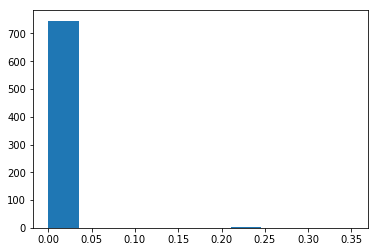

In [13]:
indices1, _ = hist_and_support(pca.weights)

In [14]:
pca1 = dill.load(open(filename, 'rb'))
subweights = pca.weights[indices1]
pca1.controlset = [pca1.controlset[i] for i in indices1]
pca1.probs = list(np.array(subweights.T/sum(subweights)).T)

In [15]:
# Save the weighted controls

import dill
dill.dump(pca0, open('0_' + filename, 'wb'))

import dill
dill.dump(pca1, open('1_' + filename, 'wb'))

# Diamond Norm

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
from ipyparallel import Client
rc = Client(profile='mpi3')
dc = rc[:]

/home/anthony/.pyenv/versions/3.6.3/envs/personal/lib/python3.6/site-packages/ipyparallel/client/client.py:459: RuntimeWarning: 
            Controller appears to be listening on localhost, but not on this machine.
            If this is true, you should specify Client(...,sshserver='you@GLaDOS')
            or instruct your controller to listen on an external IP.
  RuntimeWarning)


In [18]:
import os
dc.push({'cwd':os.getcwd()})

<AsyncResult: _push>

In [19]:
%%px
import os
os.chdir(cwd)

In [20]:
%%px
import dill
import itertools
import numpy as np
from pauli_channel_approximation import compute_dpn_and_fid
import matplotlib.pyplot as plt
from itertools import product

In [21]:
%%px 
from mpi4py import MPI
comm = MPI.COMM_WORLD
rank = comm.Get_rank()
print(rank)

[stdout:0] 0
[stdout:1] 1
[stdout:2] 2
[stdout:3] 3
[stdout:4] 4
[stdout:5] 5
[stdout:6] 6
[stdout:7] 7
[stdout:8] 8
[stdout:9] 9
[stdout:10] 10
[stdout:11] 11
[stdout:12] 12
[stdout:13] 13
[stdout:14] 14
[stdout:15] 15
[stdout:16] 16
[stdout:17] 17
[stdout:18] 18
[stdout:19] 19
[stdout:20] 20
[stdout:21] 21
[stdout:22] 22
[stdout:23] 23
[stdout:24] 24
[stdout:25] 25
[stdout:26] 26
[stdout:27] 27
[stdout:28] 28
[stdout:29] 29
[stdout:30] 30
[stdout:31] 31
[stdout:32] 32
[stdout:33] 33
[stdout:34] 34
[stdout:35] 35
[stdout:36] 36
[stdout:37] 37
[stdout:38] 38
[stdout:39] 39
[stdout:40] 40


In [22]:
%%px
filename = 'pickled_controls4.pkl'
pca0 = dill.load(open('0_' + filename, 'rb')) # 0RBC
pca1 = dill.load(open('1_' + filename, 'rb')) # 1RBC

# Diamond Norm

In [23]:
%%px
import sys
import itertools
from itertools import product
from copy import deepcopy
from functools import reduce

from diamond import diamond_norm, jamiolkowski

def superoperator(unitary):

    return np.kron(unitary.conj(), unitary)

def choi_form(unitary):

    return jamiolkowski(superoperator(unitary))

# misdefining this as accepting unitaries when it takes superoperators seems to have no effect on the diamond norm - strange.
# def diamond_distance(unitary_a,unitary_b):
#     return diamond_norm(choi_form(unitary_a) - choi_form(unitary_b))/2.

def diamond_distance(sopa, sopb):
    rtn = (jamiolkowski(sopa) - jamiolkowski(sopb))/2
    return diamond_norm(rtn)

def compute_diamond_norm(data):
    controlset, ambient_hamiltonian0, combo, dt, control_hamiltonians, target_operator, probs = data
    print("DOING COMBO {}".format(combo))
    sys.stdout.flush()
    fidelities = []
    projs = []
    sops = []
    controlset_unitaries = []
    d_norms = []

    for controls in controlset:
        newcontrols = deepcopy(controls)
        ambient_hamiltonian = [deepcopy(ah).astype("complex") for ah in ambient_hamiltonian0]
        for cnum, value in enumerate(combo):
            cnum -= len(ambient_hamiltonian0)
            if cnum >= 0:
                newcontrols[:, cnum] = newcontrols[:, cnum] * (1 + value)
            if cnum < 0:
                ambient_hamiltonian[cnum] *= float(value)
        print(ambient_hamiltonian, control_hamiltonians)
        step_unitaries = control_unitaries(ambient_hamiltonian,
                                           control_hamiltonians, newcontrols,
                                           dt)
        unitary = reduce(lambda a, b: a.dot(b), step_unitaries)
        sop = error_unitary(unitary, target_operator)
        sops.append(sop)
        d_norms.append(diamond_distance(sop, np.eye(sop.shape[0])))
    avg_sop = reduce(lambda a, b: a + b, [prob * sops[i] for i, prob in enumerate(probs)])
    d_norms.append(diamond_distance(avg_sop, np.eye(avg_sop.shape[0])))
    return d_norms

In [24]:
%%px
num_pts = 41
#pca0 and pca1 should have the same detunings, so we just use pca0 here.
base = np.logspace(-4.7, np.log(pca0.detunings[0][0])/np.log(10), (num_pts - 1)/2)
controls = np.concatenate([np.sort(-base),np.array([0]), base])
combinations0 = [[det,0, 0] for det in controls]

controls = np.concatenate([np.sort(-base),np.array([0]), base])
combinations1 = [[0,det, det] for det in controls]

In [25]:
%%px 
controls

Out[0:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[1:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[2:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[3:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[4:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[5:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[6:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[7:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[8:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[9:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[10:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[11:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[12:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[13:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[14:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[15:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[16:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[17:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[18:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[19:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[20:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[21:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[22:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[23:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[24:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[25:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[26:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[27:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[28:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[29:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[30:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[31:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[32:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[33:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[34:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[35:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[36:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[37:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[38:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[39:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

Out[40:7]: 
array([-1.00000000e-03, -8.13816172e-04, -6.62296762e-04, -5.38987815e-04,
       -4.38637001e-04, -3.56969885e-04, -2.90507865e-04, -2.36419999e-04,
       -1.92402418e-04, -1.56580200e-04, -1.27427499e-04, -1.03702559e-04,
       -8.43948197e-05, -6.86818691e-05, -5.58944158e-05, -4.54877795e-05,
       -3.70186906e-05, -3.01264090e-05, -2.45173589e-05, -1.99526231e-05,
        0.00000000e+00,  1.99526231e-05,  2.45173589e-05,  3.01264090e-05,
        3.70186906e-05,  4.54877795e-05,  5.58944158e-05,  6.86818691e-05,
        8.43948197e-05,  1.03702559e-04,  1.27427499e-04,  1.56580200e-04,
        1.92402418e-04,  2.36419999e-04,  2.90507865e-04,  3.56969885e-04,
        4.38637001e-04,  5.38987815e-04,  6.62296762e-04,  8.13816172e-04,
        1.00000000e-03])

In [26]:
%%px
print(base)

[stdout:0] 
[1.99526231e-05 2.45173589e-05 3.01264090e-05 3.70186906e-05
 4.54877795e-05 5.58944158e-05 6.86818691e-05 8.43948197e-05
 1.03702559e-04 1.27427499e-04 1.56580200e-04 1.92402418e-04
 2.36419999e-04 2.90507865e-04 3.56969885e-04 4.38637001e-04
 5.38987815e-04 6.62296762e-04 8.13816172e-04 1.00000000e-03]
[stdout:1] 
[1.99526231e-05 2.45173589e-05 3.01264090e-05 3.70186906e-05
 4.54877795e-05 5.58944158e-05 6.86818691e-05 8.43948197e-05
 1.03702559e-04 1.27427499e-04 1.56580200e-04 1.92402418e-04
 2.36419999e-04 2.90507865e-04 3.56969885e-04 4.38637001e-04
 5.38987815e-04 6.62296762e-04 8.13816172e-04 1.00000000e-03]
[stdout:2] 
[1.99526231e-05 2.45173589e-05 3.01264090e-05 3.70186906e-05
 4.54877795e-05 5.58944158e-05 6.86818691e-05 8.43948197e-05
 1.03702559e-04 1.27427499e-04 1.56580200e-04 1.92402418e-04
 2.36419999e-04 2.90507865e-04 3.56969885e-04 4.38637001e-04
 5.38987815e-04 6.62296762e-04 8.13816172e-04 1.00000000e-03]
[stdout:3] 
[1.99526231e-05 2.45173589e-05 3.0

In [27]:
%%px
from pauli_channel_approximation import control_unitaries, error_unitary
def dnorms(pca):
    try:
        combo = combinations0[rank]
        #was pca0, probably the bug
        lst = [pca.controlset, pca.ambient_hamiltonian, combo, pca.dt,
                pca.control_hamiltonians, pca.target_operator, pca.probs]
        d_norms0 = compute_diamond_norm(lst)

        combo = combinations1[rank]
        lst = [pca.controlset, pca.ambient_hamiltonian, combo, pca.dt,
                pca.control_hamiltonians, pca.target_operator, pca.probs]
        d_norms1 = compute_diamond_norm(lst)
    except IndexError:
        pass
    return d_norms0, d_norms1

# 0RBC

In [28]:
%%px
combo = combinations0[rank]
d_norms00, d_norms01 = dnorms(pca0)

[stdout:0] 
DOING COMBO [-0.001000000000000001, 0, 0]
[array([[-0.001+0.j, -0.   +0.j],
       [-0.   +0.j,  0.001-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.001+0.j, -0.   +0.j],
       [-0.   +0.j,  0.001-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.001+0.j, -0.   +0.j],
       [-0.   +0.j,  0.001-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.001+0.j, -0.   +0.j],
       [-0.   +0.j,  0.001-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.001+0.j, -0.   +0.j],
       [-0.   +0.j,  0.001-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.001+0.j, -0.   +0.j],
       [-0.   +0.j,  0.001-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

# 1RBC

In [29]:
%%px
d_norms10, d_norms11 = dnorms(pca1)

[stdout:0] 
DOING COMBO [-0.001000000000000001, 0, 0]
[array([[-0.001+0.j, -0.   +0.j],
       [-0.   +0.j,  0.001-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.001+0.j, -0.   +0.j],
       [-0.   +0.j,  0.001-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.001+0.j, -0.   +0.j],
       [-0.   +0.j,  0.001-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.001+0.j, -0.   +0.j],
       [-0.   +0.j,  0.001-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.001+0.j, -0.   +0.j],
       [-0.   +0.j,  0.001-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.001+0.j, -0.   +0.j],
       [-0.   +0.j,  0.001-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

In [30]:
num_pts = 41

In [31]:
diamond_norms00 = np.array([rc[i]['d_norms00'] for i in range(num_pts)])
diamond_norms01 = np.array([rc[i]['d_norms01'] for i in range(num_pts)])

In [32]:
diamond_norms10 = np.array([rc[i]['d_norms10'] for i in range(num_pts)])
diamond_norms11 = np.array([rc[i]['d_norms11'] for i in range(num_pts)])

In [33]:
controls = np.array([rc[i]['combo'][0] for i in range(num_pts)])

# If we don't include enough controls (say 20) the two plots will look similar. Need more controls for more diversity in the solutions.

In [34]:
fontsize=25
tickwidth = fontsize/10
num = 7

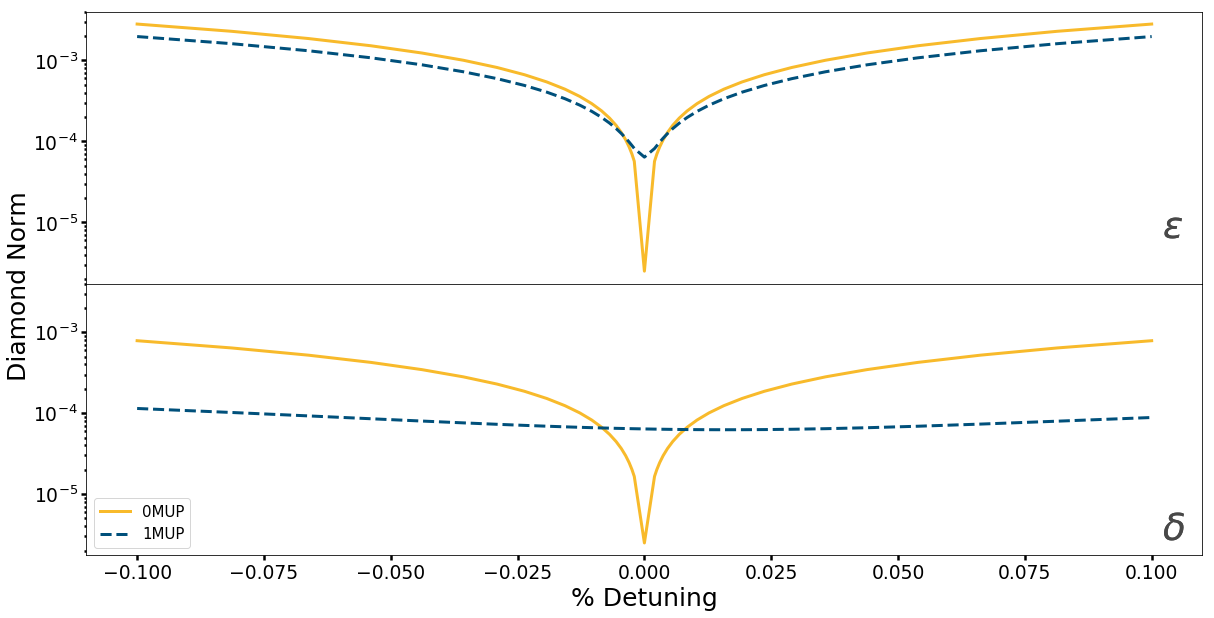

In [37]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True, figsize=(20, 10))
for i, (a, b) in enumerate(((diamond_norms00, diamond_norms10), (diamond_norms01, diamond_norms11))):
    ax = [ax1, ax2][i]
    #plt.figure(figsize=(10,6))

    #ax.semilogy(controls*100, np.array(a).T[num], linewidth = 2, alpha=.6, color='#f8ba2b', label="Member of 0MUP", ls="-");
    #ax.semilogy(controls*100, np.array(b).T[num], linewidth = 2, alpha=.6, color='#00507b', label="Member of 1MUP", ls="--");
    ax.semilogy(controls*100, np.array(a).T[-1], linewidth = 3, alpha=1, color='#f8ba2b', label="0MUP", ls="-");
    ax.semilogy(controls*100,np.array(b).T[-1], linewidth = 3, alpha=1, color='#00507b', label="1MUP", ls="--");
    ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize*3/4)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = fontsize*3/4)
    plt.text(.102, .015, r'$\epsilon$', fontsize=fontsize*1.5, color='#484848')
    plt.text(.102, .0000028, r'$\delta$', fontsize=fontsize*1.5, color='#484848')
    ax.xaxis.set_tick_params(width=tickwidth, length=tickwidth*2, which='major')
    ax.yaxis.set_tick_params(width=tickwidth, length=tickwidth*2, which='major')
    ax.xaxis.set_tick_params(width=tickwidth, length=tickwidth, which='minor')
    ax.yaxis.set_tick_params(width=tickwidth, length=tickwidth, which='minor')

plt.subplots_adjust(wspace=0, hspace=0)
f.text(.07, 0.5, "Diamond Norm", va='center', rotation='vertical', fontsize=fontsize)
plt.xlabel("% Detuning", fontsize=fontsize)
plt.legend(prop={'size': 15}, loc=3)